## 0-Preparar entorno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Defino la raíz del sistema de archivos
raiz = "/content/drive/MyDrive/DataGobAnt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Importación de datos



In [ ]:
# ESQUEMA DE DATOS EN FASE LANDING

# dataGobAnt/
#  | 1.landing
#      |___ ic.csv
#      |___ pagos.csv
#      \___ partidasAbiertas/
#      |    |___ VIG2004-VIG2022 (18 ARCH)
#      |
#      \___ Vechiculos/
#         |___ BUT0ID_1.csv
#         |___ ZHV_D_BDT.csv 
#         |___ DPSOB_BP.csv
#         |___ historico de pagos/
#              |___ZHIST(20 ARCH)
#          
#

## 1.1-Interlocutor comercial

In [ ]:
# ic
ic = pd.read_csv(raiz + '/1.landing/ic.csv', sep = '€', encoding='utf-8', engine='python') #, error_bad_lines=False)

In [ ]:
ic

,Unnamed: 0,PLACA_IC,INTERLOCUTOR_COMERCIAL,TIPO_DOCUMENTO_IC,ID_USUARIO_IC,FECHA_MODIFICACION_IC,DEPARTAMENTO_IC,CIUDAD_IC,CUENTA_CONTRATO_IC,OBSOLETO_IC,BLOQUEO_CORRESPONDENCIA_IC,BLOQUEO_CENTRAL_IC,DIR_CUMPLE_ESTRUCTURA_IC
0,927812,b3885fc8913900eacbdefd3893f9c47a5a949975,02c4b6af439f653c74b5eac71f8035a4ac42e35f,NIT,e4acd12eb2b2003783cd34cb2342d0455a38e99c,2019-02-07,ANTIOQUIA,MEDELLÍN,2.0,True,False,False,True
1,927813,b3885fc8913900eacbdefd3893f9c47a5a949975,10b400ee9215a74ad397be5dda327012b34660c1,CC,42fb1fb1036acb5541fe01ae3accab2a45475952,2015-09-25,ANTIOQUIA,MEDELLÍN,2.0,False,False,False,True
2,927816,eeb8f7196893bc53103e699301596bb9cdf48533,02c4b6af439f653c74b5eac71f8035a4ac42e35f,NIT,e4acd12eb2b2003783cd34cb2342d0455a38e99c,2019-02-07,ANTIOQUIA,MEDELLÍN,2.0,False,False,False,True
3,927817,eeb8f7196893bc53103e699301596bb9cdf48533,10b400ee9215a74ad397be5dda327012b34660c1,CC,42fb1fb1036acb5541fe01ae3accab2a45475952,2015-09-25,ANTIOQUIA,MEDELLÍN,2.0,True,False,False,True
4,927819,5b6c8f12a6b54bb3ddc8d8a8b216362725c9c4e4,1c2476666004226d282e5e9c26230e70bf21de53,CC,5d80bb5209f0bd4f787683a0aa046e14bd0d2fc1,2014-04-30,ANTIOQUIA,MEDELLÍN,2.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182487,11382805,a2d77fd5f045e07c60e994c4aba5293740cdc2ba,0ffd7da7a019b7d4c6f40a9f6f2245bc913fe883,CC,96b3967c86916b48a20a8e344f983cf03c14d06b,2019-12-13,ANTIOQUIA,CAREPA,2.0,False,False,False,False
6182488,11382846,3f9b57a79d344ba80e7a45795202fe2a118c2f51,e5183dedcf56266a8376ea41fa96f01bafc92eb4,CC,af88933dcfc4bce8d1e063a77d5a81fb0f733522,2018-07-25,ANTIOQUIA,CAREPA,2.0,True,False,False,False
6182489,11382878,5c54c09b8b34b85870f6040655034129a9426815,8146f037c3891b19ccd108e2a91146dcc517b2ae,CC,f0135860a5d739353189592e60075626da383031,2021-08-02,ANTIOQUIA,CAREPA,2.0,True,False,False,False
6182490,11383305,588c43059fff0014f0bcc6c8bd8446c2f35cb346,895fae462eaadc2e37b9a11e3a746fc1c82a1872,CC,755802aad8aa9da07b6a7103abc6bdd241d0d8da,2018-12-28,ANTIOQUIA,CAUCASIA,2.0,True,False,False,True


In [ ]:
ic.dtypes

Unnamed: 0                      int64
PLACA_IC                       object
INTERLOCUTOR_COMERCIAL         object
TIPO_DOCUMENTO_IC              object
ID_USUARIO_IC                  object
FECHA_MODIFICACION_IC          object
DEPARTAMENTO_IC                object
CIUDAD_IC                      object
CUENTA_CONTRATO_IC            float64
OBSOLETO_IC                      bool
BLOQUEO_CORRESPONDENCIA_IC       bool
BLOQUEO_CENTRAL_IC               bool
DIR_CUMPLE_ESTRUCTURA_IC         bool
dtype: object

In [ ]:
# 'OBSOLETO_IC' presenta "X" si el como propietario no esta asociado al Objeto Contrato (Placa)
pd.Series(ic['OBSOLETO_IC'].value_counts()).to_frame()

,OBSOLETO_IC
True,3376793
False,2805699


In [ ]:
# creo un subset con los ic vigentes
ic_vigentes = ic[ic['OBSOLETO_IC'] == False]
ic_vigentes

,Unnamed: 0,PLACA_IC,INTERLOCUTOR_COMERCIAL,TIPO_DOCUMENTO_IC,ID_USUARIO_IC,FECHA_MODIFICACION_IC,DEPARTAMENTO_IC,CIUDAD_IC,CUENTA_CONTRATO_IC,OBSOLETO_IC,BLOQUEO_CORRESPONDENCIA_IC,BLOQUEO_CENTRAL_IC,DIR_CUMPLE_ESTRUCTURA_IC
1,927813,b3885fc8913900eacbdefd3893f9c47a5a949975,10b400ee9215a74ad397be5dda327012b34660c1,CC,42fb1fb1036acb5541fe01ae3accab2a45475952,2015-09-25,ANTIOQUIA,MEDELLÃN,2.0,False,False,False,True
2,927816,eeb8f7196893bc53103e699301596bb9cdf48533,02c4b6af439f653c74b5eac71f8035a4ac42e35f,NIT,e4acd12eb2b2003783cd34cb2342d0455a38e99c,2019-02-07,ANTIOQUIA,MEDELLÃN,2.0,False,False,False,True
4,927819,5b6c8f12a6b54bb3ddc8d8a8b216362725c9c4e4,1c2476666004226d282e5e9c26230e70bf21de53,CC,5d80bb5209f0bd4f787683a0aa046e14bd0d2fc1,2014-04-30,ANTIOQUIA,MEDELLÃN,2.0,False,False,False,True
5,927821,d001548ec3ee78bf4ece9655462bd8d39e6435d8,5d9921fa66dac66635205d09d0a12cc36167c873,CC,09f1148cf4f3a57bafd29e75b944d24ead82f62e,2009-11-08,ANTIOQUIA,MEDELLÃN,2.0,False,False,False,False
11,927827,a0f46948b484d77e296f484c51f880ac638edefb,a8fd5c8931f8746f23862384d392b13ff6fcea40,CC,6e67a4cfc8030ee591836a623f769fe716187c7f,2016-09-20,ANTIOQUIA,MEDELLÃN,2.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182477,11382554,d280d63db3aa7f5f7111b4e330edb4b2c8b4c479,d02ebcec8effc578a484ab6ee12ebb9116bf70bd,CC,ca6eaa10db50bbad1827d19b36a51e68b115aad6,2019-01-11,ANTIOQUIA,TURBO,2.0,False,False,False,False
6182478,11382576,8ca40d724009e1e0c0747aa1bada6f3368769bc5,b8202501bcbfa41f98b7b7a7d5dd3783e0ec5f2d,CC,071046e90ad133717a8ec2d5c28889e71e280d2e,2020-03-18,ANTIOQUIA,APARTADÃ,2.0,False,False,False,False
6182480,11382612,d0e663757de1b968fc7039367227f5837f3a488b,4f7414eaf52d0fc2633c510147acfdab31945278,CC,8715d41bfbc9b6349c01631c4f6982577f926fde,2019-11-08,ANTIOQUIA,APARTADÃ,2.0,False,False,False,True
6182486,11382764,bb08fde54902abad5f4a6f5efb2edb645293163c,408c608f94ee582b45844b2391c92aeb85619c33,CC,18ee8777c7acb59bc536f06a4177cba15a2120c3,2019-02-06,ANTIOQUIA,APARTADÃ,2.0,False,False,False,False


In [ ]:
# Tipo de documento del Interlocutor Comercial
pd.Series(ic_vigentes['TIPO_DOCUMENTO_IC'].value_counts()).to_frame()

,TIPO_DOCUMENTO_IC
CC,2623586
NIT,150131
NREXT,10088
CE,8931
TI,5656
NUIP,3805
PASAP,3414
RC,62
CD,10
TP,5


In [ ]:
## Fecha de modificación
pd.Series(ic_vigentes['FECHA_MODIFICACION_IC'].value_counts()).to_frame()

,FECHA_MODIFICACION_IC
2022-02-01,65421
2009-11-08,57058
2022-03-18,39778
2021-04-16,30497
2021-06-16,28931
...,...
2009-06-17,1
2008-04-01,1
2011-03-19,1
2011-03-05,1


In [ ]:
## depto y ciudad
ic_ciudad = ic_vigentes[['DEPARTAMENTO_IC','CIUDAD_IC']]
ic_ciudad = ic_ciudad.groupby(ic_ciudad.columns.tolist(),as_index=False).size()
ic_ciudad

NameError: ignored

In [ ]:
#ic_ciudad.to_excel("ic_ciudad.xlsx")

In [ ]:
# Cuenta contrato del Impuesto sobre Vehiculos Automotores
pd.Series(ic_vigentes['CUENTA_CONTRATO_IC'].value_counts()).to_frame()

,CUENTA_CONTRATO_IC
2.0,2659334
9.0,144620
11.0,1603
10.0,95
1.0,7
8.0,4
7.0,1


In [ ]:
## "X" Si tiene un bloqueo que no permita contabilizaciones nuevas asociadas al Impuesto sobre Vehiculos
pd.Series(ic_vigentes['BLOQUEO_CORRESPONDENCIA_IC'].value_counts()).to_frame()

,BLOQUEO_CORRESPONDENCIA_IC
False,2746892
True,58807


In [ ]:
## "X" Si tiene un bloqueo para inactivar la relación de un Interlocutor Comercial como propietario de un Vehiculo
pd.Series(ic_vigentes['BLOQUEO_CENTRAL_IC'].value_counts()).to_frame()


,BLOQUEO_CENTRAL_IC
False,2805375
True,324


In [ ]:
## Validación de que la direccion cumpla con la estructura de la gobant, que arroja  valores "TRUE" - "FALSE"
pd.Series(ic_vigentes['DIR_CUMPLE_ESTRUCTURA_IC'].value_counts()).to_frame()

,DIR_CUMPLE_ESTRUCTURA_IC
True,2142866
False,662833


REDUZCO A VALORES UNICOS EL CAMPO INTERLOCUTOR COMERCIAL, DE ACUERDO A LA FECHA DE MODIFICACIÓN MÁS RECIENTE

In [ ]:
ic.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6182492 entries, 0 to 6182491
Data columns (total 13 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  6182492 non-null  int64  
 1   PLACA_IC                    6182492 non-null  object 
 2   INTERLOCUTOR_COMERCIAL      6182492 non-null  object 
 3   TIPO_DOCUMENTO_IC           6182490 non-null  object 
 4   ID_USUARIO_IC               6182492 non-null  object 
 5   FECHA_MODIFICACION_IC       5801219 non-null  object 
 6   DEPARTAMENTO_IC             6180231 non-null  object 
 7   CIUDAD_IC                   6164041 non-null  object 
 8   CUENTA_CONTRATO_IC          6182457 non-null  float64
 9   OBSOLETO_IC                 6182492 non-null  bool   
 10  BLOQUEO_CORRESPONDENCIA_IC  6182492 non-null  bool   
 11  BLOQUEO_CENTRAL_IC          6182492 non-null  bool   
 12  DIR_CUMPLE_ESTRUCTURA_IC    6182492 non-null  bool   
dt

In [ ]:
## convierto fecha de modificación a datetime
ic['FECHA_MODIFICACION_IC'] = pd.to_datetime(ic['FECHA_MODIFICACION_IC'], infer_datetime_format=True)

In [ ]:
ic.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6182492 entries, 0 to 6182491
Data columns (total 13 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Unnamed: 0                  6182492 non-null  int64         
 1   PLACA_IC                    6182492 non-null  object        
 2   INTERLOCUTOR_COMERCIAL      6182492 non-null  object        
 3   TIPO_DOCUMENTO_IC           6182490 non-null  object        
 4   ID_USUARIO_IC               6182492 non-null  object        
 5   FECHA_MODIFICACION_IC       5801219 non-null  datetime64[ns]
 6   DEPARTAMENTO_IC             6180231 non-null  object        
 7   CIUDAD_IC                   6164041 non-null  object        
 8   CUENTA_CONTRATO_IC          6182457 non-null  float64       
 9   OBSOLETO_IC                 6182492 non-null  bool          
 10  BLOQUEO_CORRESPONDENCIA_IC  6182492 non-null  bool          
 11  BLOQUEO_CENTRAL_IC      

In [ ]:
ic = ic.drop_duplicates(subset=['INTERLOCUTOR_COMERCIAL','FECHA_MODIFICACION_IC'])

In [ ]:
ic['FechaMax'] = ic.groupby('INTERLOCUTOR_COMERCIAL')['FECHA_MODIFICACION_IC'].transform('max')

<ipython-input-65-e9072755854f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ic['FechaMax'] = ic.groupby('INTERLOCUTOR_COMERCIAL')['FECHA_MODIFICACION_IC'].transform('max')


In [ ]:
ic

,Unnamed: 0,PLACA_IC,INTERLOCUTOR_COMERCIAL,TIPO_DOCUMENTO_IC,ID_USUARIO_IC,FECHA_MODIFICACION_IC,DEPARTAMENTO_IC,CIUDAD_IC,CUENTA_CONTRATO_IC,OBSOLETO_IC,BLOQUEO_CORRESPONDENCIA_IC,BLOQUEO_CENTRAL_IC,DIR_CUMPLE_ESTRUCTURA_IC,FechaMax,Validación
0,927812,b3885fc8913900eacbdefd3893f9c47a5a949975,02c4b6af439f653c74b5eac71f8035a4ac42e35f,NIT,e4acd12eb2b2003783cd34cb2342d0455a38e99c,2019-02-07,ANTIOQUIA,MEDELLÍN,2.0,True,False,False,True,2019-02-07,True
1,927813,b3885fc8913900eacbdefd3893f9c47a5a949975,10b400ee9215a74ad397be5dda327012b34660c1,CC,42fb1fb1036acb5541fe01ae3accab2a45475952,2015-09-25,ANTIOQUIA,MEDELLÍN,2.0,False,False,False,True,2015-09-25,True
4,927819,5b6c8f12a6b54bb3ddc8d8a8b216362725c9c4e4,1c2476666004226d282e5e9c26230e70bf21de53,CC,5d80bb5209f0bd4f787683a0aa046e14bd0d2fc1,2014-04-30,ANTIOQUIA,MEDELLÍN,2.0,False,False,False,True,2014-04-30,True
5,927821,d001548ec3ee78bf4ece9655462bd8d39e6435d8,5d9921fa66dac66635205d09d0a12cc36167c873,CC,09f1148cf4f3a57bafd29e75b944d24ead82f62e,2009-11-08,ANTIOQUIA,MEDELLÍN,2.0,False,False,False,False,2009-11-08,True
6,927822,128df347fa2f4c09ecbc23372e7e178e2031bf0d,4d577aab118c0eff001fc425cc0bc3fb866d1478,CC,20cd1a6791c6e51dd19b1fc4611bcaa783c6d87c,2009-11-08,ANTIOQUIA,MEDELLÍN,2.0,True,False,False,True,2009-11-08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410670,5673089,0532dff494def107a64bc21a0bd06eed4d1959a9,811adf2e60a6fbd5021a83314081bb385384483c,CC,785f9c58c954389e52a08b52df769eb2878deb28,2022-01-26,ANTIOQUIA,LA CEJA,2.0,False,False,False,True,2022-01-26,True
4410672,5673091,59af76d940f4c6fc48bd95150e9ac9e4b1fd4623,50c83aec80c062760e98496131f81dfdac7d8a5a,CC,765197d15f2a157b5740f877c23fa3b55116ff2b,2021-03-03,ANTIOQUIA,MEDELLÍN,2.0,True,False,False,True,2021-03-03,True
4410674,5673093,cf3b837e527277a5739fbd59f46edce5b96cb077,ef387e22e4d4ae7073fb34cc8678fd44a327f676,CC,622adbb11174357338752d8ce88614b089f2b277,2014-05-09,NARIÑO,PASTO,2.0,False,False,False,True,2014-05-09,True
6171133,8507134,cab7a6f37698a5894e98895d886ab4407a596098,7efbbc8ebb24c9c4a05f6b92b3548d0443943d5b,CC,54e236a27bd49001527a58517f53fe6ae9b8426f,2022-03-20,BOGOTÁ,BOGOTÁ,2.0,False,False,False,True,2022-03-20,True


In [ ]:
ic['Validación'] = ic['FECHA_MODIFICACION_IC'] == ic['FechaMax']

<ipython-input-67-83d457e8fe43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ic['Validación'] = ic['FECHA_MODIFICACION_IC'] == ic['FechaMax']


In [ ]:
pd.Series(ic['Validación'].value_counts()).to_frame()

,Validación
True,1452741
False,321815


In [ ]:
ic_unique = ic[ic['Validación']==True]

In [ ]:
ic_unique

,Unnamed: 0,PLACA_IC,INTERLOCUTOR_COMERCIAL,TIPO_DOCUMENTO_IC,ID_USUARIO_IC,FECHA_MODIFICACION_IC,DEPARTAMENTO_IC,CIUDAD_IC,CUENTA_CONTRATO_IC,OBSOLETO_IC,BLOQUEO_CORRESPONDENCIA_IC,BLOQUEO_CENTRAL_IC,DIR_CUMPLE_ESTRUCTURA_IC,FechaMax,Validación
0,927812,b3885fc8913900eacbdefd3893f9c47a5a949975,02c4b6af439f653c74b5eac71f8035a4ac42e35f,NIT,e4acd12eb2b2003783cd34cb2342d0455a38e99c,2019-02-07,ANTIOQUIA,MEDELLÍN,2.0,True,False,False,True,2019-02-07,True
1,927813,b3885fc8913900eacbdefd3893f9c47a5a949975,10b400ee9215a74ad397be5dda327012b34660c1,CC,42fb1fb1036acb5541fe01ae3accab2a45475952,2015-09-25,ANTIOQUIA,MEDELLÍN,2.0,False,False,False,True,2015-09-25,True
4,927819,5b6c8f12a6b54bb3ddc8d8a8b216362725c9c4e4,1c2476666004226d282e5e9c26230e70bf21de53,CC,5d80bb5209f0bd4f787683a0aa046e14bd0d2fc1,2014-04-30,ANTIOQUIA,MEDELLÍN,2.0,False,False,False,True,2014-04-30,True
5,927821,d001548ec3ee78bf4ece9655462bd8d39e6435d8,5d9921fa66dac66635205d09d0a12cc36167c873,CC,09f1148cf4f3a57bafd29e75b944d24ead82f62e,2009-11-08,ANTIOQUIA,MEDELLÍN,2.0,False,False,False,False,2009-11-08,True
6,927822,128df347fa2f4c09ecbc23372e7e178e2031bf0d,4d577aab118c0eff001fc425cc0bc3fb866d1478,CC,20cd1a6791c6e51dd19b1fc4611bcaa783c6d87c,2009-11-08,ANTIOQUIA,MEDELLÍN,2.0,True,False,False,True,2009-11-08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410670,5673089,0532dff494def107a64bc21a0bd06eed4d1959a9,811adf2e60a6fbd5021a83314081bb385384483c,CC,785f9c58c954389e52a08b52df769eb2878deb28,2022-01-26,ANTIOQUIA,LA CEJA,2.0,False,False,False,True,2022-01-26,True
4410672,5673091,59af76d940f4c6fc48bd95150e9ac9e4b1fd4623,50c83aec80c062760e98496131f81dfdac7d8a5a,CC,765197d15f2a157b5740f877c23fa3b55116ff2b,2021-03-03,ANTIOQUIA,MEDELLÍN,2.0,True,False,False,True,2021-03-03,True
4410674,5673093,cf3b837e527277a5739fbd59f46edce5b96cb077,ef387e22e4d4ae7073fb34cc8678fd44a327f676,CC,622adbb11174357338752d8ce88614b089f2b277,2014-05-09,NARIÑO,PASTO,2.0,False,False,False,True,2014-05-09,True
6171133,8507134,cab7a6f37698a5894e98895d886ab4407a596098,7efbbc8ebb24c9c4a05f6b92b3548d0443943d5b,CC,54e236a27bd49001527a58517f53fe6ae9b8426f,2022-03-20,BOGOTÁ,BOGOTÁ,2.0,False,False,False,True,2022-03-20,True


In [ ]:
pd.Series(ic_unique['INTERLOCUTOR_COMERCIAL'].value_counts()).to_frame()

,INTERLOCUTOR_COMERCIAL
02c4b6af439f653c74b5eac71f8035a4ac42e35f,1
d8b4ed9ebbe1125b8deff1c2002731dc769a7cd0,1
55fda7dae365fb35b5827e4e3f9337fb034152f9,1
8f83fb16bcea9c9b74478fcc112194a0b8e76a73,1
656304ec14e038b20301ea0fdf13e6ce5df41af6,1
...,...
8cac32d08bd0236ff619b515a0a92026d52c51c8,1
6a555eeb9e197b81f2c76a6eab4cfee326c01f71,1
a56014d213497d83b83d1a98011dd13b82887d31,1
fe50fec4973fe0ce65fc4c69a5b63dae9cdfbcba,1


In [ ]:
## EXPORTO EL DF CON LOS DATOS UTILES
ic_unique[['INTERLOCUTOR_COMERCIAL','TIPO_DOCUMENTO_IC','DEPARTAMENTO_IC','CIUDAD_IC','OBSOLETO_IC','FECHA_MODIFICACION_IC']].to_csv(raiz + '/2.cleansed/ic.csv')

## 1.2-Pagos

In [ ]:
# ## importo df con librería estándar
# import os
# os.chdir(raiz +'/1.landing/')
# os.getcwd()

# import csv
# pagos = open("pagosa.csv")
# reader = csv.reader(pagos)
# for row in reader:
#     print (row)

In [ ]:
# pagos = np.loadtxt(open(raiz +'/1.landing/pagos.csv'), delimiter="â¬",skiprows=1)

In [ ]:
# ## importo dataframe con numpy 
# from numpy import genfromtxt
# pagos = genfromtxt(raiz +'/1.landing/pagos.csv', delimiter='â¬')

In [ ]:
# pagos 
pagos = pd.read_csv(raiz + '/1.landing/pagos5.csv', sep = ';', encoding='utf-8', engine='python', error_bad_lines=False)

<ipython-input-5-f913dfab2f1b>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pagos = pd.read_csv(raiz + '/1.landing/pagos5.csv', sep = ';', encoding='utf-8', engine='python', error_bad_lines=False)


In [ ]:
pagos

,ID,PLACA,INTERLOCUTOR_COMERCIAL,VIGENCIA_PAGO,FECHA_PAGO,REFERENCIA,VALOR_PAGO,IMPUESTO,SANCION,INTERES,...,DEPARTAMENTO,CIUDAD,CODIGO_BANCO,NOMBRE_BANCO,TIPO_PAGO,LOTE_PAGO,VALOR_LOTE,CON_CLARIFICACION,MEDIO_PAGO,DIR_CUMPLE_ESTRUCTURA
0,8075763,474fe5957f946a246bc3dd72d16e4c59dd775d08,1ff33a93e7734ab1e0fcca72316795177e57db41,2015,2015-01-02,303830690,38660.0,25110.0,0.0,0.0,...,ANTIOQUIA,ENVIGADO,NaN,Banco Popular,EFECTIVO,VE0201150102,38660.0,NaN,TAQUILLA,True
1,8075764,66d49da8f05f5b5ffaf94e69299fd4631ff288f4,bb7c75550719f344439325402a35dbd05548eeff,2015,2015-01-02,303830689,107480.0,93930.0,0.0,0.0,...,ANTIOQUIA,MARINILLA,NaN,Banco Popular,EFECTIVO,VE0201150102,107480.0,NaN,TAQUILLA,True
2,8075765,77dd80ce88289b4bba43ebb7a6194d0a83997716,edfe0c6e934a7dfb104525d35583898e9af672e5,2015,2015-01-02,303830680,132590.0,119040.0,0.0,0.0,...,ANTIOQUIA,MEDELLÍN,NaN,Banco Popular,EFECTIVO,VE0201150102,132590.0,NaN,TAQUILLA,True
3,8075766,239b6503cee83f2c9426b4f9252f7df5f6439bc2,1244b518e728d9d9d33c86f6c5bf15335c20a204,2015,2015-01-02,303830677,132590.0,119040.0,0.0,0.0,...,ANTIOQUIA,MEDELLÍN,NaN,Banco Popular,EFECTIVO,VE0201150102,132590.0,NaN,TAQUILLA,True
4,8075767,12e5e45445e99b70065c3b8fb1f9020d317623ef,025d4edc59f3a2033e5814310a4512546ac03db5,2015,2015-01-02,303830687,454370.0,440820.0,0.0,0.0,...,ANTIOQUIA,MEDELLÍN,NaN,Banco Popular,EFECTIVO,VE0201150102,454370.0,NaN,TAQUILLA,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077489,14897059,a419b667260d8eab1bbe40d81f8f2c2405de165b,f013d0f57e748aef382d271c7fbdcf215b760899,2019,2022-04-17,307932397,307000.0,60000.0,190000.0,38000.0,...,ANTIOQUIA,MEDELLÍN,23.0,Banco de Occidente,TARJETA,USRCP0000D4C,307000.0,NaN,WEB,True
4077490,14919577,a419b667260d8eab1bbe40d81f8f2c2405de165b,f013d0f57e748aef382d271c7fbdcf215b760899,2018,2022-04-17,311296276,321000.0,60000.0,190000.0,52000.0,...,ANTIOQUIA,MEDELLÍN,23.0,Banco de Occidente,TARJETA,USRCP0000D4C,321000.0,NaN,WEB,True
4077491,14964663,a7b8953e2c3b2d1eb2a42ab84ab77f56c4a763a4,2c5c60a122d87c7d68ac787dd3bdcc2e4aba00e6,2017,2022-04-17,3000247969,228000.0,9000.0,190000.0,10000.0,...,ANTIOQUIA,ENVIGADO,23.0,Banco de Occidente,EFECTIVO,USRCS0000D91,228000.0,NaN,WEB,True
4077492,14964685,d736b6b3c3beddde12e91b15bd452054eac0c3f6,bcc00417beb30b1754e0436d56dab471b38780af,2018,2022-04-17,3000352964,254000.0,24000.0,190000.0,21000.0,...,ANTIOQUIA,BELLO,23.0,Banco de Occidente,EFECTIVO,USRCS0000D91,254000.0,NaN,WEB,True


In [ ]:
# Suma del recaudo total de los pagos
pd.Series(pagos.groupby(['VIGENCIA_PAGO'])['VALOR_PAGO'].sum().apply(lambda x: format(x, 'f'))).to_frame()

,VALOR_PAGO
VIGENCIA_PAGO,
2015,197038091570.000000
2016,227835461970.000000
2017,274748486350.000000
2018,301691211092.000000
2019,329725975322.000000


### vigencia y fecha_pago

In [ ]:
# Creo la columna año_pago solo con el año de la fecha de pago.
pagos["año_pago"] = [pagos.iloc[x]["FECHA_PAGO"][0:4] for x in pagos.index.values.tolist()]

In [ ]:
# vigencia vs año_pago (Cantidad de pagos)
pd.Series(pagos.groupby(['VIGENCIA_PAGO','año_pago']).size()).to_frame().reset_index(level='año_pago').pivot(columns='año_pago')

0                                                   \
año_pago           2015      2016      2017      2018      2019     2020   
VIGENCIA_PAGO                                                              
2015           595141.0   35785.0   18803.0   12772.0   11795.0  21656.0   
2016                NaN  643028.0   32241.0   18944.0   17886.0  26097.0   
2017                NaN       NaN  676907.0   38928.0   27394.0  33914.0   
2018                NaN       NaN       NaN  721223.0   48851.0  43276.0   
2019                NaN       NaN       NaN       NaN  812703.0  52660.0   

                                 
año_pago          2021     2022  
VIGENCIA_PAGO                    
2015           18103.0   2125.0  
2016           22095.0   3037.0  
2017           28788.0   5185.0  
2018           38661.0   9162.0  
2019           45652.0  14682.0

### Impuesto

In [ ]:
# Suma del recaudo
pd.Series(pagos.groupby(['VIGENCIA_PAGO'])['IMPUESTO'].sum().apply(lambda x: format(x, 'f'))).to_frame()

,IMPUESTO
VIGENCIA_PAGO,
2022,1350645346723.000000


In [ ]:
# pivoteo la tabla por año

pagosImpuesto = pagos.pivot(columns='VIGENCIA_PAGO', values='IMPUESTO')
pagosImpuesto

VIGENCIA_PAGO,2022
0,457000.00
1,333000.00
2,248000.00
3,54000.00
4,59000.00
...,...
2838942,1604000.00
2838943,288000.00
2838944,196000.00
2838945,196000.00


In [ ]:
## Dataframe descrption by year
pd.options.display.float_format = '{:.2f}'.format
pagosImpuesto.describe()

VIGENCIA_PAGO,2022
count,2838947.00
mean,475755.75
std,888050.21
min,0.00
25%,79000.00
50%,171000.00
75%,441000.00
max,27307000.00


### Sanción

In [ ]:
# Suma del recaudo
pd.Series(pagos.groupby(['VIGENCIA_PAGO'])['SANCION'].sum().apply(lambda x: format(x, 'f'))).to_frame()

,SANCION
VIGENCIA_PAGO,
2022,102693000.000000


In [ ]:
# pivoteo la tabla por año
pagosSancion = pagos.pivot(columns='VIGENCIA_PAGO', values='SANCION')
pagosSancion

VIGENCIA_PAGO,2022
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
2838942,0.00
2838943,0.00
2838944,0.00
2838945,0.00


In [ ]:
## Dataframe descrption by year
pd.options.display.float_format = '{:.2f}'.format
pagosSancion.describe()

VIGENCIA_PAGO,2022
count,2838947.00
mean,36.17
std,2849.22
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,596000.00


### Interés

In [ ]:
# Suma del recaudo
pd.Series(pagos.groupby(['VIGENCIA_PAGO'])['INTERES'].sum().apply(lambda x: format(x, 'f'))).to_frame()

,INTERES
VIGENCIA_PAGO,
2022,4311000.000000


In [ ]:
# pivoteo la tabla por año
pagosInteres = pagos.pivot(columns='VIGENCIA_PAGO', values='INTERES')
pagosInteres

VIGENCIA_PAGO,2022
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
2838942,0.00
2838943,0.00
2838944,0.00
2838945,0.00


In [ ]:
## Dataframe descrption by year
pd.options.display.float_format = '{:.2f}'.format
pagosInteres.describe()

VIGENCIA_PAGO,2022
count,2838947.00
mean,1.52
std,266.49
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,110000.00


### Sistematización

In [ ]:
# Suma del recaudo por sistematización
pd.Series(pagos.groupby(['VIGENCIA_PAGO'])['SISTEMATIZACION'].sum().apply(lambda x: format(x, 'f'))).to_frame()

,SISTEMATIZACION
VIGENCIA_PAGO,
2022,53879681700.000000


In [ ]:
# pivoteo la tabla por año
pagosSistematizacion = pagos.pivot(columns='VIGENCIA_PAGO', values='SISTEMATIZACION')
pagosSistematizacion

VIGENCIA_PAGO,2022
0,18000.00
1,18000.00
2,19000.00
3,18000.00
4,18000.00
...,...
2838942,19000.00
2838943,19000.00
2838944,19000.00
2838945,19000.00


In [ ]:
## Dataframe descrption by year
pd.options.display.float_format = '{:.2f}'.format
pagosSistematizacion.describe()

VIGENCIA_PAGO,2022
count,2838947.00
mean,18978.76
std,532.83
min,0.00
25%,19000.00
50%,19000.00
75%,19000.00
max,19000.00


### Avalúo

In [ ]:
# pivoteo la tabla por año
pagosAvaluo = pagos.pivot(columns='VIGENCIA_PAGO', values='AVALUO')
pagosAvaluo

VIGENCIA_PAGO,2022
0,30480000
1,22190000
2,16520000
3,3610000
4,3960000
...,...
2838942,64140000
2838943,19200000
2838944,13090000
2838945,13090000


In [ ]:
## Dataframe descrption by year
pd.options.display.float_format = '{:.2f}'.format
pagosAvaluo.describe()

VIGENCIA_PAGO,2022
count,2838947.00
mean,23177231.90
std,29763874.00
min,90000.00
25%,5335294.00
50%,11500000.00
75%,29500000.00
max,1140944900.00


### Porcentaje de descuento

In [ ]:
# Cantidad de partidas según su Porcentaje de descuento
pd.Series(pagos['PORCENTAJE_DESCUENTO'].value_counts()).to_frame()

,PORCENTAJE_DESCUENTO
10.00,2805226
15.00,29638
20.00,3484
0.00,599


In [ ]:
# Cantidad de partidas según su Porcentaje de descuento por año
pd.Series(pagos.groupby(['VIGENCIA_PAGO','PORCENTAJE_DESCUENTO']).size()).to_frame().reset_index(level='PORCENTAJE_DESCUENTO').pivot(columns='PORCENTAJE_DESCUENTO')


0                      
PORCENTAJE_DESCUENTO 0.00     10.00  15.00 20.00
VIGENCIA_PAGO                                   
2022                   599  2805226  29638  3484

### Depto y ciudad

In [ ]:
## Depto y ciudad de donde se paga
## depto y ciudad
pagos_ciudad = pagos[['DEPARTAMENTO','CIUDAD']]
pagos_ciudad = pagos_ciudad.groupby(['DEPARTAMENTO','CIUDAD'],as_index=False).size().sort_values(by=['size'], ascending=False)
pagos_ciudad

,DEPARTAMENTO,CIUDAD,size
76,ANTIOQUIA,MEDELLÍN,1296483
52,ANTIOQUIA,ENVIGADO,213199
21,ANTIOQUIA,BELLO,145923
64,ANTIOQUIA,ITAGUI,103325
92,ANTIOQUIA,RIONEGRO,87829
...,...,...,...
680,NARIÑO,POTOSÍ,1
461,CUNDINAMARCA,MACHETA,1
200,BOYACA,AMAGÁ,1
185,BOLÍVAR,SAN JACINTO DEL CAUC,1


In [ ]:
## Pagos por Depto y ciudad por año
## 
pagos_ciudad = pagos[['DEPARTAMENTO','CIUDAD','VIGENCIA_PAGO','VALOR_PAGO']]
pagos_ciudad = pagos_ciudad.groupby(['DEPARTAMENTO','CIUDAD','VIGENCIA_PAGO'],as_index=False).sum()
pagos_ciudad = pagos_ciudad.set_index(['DEPARTAMENTO','CIUDAD'])
pagos_ciudad = pagos_ciudad.pivot(columns='VIGENCIA_PAGO')
pagos_ciudad

VALOR_PAGO
VIGENCIA_PAGO                       2022
DEPARTAMENTO CIUDAD                     
AMAZONAS     LA CHORRERA       932400.00
             LA VICTORIA       862200.00
             LETICIA          5859700.00
             MIRITI - PARANÁ   860600.00
             PUERTO ALEGRÍA   2495700.00
...                                  ...
VAUPES       TARAIRA           802800.00
VICHADA      CUMARIBO         5528200.00
             LA PRIMAVERA      101800.00
             PUERTO CARREÑO  10514200.00
             SANTA ROSALÍA    1068800.00

[946 rows x 1 columns]

In [ ]:
pagos_ciudad.to_excel("Pagos_DptoCiudad5.xlsx")

### nombre banco

In [ ]:
# Cantidad de pagos según el banco donde se efectuó, por año
pd.Series(pagos.groupby(['VIGENCIA_PAGO','NOMBRE_BANCO']).size()).to_frame().reset_index(level='NOMBRE_BANCO').pivot(columns='NOMBRE_BANCO')


0                                                 \
NOMBRE_BANCO  Banco BBVA Banco Davivienda Banco Popular Banco de Bogotá   
VIGENCIA_PAGO                                                             
2022               26826           307710        313642          123472   

                                              
NOMBRE_BANCO  Banco de Occidente Bancolombia  
VIGENCIA_PAGO                                 
2022                     1893320      173977

### tipo pago

In [ ]:
# Cantidad de pagos según el tipo de pago, por año
pd.Series(pagos.groupby(['VIGENCIA_PAGO','TIPO_PAGO']).size()).to_frame().reset_index(level='TIPO_PAGO').pivot(columns='TIPO_PAGO')


0        
TIPO_PAGO     EFECTIVO TARJETA
VIGENCIA_PAGO                 
2022           2464478  374469

In [ ]:
pagos.dtypes

ID                          int64
PLACA                      object
INTERLOCUTOR_COMERCIAL     object
VIGENCIA_PAGO               int64
FECHA_PAGO                 object
REFERENCIA                  int64
VALOR_PAGO                float64
IMPUESTO                  float64
SANCION                   float64
INTERES                   float64
SISTEMATIZACION           float64
AVALUO                      int64
PORCENTAJE_DESCUENTO      float64
BENEFICIO_SANCION           int64
BENEFICIO_INTERES           int64
DEPARTAMENTO               object
CIUDAD                     object
CODIGO_BANCO                int64
NOMBRE_BANCO               object
TIPO_PAGO                  object
LOTE_PAGO                  object
VALOR_LOTE                float64
CON_CLARIFICACION          object
MEDIO_PAGO                 object
DIR_CUMPLE_ESTRUCTURA        bool
año_pago                   object
dtype: object

In [ ]:
## EXPORTO EL DF CON LOS DATOS UTILES
pagos[['PLACA','INTERLOCUTOR_COMERCIAL','VIGENCIA_PAGO','FECHA_PAGO','año_pago','IMPUESTO','AVALUO','PORCENTAJE_DESCUENTO','DEPARTAMENTO','CIUDAD','NOMBRE_BANCO','TIPO_PAGO']].to_csv(raiz + '/2.cleansed/pagos5.csv')

COMBINO LAS TRES PARTES DEL SET PAGOS

In [ ]:
pagos3 = pd.read_csv(raiz +'/2.cleansed/pagos3.csv')
pagos4 = pd.read_csv(raiz +'/2.cleansed/pagos4.csv')
pagos5 = pd.read_csv(raiz +'/2.cleansed/pagos5.csv')

In [ ]:
pagosFrames = [pagos3, pagos4, pagos5]

In [ ]:
pagos = pd.concat(pagosFrames, ignore_index=True, sort=False)

In [ ]:
pagos

,Unnamed: 0,PLACA,INTERLOCUTOR_COMERCIAL,VIGENCIA_PAGO,FECHA_PAGO,año_pago,IMPUESTO,AVALUO,PORCENTAJE_DESCUENTO,DEPARTAMENTO,CIUDAD,NOMBRE_BANCO,TIPO_PAGO
0,0,474fe5957f946a246bc3dd72d16e4c59dd775d08,1ff33a93e7734ab1e0fcca72316795177e57db41,2015,2015-01-02,2015,25110.0,1800000,7.0,ANTIOQUIA,ENVIGADO,Banco Popular,EFECTIVO
1,1,66d49da8f05f5b5ffaf94e69299fd4631ff288f4,bb7c75550719f344439325402a35dbd05548eeff,2015,2015-01-02,2015,93930.0,6700000,7.0,ANTIOQUIA,MARINILLA,Banco Popular,EFECTIVO
2,2,77dd80ce88289b4bba43ebb7a6194d0a83997716,edfe0c6e934a7dfb104525d35583898e9af672e5,2015,2015-01-02,2015,119040.0,8500000,7.0,ANTIOQUIA,MEDELLÍN,Banco Popular,EFECTIVO
3,3,239b6503cee83f2c9426b4f9252f7df5f6439bc2,1244b518e728d9d9d33c86f6c5bf15335c20a204,2015,2015-01-02,2015,119040.0,8500000,7.0,ANTIOQUIA,MEDELLÍN,Banco Popular,EFECTIVO
4,4,12e5e45445e99b70065c3b8fb1f9020d317623ef,025d4edc59f3a2033e5814310a4512546ac03db5,2015,2015-01-02,2015,440820.0,31600000,7.0,ANTIOQUIA,MEDELLÍN,Banco Popular,EFECTIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8963429,2838942,44f9da27fa17245e37b5911b9d110d585be0c47e,7a294b55fcacc1a3cdcb92779ba683ad84944833,2022,2022-03-29,2022,1604000.0,64140000,10.0,ANTIOQUIA,MEDELLÍN,Bancolombia,EFECTIVO
8963430,2838943,96e019d882acd7ab7bd712177dceea350fa6602a,7a294b55fcacc1a3cdcb92779ba683ad84944833,2022,2022-03-23,2022,288000.0,19200000,10.0,ANTIOQUIA,MEDELLÍN,Bancolombia,EFECTIVO
8963431,2838944,b695e7fc7d57dd60e3a87370a42dc9b87b7129b6,1438a114e153bb591b25bdaf1d521874151a7f2c,2022,2022-03-31,2022,196000.0,13090000,10.0,QUINDIO,ARMENIA,Banco de Occidente,TARJETA
8963432,2838945,e92af2025331ee9387b65e289b64f32d5966063f,993bc65bb2dab96d5b7f9b89cf2dad00a6b2e75b,2022,2022-03-30,2022,196000.0,13090000,10.0,BOGOTÁ,BOGOTÁ,Banco de Occidente,TARJETA


In [ ]:
pagos.to_csv(raiz + '/2.cleansed/pagos.csv')

## 1.3-Partidas abiertas

In [ ]:
# partAb
# partAb2004 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2004_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
# partAb2005 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2005_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
# partAb2006 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2006_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
# partAb2007 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2007_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
# partAb2008 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2008_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
# partAb2010 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2010_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
# partAb2011 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2011_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
# partAb2012 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2012_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
# partAb2013 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2013_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
# partAb2014 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2014_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
partAb2015 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2015_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
partAb2016 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2016_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
partAb2017 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2017_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
partAb2018 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2018_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
partAb2019 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2019_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
partAb2020 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2020_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
partAb2021 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2021_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')
partAb2022 = pd.read_csv(raiz + '/1.landing/partidasAbiertas/VIG2022_05-04-2022.csv', sep = '€', encoding='utf-8', engine='python')

In [ ]:
partAb2022

,Unnamed: 0,Nº documento,Posición,Moneda,Car.determ.cta.,Proced.reclam,Nivel reclam,Clave estadíst,Op.principal,Op.parcial,...,Clave período,Clase documento,Referencia,InterlComerc,Clv.reconcil,Tipo Novedad,Fecha Novedad,AP Siapa,Proced.reclam2,Nivel reclam2
0,0,633bbd7f38bf001bff12d3dc6146b4fa362f158f,1,COP,2,NaN,0,G,4002,150,...,2022,SI,310937618,1000003974,22020301/V67,NaN,0,NaN,NaN,0
1,1,3a97e825519c166eaf3d4c04d296a03d3284e3ec,2,COP,2,NaN,0,G,4002,560,...,2022,FR,310937618,1000003974,22020301/V67,NaN,0,NaN,NaN,0
2,2,3a97e825519c166eaf3d4c04d296a03d3284e3ec,1,COP,2,NaN,0,G,4002,550,...,2022,FR,310937618,1000003974,22020301/V67,NaN,0,NaN,NaN,0
3,3,87272f536a1a5e62e010c0fbf5aac7651fa0e0f2,1,COP,2,NaN,0,G,4002,150,...,2022,SI,310937633,1000003974,22020301/V67,NaN,0,NaN,NaN,0
4,4,f7f4c5cfaaaec9ad06d155d4a9b2c87fb1577acc,1,COP,2,NaN,0,G,4002,550,...,2022,FR,310937633,1000003974,22020301/V67,NaN,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476461,476461,8744cdd98960bddfb82dce3283f38875ded08410,2,COP,2,NaN,0,G,4002,560,...,2022,FR,311336305,1003479669,22032901/WEB,NaN,0,NaN,NaN,0
476462,476462,8744cdd98960bddfb82dce3283f38875ded08410,1,COP,2,NaN,0,G,4002,550,...,2022,FR,311336305,1003479669,22032901/WEB,NaN,0,NaN,NaN,0
476463,476463,73c0605c80161f0dda8318e187d635be3a5b0920,1,COP,2,NaN,0,G,4002,150,...,2022,SI,311162413,1002594290,22030301/WEB,NaN,0,NaN,NaN,0
476464,476464,36b58eb507984ff543f0a898bed826108102d27d,2,COP,2,NaN,0,G,4002,560,...,2022,FR,311162413,1002594290,22030301/WEB,NaN,0,NaN,NaN,0


In [ ]:
# nombres de los dataframes de partidas abiertas *SIN 2009* 
partAbFrames = [partAb2015, partAb2016, partAb2017, partAb2018, partAb2019, partAb2020, partAb2021, partAb2022]

In [ ]:
partAb = pd.concat(partAbFrames, ignore_index=True, sort=False)

In [ ]:
partAb.dtypes

Unnamed: 0                  int64
Nº documento               object
Posición                    int64
Moneda                     object
Car.determ.cta.             int64
Proced.reclam             float64
Nivel reclam                int64
Clave estadíst             object
Op.principal                int64
Op.parcial                  int64
Impte.mon.local           float64
Contrato                   object
Cuenta contrato             int64
Cuenta de mayor             int64
Fecha contab       datetime64[ns]
Clave período               int64
Clase documento            object
Referencia                 object
InterlComerc                int64
Clv.reconcil               object
Tipo Novedad              float64
Fecha Novedad               int64
AP Siapa                  float64
Proced.reclam2            float64
Nivel reclam2               int64
dtype: object

In [ ]:
# Convierto fecha a datetime
partAb['Fecha contab'] = pd.to_datetime(partAb['Fecha contab'], format='%Y%m%d', errors='ignore')

In [ ]:
partAb.dtypes

Unnamed: 0                  int64
Nº documento               object
Posición                    int64
Moneda                     object
Car.determ.cta.             int64
Proced.reclam             float64
Nivel reclam                int64
Clave estadíst             object
Op.principal                int64
Op.parcial                  int64
Impte.mon.local           float64
Contrato                   object
Cuenta contrato             int64
Cuenta de mayor             int64
Fecha contab       datetime64[ns]
Clave período               int64
Clase documento            object
Referencia                 object
InterlComerc                int64
Clv.reconcil               object
Tipo Novedad              float64
Fecha Novedad               int64
AP Siapa                  float64
Proced.reclam2            float64
Nivel reclam2               int64
dtype: object

0         2015-12-31
1         2016-01-14
2         2016-01-14
3         2018-05-18
4         2018-05-18
             ...    
8280110   2022-03-29
8280111   2022-03-29
8280112   2022-03-03
8280113   2022-03-03
8280114   2022-03-03
Name: Fecha contab, Length: 8280115, dtype: datetime64[ns]

### posición

In [ ]:
# Consecutivo de cada posición que tenga un N° de documento

pd.Series(partAb['Posición'].value_counts()).to_frame()

,Posición
1,5662723
2,2617392


In [ ]:
#  posición vs año (VECES)
pd.Series(partAb.groupby(['Posición','Clave período']).size()).to_frame().reset_index(level='Clave período').pivot(columns='Clave período')

0                                                        
Clave período    2015    2016    2017    2018    2019    2020    2021    2022
Posición                                                                     
1              867022  830134  858921  810331  679186  974932  323558  318639
2              317483  434419  452363  378486  306850  431652  138312  157827

### moneda

In [ ]:
pd.Series(partAb['Moneda'].value_counts()).to_frame()

,Moneda
COP,8280115


### Car.determ.cta.

In [ ]:
#  "2" para identificar que los saldos son del Impuesto sobre Vehículos Automotores
pd.Series(partAb['Car.determ.cta.'].value_counts()).to_frame()

,Car.determ.cta.
2,8280115


### Proced.reclam

In [ ]:
# Si el campo Nivel reclam es diferente de cero, este campo. Estará diligenciado con uno de los siguientes códigos:
# 11 Inexactitud en Impuesto_Vehiculos
# 12 Omisión y/o error en Sanción_Vehiculos
# 13 Omisos_Vehiculos
# 14 Error Aritmético_Vehiculos

pd.Series(partAb['Proced.reclam'].value_counts()).to_frame()

,Proced.reclam
13.0,1459773
11.0,4
12.0,2


### Nivel reclam

In [ ]:
# Para el procedimiento de reclamación 13, se podran tener en este campo relacionado cualquiera de los siguientes códigos:
# 01 Auto de Apertura
# 03 Emplazamiento por no declarar sin notificar
# 08 Emplazamiento por no declarar
# 09 Resolución  sanción por no declarar
# 10 Liquidación Oficial de Aforo
# 11 Liquidación Oficial de Aforo que Impone Sanción
# 12 Ejecutoria de la Liquidación de Aforo
# 13 Traslado a Cobro Coactivo
# 14 Mandamiento de Pago
# 15 Citación al Mandamiento de Pago
# 16 Acta Notificación Mandamiento de pago
# 17 Embargo
# 18 Remate
# Estará relacionado normalmente a los documentos que en el campo "Clase documento" estén identificados con FR, RV o IC

pd.Series(partAb['Nivel reclam'].value_counts()).to_frame()

,Nivel reclam
0,6820336
8,436612
12,374010
11,358784
13,267592
3,20694
1,2014
10,58
16,12
7,2


In [ ]:
# Sumatoria de nivel de reclamación vs proced reclamación

pd.Series(partAb.groupby(['Nivel reclam', 'Proced.reclam']).size()).to_frame()

0
Nivel reclam Proced.reclam        
1            11.0                1
             13.0             2013
3            13.0            20694
4            11.0                1
7            12.0                2
8            13.0           436612
10           13.0               58
11           13.0           358784
12           11.0                2
             13.0           374008
13           13.0           267592
16           13.0               12

In [ ]:
# Sumatoria de nivel de reclamación por año
partAbRecl = pd.Series(partAb.groupby(['Clave período','Nivel reclam']).size()).to_frame()
partAbRecl = partAbRecl.reset_index(level='Clave período')
partAbRecl

,Clave período,0
Nivel reclam,,
0,2015,855292
1,2015,125
3,2015,215
7,2015,2
8,2015,809
10,2015,58
11,2015,3714
12,2015,56704
13,2015,267586


In [ ]:
partAbRecl.pivot(columns=['Clave período'])

0                                                     \
Clave período      2015      2016      2017      2018      2019       2020   
Nivel reclam                                                                 
0              855292.0  897110.0  919148.0  827170.0  976696.0  1406584.0   
1                 125.0    1039.0     153.0     671.0      26.0        NaN   
3                 215.0     304.0   20147.0      10.0      18.0        NaN   
4                   NaN       NaN       1.0       NaN       NaN        NaN   
7                   2.0       NaN       NaN       NaN       NaN        NaN   
8                 809.0    5206.0   98314.0  322987.0    9296.0        NaN   
10                 58.0       NaN       NaN       NaN       NaN        NaN   
11               3714.0   43691.0  273512.0   37867.0       NaN        NaN   
12              56704.0  317185.0       9.0     112.0       NaN        NaN   
13             267586.0       6.0       NaN       NaN       NaN        NaN   
16                  NaN      12.0       NaN       NaN       NaN        NaN   

                                   
Clave período      2021      2022  
Nivel reclam                       
0              461870.0  476466.0  
1                   NaN       NaN  
3                   NaN       NaN  
4                   NaN       NaN  
7                   NaN       NaN  
8                   NaN       NaN  
10                  NaN       NaN  
11                  NaN       NaN  
12                  NaN       NaN  
13                  NaN       NaN  
16                  NaN       NaN

### Clave estadÃ­st

In [ ]:
# "G"  si los valores asociados al documento nacen sin ser reconocidos en las cuentas contables reales
pd.Series(partAb['Clave estadíst'].value_counts()).to_frame()

,Clave estadíst
G,7165381


### Op.principal

In [ ]:
# Siempre es 4002
pd.Series(partAb['Op.principal'].value_counts()).to_frame()

,Op.principal
4002,8280115


### Op.parcial

In [ ]:
# Detalla o individualiza los conceptos que componen la operación principal y los códigos utilizados 
# están asociados a una clase de documentos y cuenta del mayor.

pd.Series(partAb['Op.parcial'].value_counts()).to_frame()

,Op.parcial
150,1426723
360,1042294
350,1042216
1160,943843
1150,943807
250,546009
260,545989
560,337259
550,337241
340,207699


### Impte.mon.local

In [ ]:
# ---  PARA PROCESAR 'Impte.mon.local' DEBE PASAR DE SER UNA COLUMNA DE TIPO 'OBJECT' A UNA COLUMNA "FLOAT" Y LUEGO MULTIPLICARSE POR 100

In [ ]:
# filtro las partidas abiertas con valores negativos.

partAb[partAb['Impte.mon.local'].str.contains("-", na = False)]['Impte.mon.local']

4328        108.00-
4332        432.00-
22701         6.00-
22703        24.00-
23992        88.00-
             ...   
4946771    1456.00-
5037115     390.00-
5037116    1560.00-
6243048     364.00-
6243051    1456.00-
Name: Impte.mon.local, Length: 1562, dtype: object

In [ ]:
# Exporto a excel las filas negativas, antes de transformar el df original.

# pd.Series(partAb[partAb['Impte.mon.local'].str.contains("-", na = False)]['Impte.mon.local']).to_frame().to_excel("negPre.xlsx")

In [ ]:
# Creo una lista de los indices de las filas negativas

negIndexes = partAb[partAb['Impte.mon.local'].str.contains("-", na = False)].index.to_list()

In [ ]:
# Corrijo los valores negativos basado el el vector de indices de filas con números negativos

for x in negIndexes:
  partAb.at[x, 'Impte.mon.local'] = "-" + partAb.loc[x].at['Impte.mon.local'][:len(partAb.loc[x].at['Impte.mon.local'])-1]


In [ ]:
pd.Series(partAb.iloc[negIndexes]['Impte.mon.local']).to_frame()

,Impte.mon.local
4328,-108.00
4332,-432.00
22701,-6.00
22703,-24.00
23992,-88.00
...,...
4946771,-1456.00
5037115,-390.00
5037116,-1560.00
6243048,-364.00


In [ ]:
# Exporto a excel las filas negativas, despues de transformar el df original.

# pd.Series(partAb.iloc[negIndexes]['Impte.mon.local']).to_frame().to_excel("negPost.xlsx")

In [ ]:
# Verifico que no haya singos negativos al final de la cadena

partAb[partAb['Impte.mon.local'].str.endswith("-", na = False)].index.to_list()

[]

In [ ]:
# 'Impte.mon.local' sigue siendo un object
partAb.dtypes

Unnamed: 0           int64
Nº documento        object
Posición             int64
Moneda              object
Car.determ.cta.      int64
Proced.reclam      float64
Nivel reclam         int64
Clave estadíst      object
Op.principal         int64
Op.parcial           int64
Impte.mon.local     object
Contrato            object
Cuenta contrato      int64
Cuenta de mayor      int64
Fecha contab         int64
Clave período        int64
Clase documento     object
Referencia          object
InterlComerc         int64
Clv.reconcil        object
Tipo Novedad       float64
Fecha Novedad        int64
AP Siapa           float64
Proced.reclam2     float64
Nivel reclam2        int64
dtype: object

In [ ]:
# paso Impte.mon.local' de object a float
partAb['Impte.mon.local'] = partAb['Impte.mon.local'].astype('float64')

In [ ]:
# 'Impte.mon.local' ->> Monto en pesos de la operación parcial.
# Nota: Los valores por cada registro por Impuesto, Sanción, Intereses y Sistematización, no se encuentran actualizados 
# a un valor actual. Los valores corresponden a un momento en que se contabilizaron.

pd.Series(partAb['Impte.mon.local'].value_counts()).to_frame()

,Impte.mon.local
180.00,467275
171.00,370887
177.50,233819
1424.00,233623
356.00,233558
...,...
201.03,1
804.10,1
166.25,1
75.88,1


In [ ]:
## MULTIPLICO LOS VALORES POR 100 (ES EL AJUSTE QUE INDICA LA GOBERNACIÓN DE ANTIOQUIA)
partAb['Impte.mon.local'] = partAb['Impte.mon.local'] * 100

In [ ]:
pd.Series(partAb['Impte.mon.local'].value_counts()).to_frame()

,Impte.mon.local
18000.0,467275
17100.0,370887
17750.0,233819
142400.0,233623
35600.0,233558
...,...
20103.0,1
80410.0,1
16625.0,1
7588.0,1


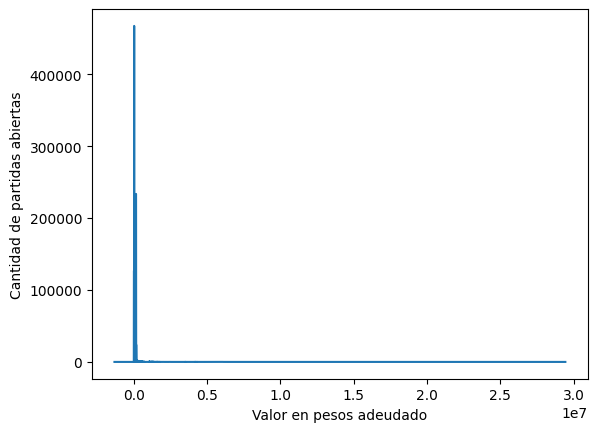

In [ ]:
#plt.figure();

plt.plot(partAb['Impte.mon.local'].value_counts().to_frame().sort_index())
plt.xlabel('Valor en pesos adeudado')
plt.ylabel('Cantidad de partidas abiertas')
plt.rcParams["figure.figsize"] = [5,4]

In [ ]:
partAb['Impte.mon.local'].value_counts().to_frame().sort_index()

,Impte.mon.local
-1328800.0,1
-1324800.0,1
-1300800.0,1
-1287200.0,1
-1276000.0,1
...,...
22212800.0,1
22412800.0,1
22623200.0,1
29124000.0,1


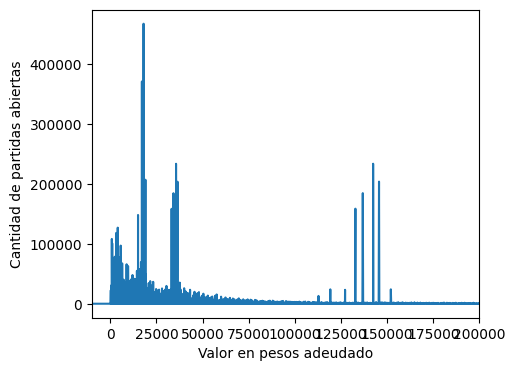

In [ ]:
plt.plot(partAb['Impte.mon.local'].value_counts().to_frame().sort_index())
plt.xlim(-10000, 200000)
plt.xlabel('Valor en pesos adeudado')
plt.ylabel('Cantidad de partidas abiertas')
plt.rcParams["figure.figsize"] = [9,6]

In [ ]:
# Exporto los importes a excel para verificar
pd.Series(partAb['Impte.mon.local'].value_counts()).to_frame().sort_index().to_excel("ImpteMonLocal.xlsx")

In [ ]:
## suma de 'Impte.mon.local'
pd.Series(partAb['Impte.mon.local'].sum()).to_frame().style.format("{:}")

,0
0,483852297774.0


In [ ]:
## Dataframe descrption
pd.Series(partAb['Impte.mon.local'].describe().apply(lambda x: format(x, 'f'))).to_frame()

,Impte.mon.local
count,8280115.000000
mean,58435.456244
std,188583.691614
min,-1328800.000000
25%,9600.000000
50%,18000.000000
75%,43200.000000
max,29436800.000000


In [ ]:
# pd.Series(partAb['Impte.mon.local'].mean()).to_frame()
# pd.Series(partAb['Impte.mon.local'].median()).to_frame()
# pd.Series(partAb['Impte.mon.local'].max()).to_frame()
# pd.Series(partAb['Impte.mon.local'].min()).to_frame()

In [ ]:
## suma de 'Impte.mon.local' por periodo
pd.Series(partAb.groupby(['Clave período'])['Impte.mon.local'].sum().apply(lambda x: format(x, 'f'))).to_frame()

,Impte.mon.local
Clave período,
2015,53187954561.000000
2016,60394321667.000000
2017,68048878589.000000
2018,55455450017.000000
2019,46116606302.000000
2020,69486884924.000000
2021,33133712414.000000
2022,98028489300.000000


In [ ]:
# pivoteo la tabla por año
partAbYear = partAb.pivot(columns='Clave período', values='Impte.mon.local')
partAbYear


Clave período,2015,2016,2017,2018,2019,2020,2021,2022
0,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
8280110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5800.0
8280111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23200.0
8280112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19000.0
8280113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18800.0


In [ ]:
## Dataframe descrption by year
pd.options.display.float_format = '{:.2f}'.format
partAbYear.describe()

Clave período,2015,2016,2017,2018,2019,2020,2021,2022
count,1184505.00,1264553.00,1311284.00,1188817.00,986036.00,1406584.00,461870.00,476466.00
mean,44903.11,47759.42,51894.84,46647.59,46769.70,49401.16,71738.18,205740.79
std,91619.99,95497.26,117409.22,119075.23,128674.59,135780.72,235736.89,577470.75
min,-1287200.00,-680000.00,-1328800.00,-308800.00,-156000.00,-145600.00,18.00,200.00
25%,8000.00,8600.00,10200.00,8800.00,9600.00,8800.00,8400.00,19000.00
50%,17100.00,17750.00,18000.00,17750.00,18000.00,18000.00,19400.00,31000.00
75%,38400.00,40800.00,43200.00,36400.00,36400.00,38000.00,60800.00,128000.00
max,10321600.00,9050400.00,10601600.00,12329600.00,7626400.00,22212800.00,29124000.00,29436800.00


In [ ]:
# CRUCES CON Impte.mon.local

In [ ]:
# Impte.mon.local vs multiples variables

partAb[['Posición','Contrato','Clave período','Nº documento','Nivel reclam','Impte.mon.local']]

,Posición,Contrato,Clave período,Nº documento,Nivel reclam,Impte.mon.local
0,1,b3885fc8913900eacbdefd3893f9c47a5a949975,2015,4e1b98f04a22bf2e551500ddab62b9c98c1d281b,0,15000.00
1,1,b3885fc8913900eacbdefd3893f9c47a5a949975,2015,e568754a1cf4986e13736738d4ea376a119827bb,0,3200.00
2,1,b3885fc8913900eacbdefd3893f9c47a5a949975,2015,c945f5263881695664471c48386b057fa94ef76a,0,800.00
3,1,5b6c8f12a6b54bb3ddc8d8a8b216362725c9c4e4,2015,8c85d05da59ae1ed824cccd19ff4e49f06735d14,0,16600.00
4,1,5b6c8f12a6b54bb3ddc8d8a8b216362725c9c4e4,2015,48889e11dec508d98f734f4a4309d4c0997480cd,0,800.00
...,...,...,...,...,...,...
8280110,2,fe497e46b8e004a476ad1c53a124a6845a9d5c08,2022,8744cdd98960bddfb82dce3283f38875ded08410,0,5800.00
8280111,1,fe497e46b8e004a476ad1c53a124a6845a9d5c08,2022,8744cdd98960bddfb82dce3283f38875ded08410,0,23200.00
8280112,1,ab3e20e937f7325fc692f9e96c7d893ac1924401,2022,73c0605c80161f0dda8318e187d635be3a5b0920,0,19000.00
8280113,2,ab3e20e937f7325fc692f9e96c7d893ac1924401,2022,36b58eb507984ff543f0a898bed826108102d27d,0,18800.00


### Contrato (placa)

In [ ]:
# Objeto contrato - Placa que identifica el automotor
pd.Series(partAb['Contrato'].value_counts()).to_frame()

,Contrato
80a7f97110ccce41f1bbe7410ce2b16caeda282f,125
2b41d5d54321459a4d2d152b50c64ec3ff3775f7,123
c5834a0593341e8b4b3ec4f78d639caa6821d694,119
af7e07b8c26e9b9c8c09f4e571bf9918e8987d22,112
532b948a98a3d6834301388d04d85133fadfaa9f,110
...,...
22fbdb718b0d92d73a7fcf37fa915185169f08f4,1
a7cfd590e9358dc61de2d7510932c14925113586,1
fc24d8617476afa864ec7daae1626525d770f2c9,1
3948396b068e6289e526e608511f7efd43c6bb43,1


### cuenta-contrato

In [ ]:
# Código único designado a la relación que existe del Impuesto Vehicular con el propietario del vehículo.
pd.Series(partAb['Cuenta contrato'].value_counts()).to_frame()

,Cuenta contrato
20000881700,281079
20000901822,18518
20000837719,7080
20000820090,4504
20001754735,4188
...,...
20000762109,1
20002621792,1
20001209083,1
20002006051,1


### Cuenta de mayor

In [ ]:
# Código de la cuenta contable a la que estará relacionado el valor de cada posición de los documentos
pd.Series(partAb['Cuenta de mayor'].value_counts()).to_frame()

,Cuenta de mayor
1384900044,1426723
1311030005,1091998
1384900043,1042294
1305335004,943843
1305335003,943807
1311040001,716978
1305330003,344025
1305330002,344003
1311020013,325238
1470900043,207699


In [ ]:
# año vs cuenta de mayor (VECES)
pd.Series(partAb.groupby(['Cuenta de mayor', 'Clave período']).size()).to_frame().reset_index(level='Clave período').pivot(columns='Clave período')


0                                                    \
Clave período        2015      2016      2017      2018      2019      2020   
Cuenta de mayor                                                               
1305330002          67.00     22.00     53.00  25548.00  54124.00  48034.00   
1305330003          68.00     23.00     54.00  25556.00  54133.00  48034.00   
1305335003       12571.00 166000.00 201668.00 186537.00 149502.00 216190.00   
1305335004       12572.00 166005.00 201683.00 186552.00 149502.00 216190.00   
1310330003      163978.00  23463.00  19334.00       NaN       NaN       NaN   
1310330004      163988.00  23469.00  19341.00       NaN       NaN       NaN   
1311020013        9900.00  16865.00  31899.00  49745.00  43405.00 104810.00   
1311030005       90647.00 140836.00 121485.00 200556.00 156082.00 269298.00   
1311040001       57839.00 217774.00 202403.00 116573.00  59781.00  62601.00   
1384900043       67741.00 234655.00 234335.00 166338.00 103193.00 167411.00   
1384900044       52572.00 192041.00 231648.00 227122.00 216314.00 274016.00   
1401030005       20455.00   9321.00   4483.00      1.00       NaN       NaN   
1401040001      171621.00  23442.00  12577.00      1.00       NaN       NaN   
1470900043      171656.00  23457.00  12585.00      1.00       NaN       NaN   
1470900044      168367.00  17859.00  13253.00   4286.00       NaN       NaN   
1470900045       20463.00   9321.00   4483.00      1.00       NaN       NaN   

                                     
Clave período        2021      2022  
Cuenta de mayor                      
1305330002       58357.00 157798.00  
1305330003       58358.00 157799.00  
1305335003       11339.00       NaN  
1305335004       11339.00       NaN  
1310330003            NaN       NaN  
1310330004            NaN       NaN  
1311020013       68586.00     28.00  
1311030005      113058.00     36.00  
1311040001           7.00       NaN  
1384900043       68593.00     28.00  
1384900044       72233.00 160777.00  
1401030005            NaN       NaN  
1401040001            NaN       NaN  
1470900043            NaN       NaN  
1470900044            NaN       NaN  
1470900045            NaN       NaN

In [ ]:
# Describe cuenta de mayor (VALORES)

# pivoteo la tabla por año
partAbCuMay = partAb.pivot(columns='Cuenta de mayor', values='Impte.mon.local')

## Dataframe descrption by cuenta de mayor
pd.options.display.float_format = '{:.2f}'.format
partAbCuMay.describe()

Cuenta de mayor,1305330002,1305330003,1305335003,1305335004,1310330003,1310330004,1311020013,1311030005,1311040001,1384900043,1384900044,1401030005,1401040001,1470900043,1470900044,1470900045
count,344003.00,344025.00,943807.00,943843.00,206775.00,206798.00,325238.00,1091998.00,716978.00,1042294.00,1426723.00,34260.00,207641.00,207699.00,203765.00,34268.00
mean,305657.63,76419.77,60376.46,15097.08,56507.39,14145.21,132575.66,29202.97,134107.76,33414.06,16531.48,15478.61,129294.71,32336.56,13605.52,3878.11
std,711049.84,177761.40,151109.75,37785.27,126318.26,31636.30,194949.02,104043.50,158085.70,42614.34,4482.13,38900.94,136815.16,34210.11,4388.64,9765.67
min,72.00,18.00,102.00,25.00,208.00,52.00,-1264800.00,36.00,-1328800.00,-332200.00,-13600.00,800.00,-1287200.00,-321800.00,-42000.00,200.00
25%,40800.00,10200.00,18400.00,4600.00,18400.00,4600.00,15200.00,2600.00,132800.00,33200.00,17100.00,3200.00,119200.00,29800.00,15000.00,800.00
50%,84000.00,21000.00,33600.00,8400.00,30400.00,7600.00,145600.00,8000.00,136800.00,35600.00,17750.00,7200.00,132800.00,33200.00,15000.00,1800.00
75%,248000.00,62000.00,55200.00,13800.00,54400.00,13600.00,145600.00,22000.00,142400.00,36400.00,18000.00,16000.00,132800.00,33200.00,15000.00,4000.00
max,29436800.00,7359200.00,8676000.00,2169000.00,6997600.00,1749400.00,12329600.00,10321600.00,10601600.00,3082400.00,19000.00,2023200.00,8176000.00,2044000.00,16600.00,505800.00


In [ ]:
# Describe posición 1 (VALORES)

# pivoteo la tabla por año y genero el describe
partAb[partAb['Posición'] == 1].pivot(columns='Cuenta de mayor', values='Impte.mon.local').describe()

Cuenta de mayor,1305330002,1305335003,1310330003,1310330004,1311020013,1311030005,1311040001,1384900044,1401030005,1401040001,1470900044,1470900045
count,344003.00,943807.00,206775.00,127499.00,325238.00,1091827.00,716978.00,1426723.00,34260.00,207641.00,203765.00,34207.00
mean,305657.63,60376.46,56507.39,14749.17,132575.66,29201.66,134107.76,16531.48,15478.61,129294.71,13605.52,3874.29
std,711049.84,151109.75,126318.26,33349.69,194949.02,104047.69,158085.70,4482.13,38900.94,136815.16,4388.64,9768.79
min,72.00,102.00,208.00,280.00,-1264800.00,36.00,-1328800.00,-13600.00,800.00,-1287200.00,-42000.00,200.00
25%,40800.00,18400.00,18400.00,4600.00,15200.00,2600.00,132800.00,17100.00,3200.00,119200.00,15000.00,800.00
50%,84000.00,33600.00,30400.00,7600.00,145600.00,8000.00,136800.00,17750.00,7200.00,132800.00,15000.00,1800.00
75%,248000.00,55200.00,54400.00,13800.00,145600.00,22000.00,142400.00,18000.00,16000.00,132800.00,15000.00,4000.00
max,29436800.00,8676000.00,6997600.00,1749400.00,12329600.00,10321600.00,10601600.00,19000.00,2023200.00,8176000.00,16600.00,505800.00


In [ ]:
# Describe posición 2 (VALORES)

# pivoteo la tabla por año y genero el describe
partAb[partAb['Posición'] == 2].pivot(columns='Cuenta de mayor', values='Impte.mon.local').describe()

Cuenta de mayor,1305330003,1305335004,1310330004,1311030005,1384900043,1470900043,1470900045
count,344025.00,943843.00,79299.00,171.00,1042294.00,207699.00,61.00
mean,76419.77,15097.08,13174.14,37559.82,33414.06,32336.56,6022.95
std,177761.40,37785.27,28641.11,72299.22,42614.34,34210.11,7580.69
min,18.00,25.00,52.00,200.00,-332200.00,-321800.00,400.00
25%,10200.00,4600.00,4600.00,4565.00,33200.00,29800.00,2000.00
50%,21000.00,8400.00,7600.00,12400.00,35600.00,33200.00,2400.00
75%,62000.00,13800.00,13600.00,31900.00,36400.00,33200.00,7200.00
max,7359200.00,2169000.00,1108400.00,613400.00,3082400.00,2044000.00,37800.00


In [ ]:
## suma de 'Impte.mon.local' vs cuenta de mayor (VALOR)
pd.Series(partAb.groupby(['Cuenta de mayor'])['Impte.mon.local'].sum().apply(lambda x: format(x, 'f'))).to_frame()

,Impte.mon.local
Cuenta de mayor,
1305330002,105147142913.000000
1305330003,26290311031.000000
1305335003,56983724623.000000
1305335004,14249270916.000000
1310330003,11684315504.000000
1310330004,2925200410.000000
1311020013,43118644030.000000
1311030005,31889582104.000000
1311040001,96152315254.000000


### Fecha contab

In [ ]:
# Fecha del periodo en el que será reconocido el monto de la operación en el sistema
pd.Series(partAb['Fecha contab'].value_counts()).to_frame()

,Fecha contab
2021-10-28,376520
2021-10-12,326614
2020-12-09,283854
2018-04-30,248258
2019-10-10,210746
...,...
2016-10-02,2
2015-09-20,2
2020-01-03,2
2016-02-28,2


In [ ]:
pd.Series(partAb.groupby(['Clave período', 'Fecha contab']).size()).to_frame()

0
Clave período Fecha contab      
2015          2015-01-03       4
              2015-01-05      38
              2015-01-06      41
              2015-01-07      37
              2015-01-08      43
...                          ...
2022          2022-04-02    2942
              2022-04-03    1873
              2022-04-04    8821
              2022-04-05    9052
              2022-04-30       2

[10119 rows x 1 columns]

In [ ]:
# exporto el dataframe para construir la tabla de calor
# pd.Series(partAb.groupby(['Clave período', 'Fecha contab']).size()).to_excel("año_contab.xlsx")

In [ ]:
partAb['Fecha contab'].value_counts().to_frame().sort_index().index

DatetimeIndex(['2015-01-03', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11',
               '2015-01-12', '2015-01-13',
               ...
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-30'],
              dtype='datetime64[ns]', length=2567, freq=None)

In [ ]:
partAb['Fecha contab'].value_counts().to_frame().sort_index()['Fecha contab'].to_list()

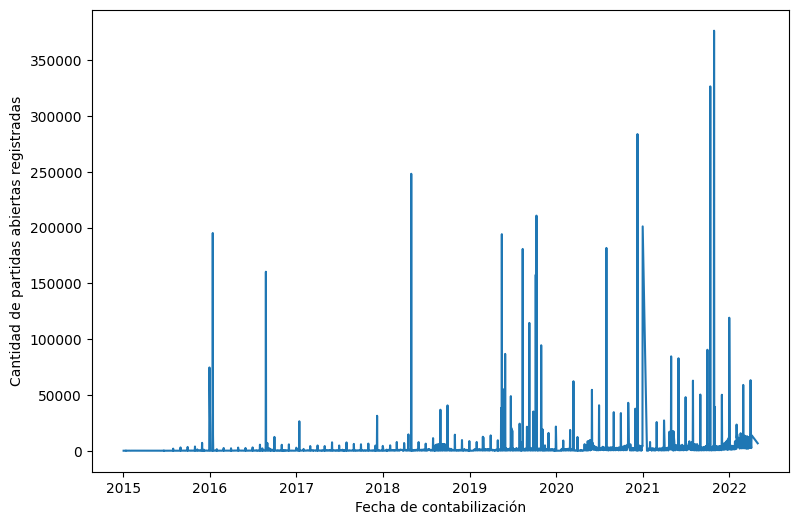

In [ ]:
plt.plot(partAb['Fecha contab'].value_counts().to_frame().sort_index())
plt.xlabel('Fecha de contabilización')
plt.ylabel('Cantidad de partidas abiertas registradas')
plt.rcParams["figure.figsize"] = [9,6]

In [ ]:
partAb['Fecha contab'].value_counts().to_frame().sort_index()

,Fecha contab
2015-01-03,4
2015-01-05,38
2015-01-06,41
2015-01-07,37
2015-01-08,43
...,...
2022-04-02,4353
2022-04-03,2372
2022-04-04,13279
2022-04-05,13722


### Clave período

In [ ]:
# Año de la Vigencia fiscal a la que están relacionados los saldos contabilizados
pd.Series(partAb['Clave período'].value_counts()).to_frame()

,Clave período
2020,1406584
2017,1311284
2016,1264553
2018,1188817
2015,1184505
2019,986036
2022,476466
2021,461870


### Clase documento

In [ ]:
# (ver el diccionario)
pd.Series(partAb['Clase documento'].value_counts()).to_frame()

,Clase documento
FR,2988376
CS,2499850
SI,1630488
IN,1160526
RV,875


### referencia

In [ ]:
# Código que identifica la liquidación de un vehiculo con los documentos por 
# cada concepto  que conforma la declaracion del impuesto vehicular en una 
# vigencia fiscal

pd.Series(partAb['Referencia'].value_counts()).to_frame()

,Referencia
310881119,64
307114152.0,59
311008482,58
311355359,55
310566814,55
...,...
3200184848.0,1
3400185249.0,1
3400185273.0,1
3400185284.0,1


### interl comercial

In [ ]:
# Código que Identifica a cada usuario creado en el sistema SAP. 

pd.Series(partAb['InterlComerc'].value_counts()).to_frame()

,InterlComerc
1001061777,281187
1000002417,18518
1000991921,7080
1000925004,4504
1002087517,4188
...,...
1000421735,1
1000987280,1
1000217686,1
1002393847,1


In [ ]:
#  Clave que relaciona los registros y movimientos que son transferidos al módulo financiero

pd.Series(partAb['Clv.reconcil'].value_counts()).to_frame()

,Clv.reconcil
19101001/T15,195435
20070701/T13,105086
20121101/VHI,99760
19103001AT15,85602
18042101/VHI,82300
...,...
15033001/VE6,1
15031001AVHI,1
17031601/Q13,1
18031435/DH,1


In [ ]:
# (ver el diccionario)
pd.Series(partAb['Tipo Novedad'].value_counts()).to_frame()

,Tipo Novedad


In [ ]:
# Fecha Acto ingresada al registrar la novedad

pd.Series(partAb['Fecha Novedad'].value_counts()).to_frame()

,Fecha Novedad
0,8280115


In [ ]:
# "X" si la vigencia fiscal tiene bloqueo por acuerdo de pagos que habia sido registrado en el sistema SIAPA

pd.Series(partAb['AP Siapa'].value_counts()).to_frame()

,AP Siapa


In [ ]:
# Relaciona para todos los documentos de una referencia el código de 
# procedimiento de reclamación “Proced.reclam” que este asociado a las clase 
# de documento FR, CI, RV de la misma referencia

pd.Series(partAb['Proced.reclam2'].value_counts()).to_frame()

,Proced.reclam2
13.00,4566684
11.00,7
12.00,5


In [ ]:
# Relaciona para todos los documentos de una referencia el código de MAYOR NÚMERO 
# del Nivel de reclamación del campo “Nivel reclam” que este asociado 
# a los documentos de la misma referencia

pd.Series(partAb['Nivel reclam2'].value_counts()).to_frame()

,Nivel reclam2
0,3713419
12,1248478
8,1196549
11,1154607
13,921654
3,44283
1,817
10,269
16,34
7,5


In [ ]:
partAb.dtypes

In [ ]:
## EXPORTO EL DF CON LOS DATOS UTILES
partAb[['Contrato','InterlComerc','Cuenta contrato','Clave período','Nº documento','Posición','Op.parcial','Impte.mon.local']].to_csv(raiz + '/2.cleansed/partAb.csv')

## **1.4-VEHÍCULOS**

### 1.4.1-(BUT0ID_1) Interlocutor Comercial ---------> (NO ES UTIL)

In [ ]:
# veh_InterCom
veh_InterCom = pd.read_csv( raiz +'/1.landing/Vehículos/BUT0ID_1.csv', sep = '€', encoding='utf-8', engine='python')

In [ ]:
veh_InterCom

,Unnamed: 0,CLIENT,PARTNER,TYPE,IDNUMBER,COUNTRY,REGION
0,0,700,a3f39c6590e84aec4c8bd8e5a28a836771189484,CC,938c220898055dda0b55a46a725b448054cdc5dd,CO,NaN
1,1,700,3fb27d3ecca4d2624c055bb7e1957fe161d7e5b1,CC,617d9074fee6c2e8041030cab0afc87063cc14f5,CO,NaN
2,2,700,b99fe861835950bd6dcbfedc9c8d027edd1e7145,CC,1fbf05044f31b32215f17ff5c49cda3e32a5ebbe,CO,NaN
3,3,700,d00216269f2bd7106896d56a1f5b0686a00e8ebc,CC,bf3dd07aac98c2753677c6620df2fa18e3c513e3,CO,NaN
4,4,700,5add2a553e3e38e6fa59eede2158208b9b75694b,CC,9af64db1960efdc246cecce22094c53bd28997cb,CO,NaN
...,...,...,...,...,...,...,...
2728258,2728258,700,9e6927a99d7028d50d4089ce2e066a0c900e556d,CC,69846f8c124b556728cb02a84ffaa3dd572ab536,NaN,NaN
2728259,2728259,700,f1a11eaf297e813b96d74670a925fbd42b7077bd,CC,cd89db136077e34fdfc01e879a12f468fb119663,NaN,NaN
2728260,2728260,700,3e90eadda1a3bc44e4076a86cbd8e8b48ea54768,CC,a7925de2cd0f747d87645179157a43dfbf90f568,NaN,NaN
2728261,2728261,700,2834dc7c0228b76cc985f18d9924e7ce96c9d6d1,CC,845d1a7f2190c8e94906e27d70587db05984f2f2,NaN,NaN


In [ ]:
veh_InterCom.dtypes

Unnamed: 0      int64
CLIENT          int64
PARTNER        object
TYPE           object
IDNUMBER       object
COUNTRY        object
REGION        float64
dtype: object

In [ ]:
pd.Series(veh_InterCom['CLIENT'].value_counts()).to_frame()

,CLIENT
700,2728263


In [ ]:
pd.Series(veh_InterCom['TYPE'].value_counts()).to_frame()

,TYPE
CC,2618695
NIT,78831
NREXT,8317
CE,7694
TI,7366
PASAP,6394
NUIP,726
RC,144
TP,36
CD,17


In [ ]:
pd.Series(veh_InterCom['COUNTRY'].value_counts()).to_frame()

,COUNTRY
CO,490230
TV,1
CR,1


In [ ]:
pd.Series(veh_InterCom['REGION'].value_counts()).to_frame()

,REGION
11.00,1
5.00,1
68.00,1


### 1.4.2-(ZHV_D_BDT) Caracteristicas Objetos Contrato (placas)

In [ ]:
# veh_ObjContr
veh_ObjContr = pd.read_csv( raiz +'/1.landing/Vehículos/ZVH_D_BDT_1.csv', sep = '€', encoding='utf-8', engine='python')

In [ ]:
veh_ObjContr

,Unnamed: 0,MANDT,PSOBKEY,WAERS,MODELO,CODUSO,CODMARCA,CODLINEA,CODCLASE,CODCARROC,...,NAL_IMP,VALORFACT,FECHAFACT,NUMFACT,CODCAN,CODNOV,LIQ_ACTIVA,FCH_ACTO,ZZNIVBLI,LIQ_VIGENCIA
0,0,700,50ecb6a9404bb87ca22d4b5be63e9735706bef3e,COP,1994.0,3.0,VW,VW039,1.0,5.0,...,I,0.01,19940101,CI,NaN,NaN,S,0.0,NaN,NaN
1,1,700,db5a37127676b68ff4da9e8dd467a4eede5480ea,COP,2016.0,3.0,MZ,MZ829,1.0,14.0,...,N,549600.00,20150922,1,NaN,0.0,S,0.0,NaN,NaN
2,2,700,21ec260b97988d92b57fcf7f3768df1105733339,COP,2009.0,3.0,VW,VW668,1.0,5.0,...,N,0.01,20090101,CI,NaN,NaN,S,0.0,NaN,NaN
3,3,700,ba5ad594c2cac243b16238552e45e90af370edd5,COP,2001.0,3.0,RN,RN168,1.0,5.0,...,N,0.01,20010101,CI,NaN,7.0,N,20131223.0,NaN,NaN
4,4,700,9ec46220fbf960534a57b1f0fca16051f68e762f,COP,2015.0,3.0,ZC,ZC018,10.0,0.0,...,N,33530.00,20150129,2692,NaN,0.0,S,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572338,1572338,700,d3fc7e4bd878f5520efe8a68f156606da3aa0cb1,COP,1990.0,3.0,RN,RN064,1.0,14.0,...,N,0.01,19900101,CI,NaN,NaN,S,0.0,NaN,NaN
1572339,1572339,700,dd2c13eec01a6ff5f673dc604ab741b39106e255,COP,2013.0,3.0,CH,CH524,5.0,23.0,...,N,0.00,0,NaN,NaN,0.0,S,0.0,NaN,NaN
1572340,1572340,700,3bc2db272e56f47e2fa08db7160efb8ca544c178,COP,2022.0,3.0,BL,BL173,10.0,0.0,...,N,117996.30,20220222,MEDC 410,NaN,0.0,S,0.0,NaN,NaN
1572341,1572341,700,b8c1882c68a26e103a67fc3619afafd605050c6a,COP,2022.0,3.0,RN,RN1019,1.0,14.0,...,N,371942.91,20220201,24VN 215,NaN,0.0,S,0.0,NaN,NaN


In [ ]:
## 
pd.Series(veh_ObjContr['MANDT'].value_counts()).to_frame()

,MANDT
700,1572343


In [ ]:
# Objeto contrato (placa del automotor)
pd.Series(veh_ObjContr['PSOBKEY'].value_counts()).to_frame()

,PSOBKEY
50ecb6a9404bb87ca22d4b5be63e9735706bef3e,1
a0dab17d70fece6712c2741634a2bc73d69cc027,1
dd2fe57201dee4da411401d568d571e8b011761a,1
4ef4f13b84e941ec5207948569de65335cf7f5bd,1
93492eeb70efd8bf4c3501d92aaaa07a5775c3b6,1
...,...
2c64b92bc2c258d84458ce7962d5200994893414,1
158e7a0a26c32178c744e6c1154f296619fe2b92,1
0bcbfc2dc7b0a6b02b4666f075f0ef7a03de0dfb,1
4cf8ab536dd652a619b618f1785c45486dcb29c9,1


In [ ]:
# ¿Moneda?
pd.Series(veh_ObjContr['WAERS'].value_counts()).to_frame()

,WAERS
COP,1572343


#### modelo

In [ ]:
# corrijo valores del modelo
veh_ObjContr.loc[veh_ObjContr['MODELO'] == 85,'MODELO'] = 1985
veh_ObjContr.loc[veh_ObjContr['MODELO'] == 201,'MODELO'] = 2001
veh_ObjContr.loc[veh_ObjContr['MODELO'] == 206,'MODELO'] = 2006

In [ ]:
pd.Series(veh_ObjContr['MODELO'].value_counts()).to_frame().sort_index()

,MODELO
1900.0,1
1918.0,1
1919.0,1
1922.0,5
1923.0,1
...,...
2020.0,80070
2021.0,76955
2022.0,104557
2023.0,10420


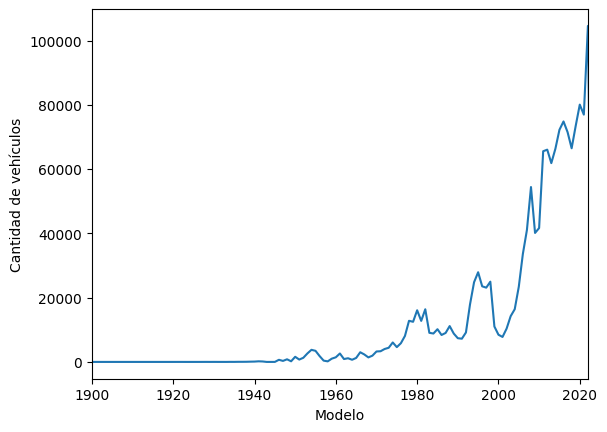

In [ ]:
plt.plot(pd.Series(veh_ObjContr['MODELO'].value_counts()).to_frame().sort_index())
plt.xlim(1900, 2022)
plt.xlabel('Modelo')
plt.ylabel('Cantidad de vehículos')
plt.rcParams["figure.figsize"] = [9,6]

In [ ]:
#pd.Series(veh_ObjContr['MODELO'].value_counts()).to_excel("modelo.xlsx")

#### uso

In [ ]:
## Código de Tipo de Servicio  (Ver Hoja "Listas")
pd.Series(veh_ObjContr['CODUSO'].value_counts()).to_frame()

,CODUSO
3.0,1556031
2.0,8493
1.0,6356
6.0,1315
5.0,119
4.0,5


#### marca, linea y clase

In [ ]:
## Marca
pd.Series(veh_ObjContr['CODMARCA'].value_counts()).to_frame()

,CODMARCA
CH,220747
RN,219621
BL,162916
YH,160375
MZ,110634
...,...
HY,1
MHM,1
ZHO,1
GOL,1


In [ ]:
## linea
pd.Series(veh_ObjContr['CODLINEA'].value_counts()).to_frame()

,CODLINEA
YH294,32966
CH1833,27742
BL038,21221
YH559,15834
YH364,14699
...,...
POL016,1
JE009,1
CI043,1
HO483,1


In [ ]:
## clase
pd.Series(veh_ObjContr['CODCLASE'].value_counts()).to_frame()

,CODCLASE
1.0,593871
10.0,577359
5.0,198839
6.0,144665
4.0,16232
15.0,15416
16.0,4925
8.0,3700
92.0,3407
90.0,3384


In [ ]:
## marca, linea y clase
## 
veh_marca = veh_ObjContr[['CODMARCA','CODLINEA','CODCLASE']]
veh_marca = veh_marca.groupby(['CODMARCA','CODLINEA','CODCLASE'],as_index=False).size().sort_values(by=['size'], ascending=False)
veh_marca

,CODMARCA,CODLINEA,CODCLASE,size
20678,YH,YH294,10.0,32966
2825,CH,CH1833,1.0,27742
818,BL,BL038,10.0,21221
20927,YH,YH559,10.0,15834
20760,YH,YH364,10.0,14698
...,...,...,...,...
12466,MB,MB972,5.0,1
12468,MB,MB973,5.0,1
3006,CH,CH2012,9.0,1
12474,MB,MB977,5.0,1


In [ ]:
#veh_marca.to_excel("marcaCarro.xlsx")

#### carrocería

In [ ]:
# Código de Carroceria 
pd.Series(veh_ObjContr['CODCARROC'].value_counts()).to_frame()

,CODCARROC
0.0,492716
14.0,384108
39.0,148734
77.0,129949
2.0,96855
...,...
18.0,2
45.0,1
25.0,1
92.0,1


#### cilindraje

In [ ]:
# Cilindraje del vehiculo en los soportes (Factura, Matricula, Historial o RUNT)
pd.Series(veh_ObjContr['CILIND'].value_counts()).to_frame()

,CILIND
149,107635
1598,81342
1600,77518
1300,74653
1400,60695
...,...
5993,1
2412,1
6588,1
4499,1


In [ ]:
pd.Series(veh_ObjContr['CILIND'].value_counts()).sort_index()

0         1564
1        10737
2            9
3           16
4           12
         ...  
15000        5
15290        1
16000        1
21248        2
60000        1
Name: CILIND, Length: 1990, dtype: int64

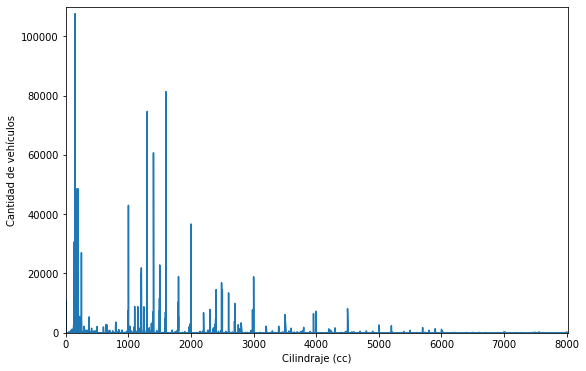

In [ ]:
plt.plot(pd.Series(veh_ObjContr['CILIND'].value_counts()).to_frame().sort_index())
plt.xlim(0, 8022)
plt.ylim(0, 110000)
plt.xlabel('Cilindraje (cc)')
plt.ylabel('Cantidad de vehículos')
plt.rcParams["figure.figsize"] = [9,6]

In [ ]:
pd.Series(veh_ObjContr['CILIND'].value_counts()).to_frame().to_excel('veh_cilindraje.xlsx')

In [ ]:
# Codigo de  rangos de cilindraje por vigencia fiscal
pd.Series(veh_ObjContr['CODCILIN'].value_counts()).to_frame()

,CODCILIN
03,260269
07,199973
06,131079
01,116946
05,114154
...,...
268,1
136,1
94,1
163,1


#### capacidad

In [ ]:
# Si el TIPOCARGA es "P" el dato en este campo indicará la cantidad de pasajeros.
#Si el TIPOCARGA es "C" el dato en este campo indicará tonelaje.

pd.Series(veh_ObjContr['CAPACID'].value_counts()).to_frame()

,CAPACID
2.00,463640
5.00,424646
0.00,321793
4.00,189008
1.00,92909
...,...
659.00,1
149.00,1
4.81,1
830.00,1


In [ ]:
## capacidad vs tipo vs clase
## 
veh_cap = veh_ObjContr[['CAPACID','TIPOCARGA','CODCLASE']]
veh_cap = veh_cap.groupby(['CAPACID','TIPOCARGA','CODCLASE'],as_index=False).size().sort_values(by=['size'], ascending=False)
veh_cap = veh_cap.set_index(['CAPACID','TIPOCARGA'])
veh_cap = veh_cap.pivot(columns='CODCLASE')
veh_cap

size                                                 \
CODCLASE              1.0    2.0   3.0     4.0      5.0      6.0     7.0    
CAPACID TIPOCARGA                                                           
0.00    C             68.0    1.0   NaN  4560.0  22439.0    132.0     1.0   
        P          45574.0  322.0  94.0     6.0  46922.0  13531.0  1016.0   
0.01    C              NaN    NaN   NaN    47.0      3.0      NaN     NaN   
        P              NaN    NaN   NaN     NaN      1.0      NaN     NaN   
0.02    C              NaN    NaN   NaN     4.0      NaN      NaN     NaN   
...                    ...    ...   ...     ...      ...      ...     ...   
4000.00 C              NaN    NaN   NaN     1.0      NaN      NaN     NaN   
7000.00 C              NaN    NaN   NaN     2.0      NaN      NaN     NaN   
7764.00 C              NaN    NaN   NaN     1.0      NaN      NaN     NaN   
8700.00 C              NaN    NaN   NaN     NaN      NaN      NaN     NaN   
9800.00 C              NaN    NaN   NaN     NaN      NaN      NaN     NaN   

                                         ...                                   \
CODCLASE            8.0   9.0      10.0  ... 21.0 22.0  79.0  80.0 81.0  82.0   
CAPACID TIPOCARGA                        ...                                    
0.00    C          991.0  77.0      3.0  ...  NaN  NaN   7.0   NaN  NaN   9.0   
        P            2.0   2.0  48967.0  ...  3.0  9.0  74.0  33.0  4.0  21.0   
0.01    C           14.0   1.0      NaN  ...  NaN  NaN   NaN   NaN  NaN   NaN   
        P            2.0   NaN      NaN  ...  NaN  NaN   NaN   NaN  NaN   NaN   
0.02    C            3.0   1.0      NaN  ...  NaN  NaN   NaN   NaN  NaN   NaN   
...                  ...   ...      ...  ...  ...  ...   ...   ...  ...   ...   
4000.00 C            NaN   NaN      NaN  ...  NaN  NaN   NaN   NaN  NaN   NaN   
7000.00 C            NaN   NaN      NaN  ...  NaN  NaN   NaN   NaN  NaN   NaN   
7764.00 C            NaN   NaN      NaN  ...  NaN  NaN   NaN   NaN  NaN   NaN   
8700.00 C            1.0   NaN      NaN  ...  NaN  NaN   NaN   NaN  NaN   NaN   
9800.00 C            1.0   NaN      NaN  ...  NaN  NaN   NaN   NaN  NaN   NaN   

                                         
CODCLASE           90.0 91.0  92.0 93.0  
CAPACID TIPOCARGA                        
0.00    C           NaN  NaN   NaN  NaN  
        P          20.0  1.0  42.0  4.0  
0.01    C           NaN  NaN   NaN  NaN  
        P           NaN  NaN   NaN  NaN  
0.02    C           NaN  NaN   NaN  NaN  
...                 ...  ...   ...  ...  
4000.00 C           NaN  NaN   NaN  NaN  
7000.00 C           NaN  NaN   NaN  NaN  
7764.00 C           NaN  NaN   NaN  NaN  
8700.00 C           NaN  NaN   NaN  NaN  
9800.00 C           NaN  NaN   NaN  NaN  

[703 rows x 29 columns]

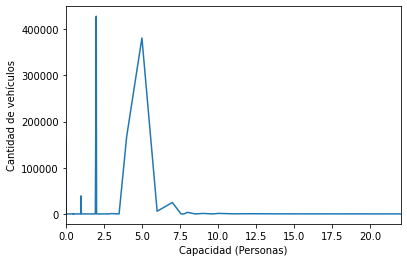

In [ ]:
# Capacidad de vehículos particulares 
veh_cap_P = veh_ObjContr[veh_ObjContr['TIPOCARGA'] == 'P']

plt.plot(pd.Series(veh_cap_P['CAPACID'].value_counts()).to_frame().sort_index())
plt.xlim(0, 22)
#plt.ylim(0, 110000)
plt.xlabel('Capacidad (Personas)')
plt.ylabel('Cantidad de vehículos')
plt.rcParams["figure.figsize"] = [9,6]

In [ ]:
pd.Series(veh_cap_P['CAPACID'].value_counts()).to_frame().sort_index()

,CAPACID
0.00,158331
0.01,3
0.05,1
0.10,219
0.15,1
...,...
830.00,1
1598.00,2
1865.00,1
2990.00,1


In [ ]:
veh_cap.to_excel('veh_cap.xlsx')

In [ ]:
# De acuerdo a la clase del vehiculo permite seleccionar un código que identifica un rango de pasajeros o de tonelaje por vigencia
pd.Series(veh_ObjContr['CODCAP'].value_counts()).to_frame()

,CODCAP
1.0,580388
5.0,84985
2.0,31735
3.0,12181
7.0,8711
0.0,6740
4.0,6703
6.0,1899
8.0,1460
10.0,943


#### tipo de carga

In [ ]:
# Diferencia si un Vehículo es de Carga o de Pasajeros
pd.Series(veh_ObjContr['TIPOCARGA'].value_counts()).to_frame()

,TIPOCARGA
P,1216683
C,126014


In [ ]:
# Una "X" en este campo indicará que el vehiculo está registrado en la entidad de transito como un vehiculo Clasico / Antiguo
pd.Series(veh_ObjContr['CLASICO'].value_counts()).to_frame()

,CLASICO
N,35596
X,381
0,1


In [ ]:
# Una "X" en este campo indicará que el vehiculo está blindado
pd.Series(veh_ObjContr['BLINDAJE'].value_counts()).to_frame()

,BLINDAJE
X,2568


In [ ]:
# porcentaje tarifario que se haya utilizado para los calculculos de la última liquidacion generada
pd.Series(veh_ObjContr['PORCEN'].value_counts()).to_frame()

,PORCEN
1.5,1412009
2.5,97764
0.0,42403
3.5,19285
1.0,882


#### avalúo

In [ ]:
# Base gravable de la última liquidación generada
pd.Series(veh_ObjContr['AVALUO'].value_counts()).to_frame()

,AVALUO
0.00,42144
20000.00,18285
30000.00,13441
40000.00,10534
50000.00,9307
...,...
56524.09,1
77225.89,1
94714.29,1
86088.65,1


In [ ]:
pd.Series(veh_ObjContr['AVALUO']).to_frame().describe()

,AVALUO
count,1.572343e+06
mean,1.640434e+05
std,2.501402e+05
min,0.000000e+00
25%,3.300000e+04
50%,7.110000e+04
75%,1.920000e+05
max,1.051320e+07


In [ ]:
veh_ObjContr.pivot(columns='CODUSO', values='AVALUO').describe()

CODUSO,NaN,1.0,2.0,3.0,4.0,5.0,6.0
count,24.0,6.356000e+03,8.493000e+03,1.556031e+06,5.000000,1.190000e+02,1.315000e+03
mean,0.0,1.964879e+05,8.665902e+04,1.644522e+05,70860.000000,5.334751e+04,3.665147e+04
std,0.0,3.176628e+05,1.048389e+05,2.503811e+05,102885.363391,1.515373e+05,1.045182e+05
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.0,3.170000e+04,2.600000e+04,3.300000e+04,20000.000000,0.000000e+00,0.000000e+00
50%,0.0,8.040000e+04,6.300000e+04,7.140000e+04,32300.000000,3.022286e+04,6.500000e+03
75%,0.0,2.142500e+05,1.300000e+05,1.930000e+05,50000.000000,4.948047e+04,2.730000e+04
max,0.0,5.048270e+06,2.099000e+06,1.051320e+07,252000.000000,1.376095e+06,1.578800e+06


In [ ]:
veh_ObjContr.pivot(columns='CODUSO', values='AVALUO').describe().to_excel('veh_cod_avaluo.xlsx')

In [ ]:
## capacidad vs tipo vs clase
## 
veh_cap = veh_ObjContr[['AVALUO','TIPOCARGA','CODCLASE']]
veh_cap = veh_cap.groupby(['CAPACID','TIPOCARGA','CODCLASE'],as_index=False).size().sort_values(by=['size'], ascending=False)
veh_cap = veh_cap.set_index(['CAPACID','TIPOCARGA'])
veh_cap = veh_cap.pivot(columns='CODCLASE')
veh_cap

In [ ]:
# Valor total de la ultima liquidación generada
pd.Series(veh_ObjContr['VALORLIQ'].value_counts()).to_frame()

,VALORLIQ
0.0,44180
450.0,22355
300.0,21988
600.0,21583
750.0,17253
...,...
49700.0,1
3601.0,1
31500.0,1
63000.0,1


In [ ]:
# Numero de Referencia de la última liquidación generada
pd.Series(veh_ObjContr['NUMLIQ'].value_counts()).to_frame()

,NUMLIQ
311144531.0,1
311322253.0,1
311261525.0,1
302618940.0,1
310757999.0,1
...,...
310990776.0,1
310469000.0,1
310958222.0,1
310471514.0,1


In [ ]:
# 
pd.Series(veh_ObjContr['LIQANULADA'].value_counts()).to_frame()

,LIQANULADA
X,472


In [ ]:
# 
pd.Series(veh_ObjContr['GRUPO'].value_counts()).to_frame()

,GRUPO
A3,21923
B3,15975
A968,8182
O827,7754
M959,7520
...,...
C705,1
Q674,1
C749,1
E865,1


In [ ]:
# 
pd.Series(veh_ObjContr['FECHAVTO_SOAT'].value_counts()).to_frame()

,FECHAVTO_SOAT
0,1564803
20221020,37
20220920,35
20221120,35
20221129,33
...,...
20190731,1
20130615,1
20220116,1
20210914,1


In [ ]:
#
pd.Series(veh_ObjContr['NIT_SOAT'].value_counts()).to_frame()

,NIT_SOAT
5d86e9bcd486a48a4313948c0f62e4a80f54a9b7,3116
cb842d5e924a73201e754e07db867e616ee3e5e7,886
86590c2feea110d8891fa656e312e0e5c7ec758b,789
b71657ae8758f309166222cef9f75521d965d6e4,588
0972828ac76f0a9e65ca38d59489cf3c9f8e82aa,508
1f161e476d2d9e8ccd62f3a356a55511d5c87fbf,463
65f17ae08c28ea8ee8cae04784283041b023f12c,425
4aeeaeac9aebf015ee22f57c10aecd103d780e4b,246
2f2f3fc6043cbac6f5116cf039c02802f8ca47b2,181
c1d77121e1e83571f0b21cca70b9adaf000d3ca8,132


In [ ]:
# AT - AUTOMATICA
# MT - MECANICA
# TP - TRIPTONICA
pd.Series(veh_ObjContr['TIPO_CAJA'].value_counts()).to_frame()

,TIPO_CAJA
MT,1132552
AT,201500
TP,30512


In [ ]:
# 
pd.Series(veh_ObjContr['NUMSILLAS'].value_counts()).to_frame()

,NUMSILLAS
5.0,3


In [ ]:
# Numero de puertas según las caracteristicas técnicas del vehiculo
pd.Series(veh_ObjContr['PUERTAS'].value_counts()).to_frame()

,PUERTAS
4P,427099
5P,267648
2P,94956
3P,41330
7P,68
8P,31


In [ ]:
# Característica del vehículo mecanismo que permite llevar la fuerza y el movimiento generado
# por el motor hasta las ruedas para que el vehículo se mueva. Ejem.  '4X2', '4X4', '2T', '4T', '6X2', '6X6', '8X4', '6X4', '8X2'
pd.Series(veh_ObjContr['COMBUST_AIRE'].value_counts()).to_frame()

,COMBUST_AIRE
4X2,533953
4T,403005
4X4,160323
2T,31228
6X4,279
6X2,177
8X4,24
6X6,23
8X2,13


#### ciudad de inscripción

In [ ]:
# Código DANE del Municipio del Organismo de Transito donde se encuentra inscrito el automotor.
# El código 999 - Corresponde al Organismo de Transito Departamental
pd.Series(veh_ObjContr['CITY_CODE'].value_counts()).to_frame()

,CITY_CODE
000000005266,442797
000000005001,315256
000000005631,268792
000000005360,88481
000000000999,71538
...,...
000000068895,1
000000005313,1
000000027075,1
000000013188,1


In [ ]:
# Código DANE del Departamento en el que se encuentra inscrito el Automotor
pd.Series(veh_ObjContr['REGION'].value_counts()).to_frame()

,REGION
05,1483850
11,25281
76,11157
25,9634
17,8972
68,5189
66,3971
63,3452
52,2871
15,2696


In [ ]:
# Fecha de matricula del automotor
pd.Series(veh_ObjContr['FECHAMAT'].value_counts()).to_frame()

,FECHAMAT
20080101,13404
19950101,13220
19940101,11287
19800101,11057
19960101,10770
...,...
19520324,1
20010701,1
19530202,1
20071202,1


#### nacional o importado

In [ ]:
# Tiene los valores N- Nacional o I-Importado
pd.Series(veh_ObjContr['NAL_IMP'].value_counts()).to_frame()

,NAL_IMP
N,1496233
I,75973


In [ ]:
veh_ObjContr.dtypes

Unnamed: 0         int64
MANDT              int64
PSOBKEY           object
WAERS             object
MODELO           float64
CODUSO           float64
CODMARCA          object
CODLINEA          object
CODCLASE         float64
CODCARROC        float64
CILIND             int64
CODCILIN          object
CAPACID          float64
CODCAP           float64
TIPOCARGA         object
CLASICO           object
BLINDAJE          object
PORCEN           float64
AVALUO           float64
VALORLIQ         float64
NUMLIQ           float64
LIQANULADA        object
GRUPO             object
FECHAVTO_SOAT      int64
NIT_SOAT          object
TIPO_CAJA         object
NUMSILLAS        float64
PUERTAS           object
COMBUST_AIRE      object
CITY_CODE         object
REGION            object
FECHAMAT           int64
NAL_IMP           object
VALORFACT        float64
FECHAFACT          int64
NUMFACT           object
CODCAN           float64
CODNOV           float64
LIQ_ACTIVA        object
FCH_ACTO         float64


In [ ]:
## EXPORTO EL DF CON LOS DATOS UTILES
veh_ObjContr[['PSOBKEY','MODELO','CODUSO','CODMARCA','CODCLASE','CILIND','AVALUO']].to_csv(raiz + '/2.cleansed/veh_ObjContr.csv')

### 1.4.3-(DPSOB_BP) Relación interlocutor comercial con objeto contrato

In [ ]:
veh_IC_OC = pd.read_csv( raiz +'/1.landing/Vehículos/DPSOB_BP_ACC_1.csv', sep = '€', encoding='utf-8', engine='python')

In [ ]:
veh_IC_OC

,Unnamed: 0,CLIENT,PSOBKEY,PARTNER,PARTNERACCTYP,ERDAT,XOBSL,PARTNERACC,LEGACYOBJK3,KOFIZ,ADRNR,COPRC,INVTP,FILSTAT
0,0,700,4b2fb1453cb5fc8b521c089e13e6087115ddc81c,dc12b8b03aecb97cfc3a4d59d4dcd5da1574b7e4,2.0,20091111,NaN,2.000063e+10,NaN,NaN,NaN,V001,NaN,NaN
1,1,700,8726c7232851d89efba0b9be96f863f984d85d4d,5e4d6525ebef055a006f7e7fcfa44b1082fc6807,2.0,20091111,X,2.000063e+10,NaN,NaN,NaN,V001,NaN,NaN
2,2,700,6d7aee7b3557dddbaabde89d2eda80edac1fce15,4347c38574414d6d43f0ab6051ead24519046ce4,2.0,20091111,NaN,2.000063e+10,NaN,NaN,NaN,V001,NaN,NaN
3,3,700,0e5130f09bf9cf9134e0afb673e627403111d54e,df6ab50fa9cba2c10140187ba735c831da564714,2.0,20091111,NaN,2.000063e+10,NaN,NaN,NaN,V001,NaN,NaN
4,4,700,55dd371916378450f644bfa3a3b3a2c44244b931,df6ab50fa9cba2c10140187ba735c831da564714,2.0,20091111,X,2.000063e+10,NaN,NaN,NaN,V001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577195,3577195,700,3256d80d0eeb1f70fdec729a93dfc1f573f8869a,70f33336e6921e9491014d00d1d72916d005c337,2.0,20220330,NaN,2.000086e+10,NaN,NaN,NaN,V001,2.0,NaN
3577196,3577196,700,0ec2e27ea5e4d96714dc54e3b4d6db6101139bc7,8fddd80bddc463acd176c24ef504c9a70c1bd8b3,2.0,20220330,NaN,2.000309e+10,NaN,NaN,NaN,V001,2.0,NaN
3577197,3577197,700,d674aaa2cc8ab0b286be26cfb81de61ce65ab7ba,6c44ba5f550e215f19820761546b02676e4fc588,2.0,20220330,NaN,2.000289e+10,NaN,NaN,NaN,V001,2.0,NaN
3577198,3577198,700,9fecb0123bbfd56c3134db54853d2f0ad4dce2ab,2b0e9bfa3895fedd509d56424c69e59811180a1e,2.0,20220330,NaN,2.000309e+10,NaN,NaN,NaN,V001,2.0,NaN


In [ ]:
pd.Series(veh_IC_OC['CLIENT'].value_counts()).to_frame()

,CLIENT
700,3577200


In [ ]:
## Objeto contrato (placa del automotor)
pd.Series(veh_IC_OC['PSOBKEY'].value_counts()).to_frame()

In [ ]:
# Interlocutor Comercial

pd.Series(veh_IC_OC['PARTNER'].value_counts()).to_frame()

In [ ]:
## 2 (dos) para Vehiculos cuyo objeto contrato es la placa
pd.Series(veh_IC_OC['PARTNERACCTYP'].value_counts()).to_frame()

,PARTNERACCTYP
2.0,3459053
9.0,116813
11.0,1150
1.0,110
10.0,69
8.0,2
7.0,1


In [ ]:
## Fecha en que se relacionó el Interlocutor comercial con el Objeto contrato (placa)

pd.Series(veh_IC_OC['ERDAT'].value_counts()).to_frame()

,ERDAT
20091111,531364
20110410,110509
20091112,63009
20061015,37723
20130123,31718
...,...
20090610,1
20210321,1
20210411,1
20210704,1


In [ ]:
## Contiene una marcacion (X) cuando es un propietario que estuvo relacionado a la placa, pero que actualmente esta inactivo

pd.Series(veh_IC_OC['XOBSL'].value_counts()).to_frame()

,XOBSL
X,1907174


In [ ]:
## Cuenta contrato Impuesto sobre Vehiculos Automotores. Diferencia todos los pagos o partidas abiertas relacionadas al propietario de un vehiculo.

pd.Series(veh_IC_OC['PARTNERACC'].value_counts()).to_frame()

,PARTNERACC
2.000088e+10,61692
2.000090e+10,14771
2.000074e+10,9254
2.000084e+10,6818
2.000120e+10,6670
...,...
2.000205e+10,1
2.000205e+10,1
2.000205e+10,1
2.000205e+10,1


In [ ]:
## 

pd.Series(veh_IC_OC['LEGACYOBJK3'].value_counts()).to_frame()

,LEGACYOBJK3
100%,31889
50%,11401
25%,1485
20%,807
100% ACTUAL PROPIETARIO,670
...,...
"12,12%",1
"38,70%",1
"45,64%",1
64.5%,1


In [ ]:
## 

pd.Series(veh_IC_OC['KOFIZ'].value_counts()).to_frame()

,KOFIZ
2,31
02,14
IS,3
FW,2
S,2
FA,2
MJ,1
14,1
05,1
IO,1


In [ ]:
## 

pd.Series(veh_IC_OC['ADRNR'].value_counts()).to_frame()

,ADRNR
7991702.0,17
8035456.0,12
8033859.0,12
7980522.0,11
7967285.0,10
...,...
3101077.0,1
59843.0,1
4191757.0,1
2917769.0,1


In [ ]:
## 

pd.Series(veh_IC_OC['COPRC'].value_counts()).to_frame()

,COPRC
V001,3465190


In [ ]:
## Tiene el valor 2 (dos) cuendo se tiene bloqueo en el impuesto vehicular para generar partidas asociadas al interlocutor comercial

pd.Series(veh_IC_OC['INVTP'].value_counts()).to_frame()

,INVTP
2.0,2751355
9.0,116745
11.0,968
10.0,84
1.0,5
7.0,3


In [ ]:
## 

pd.Series(veh_IC_OC['FILSTAT'].value_counts()).to_frame()

,FILSTAT
7.0,8
3.0,2


In [ ]:
veh_IC_OC.dtypes

Unnamed: 0         int64
CLIENT             int64
PSOBKEY           object
PARTNER           object
PARTNERACCTYP    float64
ERDAT              int64
XOBSL             object
PARTNERACC       float64
LEGACYOBJK3       object
KOFIZ             object
ADRNR            float64
COPRC             object
INVTP            float64
FILSTAT          float64
dtype: object

In [ ]:
## EXPORTO EL DF CON LOS DATOS UTILES
veh_IC_OC[['PSOBKEY','PARTNER','PARTNERACCTYP']].to_csv(raiz + '/2.cleansed/veh_IC_OC.csv')

### 1.4.4-Histórico de pagos

#### concatenacion de sets y filtro año 2015 y ss

In [ ]:
#veh_HistPagos
veh_HP1 = pd.read_csv( raiz +'/1.landing/Vehículos/historico de pagos/ZHIST_REPRECAUDO_1.csv', sep = '€', encoding='utf-8', engine='python')
veh_HP2 = pd.read_csv( raiz +'/1.landing/Vehículos/historico de pagos/ZHIST_REPRECAUDO_2.csv', sep = '€', encoding='utf-8', engine='python')
veh_HP3 = pd.read_csv( raiz +'/1.landing/Vehículos/historico de pagos/ZHIST_REPRECAUDO_3.csv', sep = '€', encoding='utf-8', engine='python')
veh_HP4 = pd.read_csv( raiz +'/1.landing/Vehículos/historico de pagos/ZHIST_REPRECAUDO_4.csv', sep = '€', encoding='utf-8', engine='python')
# veh_HP5 = pd.read_csv( raiz +'/1.landing/Vehículos/historico de pagos/ZHIST_REPRECAUDO_5.csv', sep = '€', encoding='utf-8', engine='python')
# veh_HP6 = pd.read_csv( raiz +'/1.landing/Vehículos/historico de pagos/ZHIST_REPRECAUDO_6.csv', sep = '€', encoding='utf-8', engine='python')
# veh_HP7 = pd.read_csv( raiz +'/1.landing/Vehículos/historico de pagos/ZHIST_REPRECAUDO_7.csv', sep = '€', encoding='utf-8', engine='python')
# veh_HP8 = pd.read_csv( raiz +'/1.landing/Vehículos/historico de pagos/ZHIST_REPRECAUDO_8.csv', sep = '€', encoding='utf-8', engine='python')
# veh_HP9 = pd.read_csv( raiz +'/1.landing/Vehículos/historico de pagos/ZHIST_REPRECAUDO_9.csv', sep = '€', encoding='utf-8', engine='python')


In [ ]:
# nombres de los dataframes de histórico de pagos
VHP = [veh_HP1, veh_HP2, veh_HP3, veh_HP4]
# VHP = [veh_HP5, veh_HP6, veh_HP7, veh_HP8, veh_HP9]

In [ ]:
veh_HistPagos = pd.concat(VHP, ignore_index=True, sort=False)

Filtro solo los de 2015 en adelante

In [ ]:
veh_HistPagos = veh_HistPagos[veh_HistPagos['PERSL'] >= 2015]

In [ ]:
veh_HistPagos

,Unnamed: 0,ID_REG,BUKRS,TXTPAYTP,BANKA,BVRKO,KEYZ1,FIKEY,VALUT,PERSL,...,BTI20,SERVINF,AD_CITY1,REGION,GPART,ERDAT,ERTIM,AEDAT,AETIM,OPBEL
57091,57091,USRCP00005F1000463,GANT,TARJETA,Banco de Occidente,1.110063e+09,USRCP00005F1,463.0,20170301.0,2017.0,...,0.0,15900.0,MEDELLÍN,ANTIOQUIA,847c57a444cd6366c1a5c40365f2cdf0f38b6db6,20170301.0,314.0,20170301.0,150118.0,005001253058
57092,57092,USRCP00005F1000462,GANT,TARJETA,Banco de Occidente,1.110063e+09,USRCP00005F1,462.0,20170301.0,2017.0,...,0.0,15900.0,ENVIGADO,ANTIOQUIA,9789934c9e65e4fc7717a09e630f6997399d4b05,20170301.0,314.0,20170301.0,145700.0,005001253030
57093,57093,USRCP00005F1000461,GANT,TARJETA,Banco de Occidente,1.110063e+09,USRCP00005F1,461.0,20170301.0,2017.0,...,0.0,15900.0,MEDELLÍN,ANTIOQUIA,d23e0167035439a1dfc72eb872ec99e72f8f2e44,20170301.0,314.0,20170301.0,145615.0,005001253024
57094,57094,USRCP00005F1000460,GANT,TARJETA,Banco de Occidente,1.110063e+09,USRCP00005F1,460.0,20170301.0,2017.0,...,0.0,15900.0,ENVIGADO,ANTIOQUIA,c8a55000b70ca414b389dfaea81282a18bd58c6c,20170301.0,314.0,20170301.0,145609.0,005001253023
57095,57095,USRCP00005F1000459,GANT,TARJETA,Banco de Occidente,1.110063e+09,USRCP00005F1,459.0,20170301.0,2017.0,...,0.0,15900.0,MEDELLÍN,ANTIOQUIA,f1a7bd0cb133e0bcfd55e4834a1d0fedfddf5a47,20170301.0,314.0,20170301.0,145448.0,005001253006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020031,19850,USRCS0000D80001137,GANT,EFECTIVO,Banco de Occidente,1.110063e+09,USRCS0000D80,1137.0,20220331.0,2022.0,...,0.0,19000.0,BARRANQUILLA,ATLÁNTICO,a6413688d9e66a3f9175887ef43b48342d471ea4,20220331.0,108.0,20220331.0,102823.0,5005136969
4020032,19851,USRCS0000D80001136,GANT,EFECTIVO,Banco de Occidente,1.110063e+09,USRCS0000D80,1136.0,20220331.0,2022.0,...,0.0,19000.0,BOGOTÁ,BOGOTÁ,8ebaf6be3d014bcdb6a299cf7a47e5d245f40cc6,20220331.0,108.0,20220331.0,102812.0,5005136963
4020033,19852,USRCS0000D63000477,GANT,EFECTIVO,Banco de Occidente,1.110063e+09,USRCS0000D63,477.0,20220302.0,2016.0,...,0.0,19000.0,MONTERÍA,CÓRDOBA,8ade50c2f9da5089f8d8ed2a57dcd9cd951ea2b2,20220302.0,108.0,20220302.0,92900.0,5004964838
4020034,19853,USRCS0000D80001135,GANT,EFECTIVO,Banco de Occidente,1.110063e+09,USRCS0000D80,1135.0,20220331.0,2022.0,...,0.0,19000.0,MEDELLÍN,ANTIOQUIA,fc642a3c6e6f73ece5bb88a75b54d82a5b561784,20220331.0,108.0,20220331.0,102809.0,5005136961


#### ID_REG

In [ ]:
## Id del registro en la tabla
pd.Series(veh_HistPagos['ID_REG'].value_counts()).to_frame()

,ID_REG
Apto 300,7
Aires de.Suramerica,5
Apt 101,4
Apto:106,4
Apto 1201,3
...,...
51DCS00004AD000970,1
51DCS00004AD000969,1
51DCS00004AD000968,1
51DCS00004AD000967,1


In [ ]:
## Sociedad

pd.Series(veh_HistPagos['BUKRS'].value_counts()).to_frame()

,BUKRS
GANT,4000000
ANTIOQUIA,166
CÓRDOBA,4
BOGOTÁ,3
RISARALDA,1
VALLE,1
SANTANDER,1
CAQUETA,1


In [ ]:
## Tipo de pago

pd.Series(veh_HistPagos['TXTPAYTP'].value_counts()).to_frame()

,TXTPAYTP
EFECTIVO,3737517
TARJETA,260269
CHEQUE,2214
020000692771,7
020001423236,7
...,...
020002326592,1
020002403034,1
020000437437,1
020002238662,1


#### banco 

In [ ]:
## Entidad Financiera que hizo el recaudo

pd.Series(veh_HistPagos['BANKA'].value_counts()).to_frame()

,BANKA
Banco Popular,1138176
Banco de Occidente,909944
Banco de Bogotá,580220
Bancolombia,565433
Banco Davivienda,527409
...,...
20200617,1
20190907,1
20190709,1
20190916,1


In [ ]:
## Codigo de cuenta contable compensación

pd.Series(veh_HistPagos['BVRKO'].value_counts()).to_frame()

,BVRKO
1.110050e+09,1082495
1.110051e+09,565433
1.110063e+09,553817
1.110050e+09,527409
1.110050e+09,271634
1.110052e+09,228937
1.110050e+09,198247
1.110052e+09,186672
1.110050e+09,167479
1.110051e+09,79649


In [ ]:
## Código de Lote de Pagos

pd.Series(veh_HistPagos['KEYZ1'].value_counts()).to_frame()

,KEYZ1
VE2904160159,7951
VE2203190159,7657
VE1603180151,7348
VE1707150159,7043
USRCS0000955,7006
...,...
IMV000047422,1
IMV000027834,1
IMV000027836,1
IMV000027839,1


In [ ]:
## Posición del pago en los registros del Lote de pagos en el que se cargó

pd.Series(veh_HistPagos['FIKEY'].value_counts()).to_frame()

,FIKEY
1.0,91974
2.0,40591
3.0,35114
4.0,32020
5.0,29850
...,...
9228.0,1
9229.0,1
9230.0,1
9231.0,1


#### fecha de pago

In [ ]:
## Fecha de pago

pd.Series(veh_HistPagos['VALUT'].value_counts()).to_frame()

,VALUT
20190322.0,39937
20150717.0,35682
20140331.0,35337
20140718.0,31076
20160429.0,30603
...,...
20100708.0,1
20100714.0,1
20101223.0,1
20101227.0,1


#### vigencia fiscal

In [ ]:
## Vigencia Fiscal relacionada a la declaración que compensó el pago

pd.Series(veh_HistPagos['PERSL'].value_counts()).to_frame()

,PERSL
2019.0,782525
2016.0,641632
2014.0,609277
2013.0,500490
2015.0,481026
2020.0,303780
2017.0,234216
2018.0,193243
2011.0,76775
2012.0,67966


In [ ]:
## Nro de Referencia que se compensó con el pago

pd.Series(veh_HistPagos['XBLNR'].value_counts()).to_frame()

,XBLNR
302926702.0,14
303658788.0,11
301153773.0,10
303866743.0,10
304421592.0,9
...,...
301896710.0,1
302110195.0,1
302111269.0,1
302111276.0,1


In [ ]:
## Placa (objeto contrato)

pd.Series(veh_HistPagos['VTREF'].value_counts()).to_frame()

,VTREF
23a06d61ff23152b9b73aaa7545ffc6dd09c7f76,34
2d1b3ed7c5590f5c11345f1ceb0db833b72e4fc5,22
d913bf8425d137f2ca79e421786a07add8fc3d71,22
69639fe7863b324e44eaa6c84ab60c6fe4989bcb,22
0af64ab6659d698071118b6866ca72af75a5d8d4,22
...,...
b8a5c834d9c7591a6c2d4fa4544280c60cc1f1f4,1
5a60143b24eb6daab9d9a31084311407ba60bde7,1
b378f29395cd523a604c6ae0da810e865bc8f6d3,1
d6ddcf5eeac7ff1e36d271f19c7c7b5d63b257fb,1


In [ ]:
## "X"  si el pago requirió tratamiento porterior o clarificació 

pd.Series(veh_HistPagos['XKLAE'].value_counts()).to_frame()

,XKLAE
X,17214


In [ ]:
## Numero de documento con el cual quedo registrado en pago en el sistema SAP

pd.Series(veh_HistPagos['AUGBL'].value_counts()).to_frame()

,AUGBL
4f4801cd36fa90616f5697ed039153519d8aca41,14
150035bed3b9ccb86eafdd1dff09e83d7ad87f7f,11
374682235b15c6433a8422b142beb0668ded7609,10
1fa58d6d16a1430ab416c7621795a8a88c55d96f,10
6862900889d09fd86c699d9dd7e3f1537076f4d7,10
...,...
aa8ff9d7c9bc7511a1f0bfa767f29a96d38b3c7f,1
0c2fa7194929e4e4a77d4ca7711a4297d299894d,1
d83ed30915528e6d36e64c5756eaead71bb3ca95,1
c75cffb72d5e6988db571eba8e367b62fea374ff,1


#### Avalúo

In [ ]:
## Base gravable sobre la que se calculó la tarifa

pd.Series(veh_HistPagos['AVALUO'].value_counts()).to_frame()

,AVALUO
1400000.0,32449
1500000.0,30855
1600000.0,29731
3000000.0,29654
2000000.0,29012
...,...
42777581.0,1
40314518.0,1
3481415.0,1
39635400.0,1


In [ ]:
veh_HistPagos.pivot(columns='PERSL', values='AVALUO').describe()

In [ ]:
## Valor Lote

pd.Series(veh_HistPagos['VALOR_LOTE'].value_counts()).to_frame()

#### valor pagado

In [ ]:
## Valor pagado

pd.Series(veh_HistPagos['BETRZ'].value_counts()).to_frame()

In [ ]:
## Total Recaudo

pd.Series(veh_HistPagos['TOTAL'].value_counts()).to_frame()

In [ ]:
## Valor del decuento

pd.Series(veh_HistPagos['DCTO'].value_counts()).to_frame()

In [ ]:
## ????

pd.Series(veh_HistPagos['SKTPZ'].value_counts()).to_frame()

In [ ]:
### (OTROS VALORES QUE ES NECESARIO INCLUIR)

In [ ]:
## Servicios informaticos ó Sistematización

pd.Series(veh_HistPagos['SERVINF'].value_counts()).to_frame()

#### municipio

In [ ]:
## Nombre del Municipio de la Dirección Informada

pd.Series(veh_HistPagos['AD_CITY1'].value_counts()).to_frame()

In [ ]:
## Nombre del Departamento de la dirección informada

pd.Series(veh_HistPagos['REGION'].value_counts()).to_frame()

In [ ]:
veh_HP1.dtypes

Unnamed: 0      int64
ID_REG         object
BUKRS          object
TXTPAYTP       object
BANKA          object
BVRKO         float64
KEYZ1          object
FIKEY         float64
VALUT         float64
PERSL         float64
XBLNR          object
VTREF          object
XKLAE          object
AUGBL          object
AVALUO        float64
VALOR_LOTE    float64
BETRZ         float64
TOTAL         float64
DCTO          float64
SKTPZ         float64
IMP80         float64
IMP20         float64
SAN80         float64
BTS80         float64
SAN20         float64
BTS20         float64
INT80         float64
BTI80         float64
INT20         float64
BTI20         float64
SERVINF       float64
AD_CITY1       object
REGION         object
GPART          object
ERDAT         float64
ERTIM         float64
AEDAT         float64
AETIM         float64
OPBEL          object
dtype: object

In [ ]:
## EXPORTO EL DF CON LOS DATOS UTILES
veh_HistPagos[['GPART','VTREF','VALUT','PERSL','IMP80','IMP20','AVALUO','TXTPAYTP']].to_csv(raiz + '/2.cleansed/veh_HistPagos1.csv')

COMBINO LAS DOS PARTES DEL SET HISTÓRICO DE PAGOS

In [ ]:
veh_HP1 = pd.read_csv(raiz +'/2.cleansed/veh_HistPagos1.csv')
veh_HP2 = pd.read_csv(raiz +'/2.cleansed/veh_HistPagos2.csv')

In [ ]:
VHP = [veh_HP1, veh_HP2]

In [ ]:
veh_HistPagos = pd.concat(VHP, ignore_index=True, sort=False)

Exporto el archivo completo

In [ ]:
veh_HistPagos.to_csv(raiz + '/2.cleansed/veh_HistPagos.csv')

# 2.DATA JOIN


In [ ]:
# ESQUEMA DE DATOS EN FASE CLEANSED (ya están filtrados de 2015 en adelante y con las variables que se consideran relevantes)

# dataGobAnt/
#  | 2.cleansed
#      |___ ic.csv
#      |___ pagos.csv
#      |___ parAb.csv
#      |___ veh_ObjContr.csv
#      |___ veh_IC_OC.csv
#      \___ veh_HistPagos.csv
#          
#

## Creo una cuenta contrato

In [ ]:
veh_IC_OC = pd.read_csv(raiz +'/2.cleansed/veh_IC_OC.csv')

In [ ]:
veh_IC_OC['CuentaContr'] = veh_IC_OC['PSOBKEY'] + veh_IC_OC['PARTNER']

Creo columnas por años

In [ ]:
import numpy as np

In [ ]:
veh_IC_OC['2015'] = np.nan
veh_IC_OC['2016'] = np.nan
veh_IC_OC['2017'] = np.nan
veh_IC_OC['2018'] = np.nan
veh_IC_OC['2019'] = np.nan
veh_IC_OC['2020'] = np.nan
veh_IC_OC['2021'] = np.nan
veh_IC_OC['2022'] = np.nan

In [ ]:
veh_IC_OC

In [ ]:
pd.Series(veh_IC_OC['CuentaContr'].value_counts()).to_frame()

Creo un nuevo df y elimino las CuentaContrato repetidas

In [ ]:
GLOBAL = veh_IC_OC.drop_duplicates(subset=['CuentaContr'])
GLOBAL= GLOBAL[GLOBAL.columns[~GLOBAL.columns.str.contains("Unnamed", case=False)]]

In [ ]:
GLOBAL

## Defino la muestra con la que voy a trabajar

In [ ]:
GLOBAL = GLOBAL.sample(100000)

## Pivoteo los años

In [ ]:
## Pongo los campos de información como indices para poder pivotear
GLOBAL = GLOBAL.set_index(['CuentaContr','PSOBKEY','PARTNER','PARTNERACCTYP'])

In [ ]:
# Pivoteo los años
GLOBAL = GLOBAL.melt(var_name='Vigencia', value_name = 'Nulos', ignore_index=False)

In [ ]:
GLOBAL

,,,,Vigencia,Nulos
CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,,
01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c8332006c99e385cfd7287d6dd08f579040,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015,NaN
849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3205bd95a777986df08af7ba000dacb9b77,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015,NaN
89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173219a61c184e34108e2c0a878d8cb5ac91c,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015,NaN
a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e1bfec98dc46b37565fcd605892b32261e4,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015,NaN
a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa09678aafa018c2c096494bdfe62f7d43791,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015,NaN
...,...,...,...,...,...
48d446bc8af179820a9e650975149646f8cd7dd252bcc88278b20a626d8b22da24b7b683d7818d6d,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022,NaN
f080836d85414f5f19c479e825ea8222211ed83c5ff3b9b91f5eb9c44210367a37f29032a48120a1,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022,NaN
f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2e57f256253abfea351c4d81a776e234423,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022,NaN


In [ ]:
## Reinicio el indice para devolver los indices en columnas
GLOBAL.reset_index(inplace=True)

In [ ]:
## Borro la columna de nulos, para que solo me queden los años
GLOBAL = GLOBAL[GLOBAL.columns[~GLOBAL.columns.str.contains("Nulos", case=False)]]

In [ ]:
GLOBAL

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia
0,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015
1,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015
2,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015
3,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015
4,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015
...,...,...,...,...,...
799995,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022
799996,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022
799997,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022
799998,1794f94077b44825c1939dc8013fef366e26bbc45789bc...,1794f94077b44825c1939dc8013fef366e26bbc4,5789bccb9fc6650c62145bba17bd2921c856a05f,2.0,2022


In [ ]:
GLOBAL.to_csv(raiz +'/3.business/GLOBAL.csv')

## 2.1 Aplico Join con IC

------------------------ GLOBAL

In [ ]:
GLOBAL = pd.read_csv(raiz +'/3.business/GLOBAL.csv')
GLOBAL= GLOBAL[GLOBAL.columns[~GLOBAL.columns.str.contains("Unnamed", case=False)]]

In [ ]:
pd.Series(GLOBAL[['CuentaContr']].value_counts()).to_frame()

,0
CuentaContr,
0001b692f5146c3174fae2a8313e49a5f4146d9903905a784006ec3265e45f3cbeb21a128eee5ec2,8
a9f2315521c2e9cc9d787e05328db84c5ddf03d59d3a7f7f5efcb55d06fe9687edbf350ba19ac09d,8
aa00122da546ece81dd471e64d6d3270692d6ea4e3bbb7db0b428c24c901fe08ba670325639ee0dc,8
a9feec3e4c18dc80ba7381832c22ad3c284a18161e4746afe5428dbf0092db4a49469872b6ae8ec2,8
a9fe5242d7a214e7c6809119d3a157cf34ae71a6688dbfa0958c9370d0aa726eb422cb611aa28860,8
...,...
553ba522c4205d9b0c4fb599b95a2b559c40eede03d8b6f86f773b56e2897bc3cc99b900ee3e0783,8
553afdfcf34254c86c2b06125ba4e7c263f7e74e8906ad616bab1fc77e6cfbdd17dda48a18df2ec8,8
553a3ef580c1fc3fc9753466a041cd411fb63c3603b3e2efff4c7410ef3e16822e1e5eb6b19694e5,8


In [ ]:
pd.Series(GLOBAL[['PARTNER']].value_counts()).to_frame()

,0
PARTNER,
e85a61d71e96a7cbe63a2488186088d569bd373f,14608
a06825b8bf51bdac0bd413eae5fcebfb160cb85e,3392
7a294b55fcacc1a3cdcb92779ba683ad84944833,2152
5647b8c22f3c27631af7cc3ba0a8a598acedf040,1584
025d4edc59f3a2033e5814310a4512546ac03db5,1568
...,...
57230d10420b260d7b95bfc071c8ca19154c7b4c,8
57223e57dc44b41bcb723283190aa19f8f8af8f9,8
572217c2a3e795cffec53276935d4ded248da22d,8


In [ ]:
pd.Series(GLOBAL[['PSOBKEY']].value_counts()).to_frame()

,0
PSOBKEY,
22d781dfd15ab0574a9f03ee66323ed72a2d6ed6,48
fbcf2f7493731accf943691e4ea59451cab24210,32
7dbbe3621d0e02cd9c449a403e7cfea893d8be29,24
1c7dacf726476386551f16b156f69eba90b4fd2c,24
913300eb0ea4b901357d6d55398ac02a05d63fa9,24
...,...
569ee085e42d409e04f03aa70bbefcdd407f8b98,8
569e9aa8f8dd4a25d6b255002ba2bb16478599a9,8
569dc7d3c83965c88144cfc1f60866200132fe83,8


In [ ]:
pd.Series(GLOBAL[['Vigencia']].value_counts()).to_frame()

,0
Vigencia,
2015,100000
2016,100000
2017,100000
2018,100000
2019,100000
2020,100000
2021,100000
2022,100000


------------------------ IC

In [ ]:
ic = pd.read_csv(raiz +'/2.cleansed/ic.csv')
ic = ic[ic.columns[~ic.columns.str.contains("Unnamed", case=False)]]

In [ ]:
ic.rename(columns = {'INTERLOCUTOR_COMERCIAL':'INTERLOCUTOR_COMERCIAL_IC'}, inplace = True)

In [ ]:
ic

,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,FECHA_MODIFICACION_IC
0,02c4b6af439f653c74b5eac71f8035a4ac42e35f,NIT,ANTIOQUIA,MEDELLÍN,True,2019-02-07
1,10b400ee9215a74ad397be5dda327012b34660c1,CC,ANTIOQUIA,MEDELLÍN,False,2015-09-25
2,1c2476666004226d282e5e9c26230e70bf21de53,CC,ANTIOQUIA,MEDELLÍN,False,2014-04-30
3,5d9921fa66dac66635205d09d0a12cc36167c873,CC,ANTIOQUIA,MEDELLÍN,False,2009-11-08
4,4d577aab118c0eff001fc425cc0bc3fb866d1478,CC,ANTIOQUIA,MEDELLÍN,True,2009-11-08
...,...,...,...,...,...,...
1452736,811adf2e60a6fbd5021a83314081bb385384483c,CC,ANTIOQUIA,LA CEJA,False,2022-01-26
1452737,50c83aec80c062760e98496131f81dfdac7d8a5a,CC,ANTIOQUIA,MEDELLÍN,True,2021-03-03
1452738,ef387e22e4d4ae7073fb34cc8678fd44a327f676,CC,NARIÑO,PASTO,False,2014-05-09
1452739,7efbbc8ebb24c9c4a05f6b92b3548d0443943d5b,CC,BOGOTÁ,BOGOTÁ,False,2022-03-20


In [ ]:
pd.Series(ic[['INTERLOCUTOR_COMERCIAL_IC']].value_counts()).to_frame()

,0
INTERLOCUTOR_COMERCIAL_IC,
000011b747ac45d5744c8c6d426769da808ca4af,1
aaa0eae75048dea11d8cadaa8af77d36273e41d1,1
aaa00e9e1bc7e8f8c47a2b0ba8400c0ae3446846,1
aaa0016433af82a1be56a83091d931358df8f84c,1
aaa0013950d88fa7304e503ac97ad518817fde85,1
...,...
556308e4b51274034657a0369d52f772ce91b0f9,1
5563078a3979f12879a3f09404d227bae84d3289,1
5562f5cc66f2ca64bd962a565d04f272755fe1ae,1


------------------------ GLOBAL MERGED

In [ ]:
GLOBAL = pd.merge(GLOBAL, ic, how='left', left_on = 'PARTNER', right_on = 'INTERLOCUTOR_COMERCIAL_IC')

In [ ]:
GLOBAL

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,FECHA_MODIFICACION_IC
0,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
2,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015,757c7e1bfec98dc46b37565fcd605892b32261e4,CC,ANTIOQUIA,MEDELLÍN,False,2021-01-29
4,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015,f12aa09678aafa018c2c096494bdfe62f7d43791,CC,ANTIOQUIA,MEDELLÍN,True,2009-11-08
...,...,...,...,...,...,...,...,...,...,...,...
799995,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022,52bcc88278b20a626d8b22da24b7b683d7818d6d,CC,ANTIOQUIA,MEDELLÍN,False,2013-03-05
799996,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022,5ff3b9b91f5eb9c44210367a37f29032a48120a1,CC,ANTIOQUIA,MEDELLÍN,True,2020-02-22
799997,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022,b0d3d2e57f256253abfea351c4d81a776e234423,CC,ANTIOQUIA,MEDELLÍN,True,2013-06-27
799998,1794f94077b44825c1939dc8013fef366e26bbc45789bc...,1794f94077b44825c1939dc8013fef366e26bbc4,5789bccb9fc6650c62145bba17bd2921c856a05f,2.0,2022,5789bccb9fc6650c62145bba17bd2921c856a05f,CC,CAUCA,POPAYÁN,False,2022-02-14


In [ ]:
# Verifico que en GLOBAL estén todos los partner que estaban al inicio
pd.Series(GLOBAL[['CuentaContr']].value_counts()).to_frame()

,0
CuentaContr,
0001b692f5146c3174fae2a8313e49a5f4146d9903905a784006ec3265e45f3cbeb21a128eee5ec2,8
a9f2315521c2e9cc9d787e05328db84c5ddf03d59d3a7f7f5efcb55d06fe9687edbf350ba19ac09d,8
aa00122da546ece81dd471e64d6d3270692d6ea4e3bbb7db0b428c24c901fe08ba670325639ee0dc,8
a9feec3e4c18dc80ba7381832c22ad3c284a18161e4746afe5428dbf0092db4a49469872b6ae8ec2,8
a9fe5242d7a214e7c6809119d3a157cf34ae71a6688dbfa0958c9370d0aa726eb422cb611aa28860,8
...,...
553ba522c4205d9b0c4fb599b95a2b559c40eede03d8b6f86f773b56e2897bc3cc99b900ee3e0783,8
553afdfcf34254c86c2b06125ba4e7c263f7e74e8906ad616bab1fc77e6cfbdd17dda48a18df2ec8,8
553a3ef580c1fc3fc9753466a041cd411fb63c3603b3e2efff4c7410ef3e16822e1e5eb6b19694e5,8


In [ ]:
pd.Series(GLOBAL[['PARTNER']].value_counts()).to_frame()

,0
PARTNER,
e85a61d71e96a7cbe63a2488186088d569bd373f,14608
a06825b8bf51bdac0bd413eae5fcebfb160cb85e,3392
7a294b55fcacc1a3cdcb92779ba683ad84944833,2152
5647b8c22f3c27631af7cc3ba0a8a598acedf040,1584
025d4edc59f3a2033e5814310a4512546ac03db5,1568
...,...
57230d10420b260d7b95bfc071c8ca19154c7b4c,8
57223e57dc44b41bcb723283190aa19f8f8af8f9,8
572217c2a3e795cffec53276935d4ded248da22d,8


In [ ]:
pd.Series(GLOBAL[['PSOBKEY']].value_counts()).to_frame()

,0
PSOBKEY,
22d781dfd15ab0574a9f03ee66323ed72a2d6ed6,48
fbcf2f7493731accf943691e4ea59451cab24210,32
7dbbe3621d0e02cd9c449a403e7cfea893d8be29,24
1c7dacf726476386551f16b156f69eba90b4fd2c,24
913300eb0ea4b901357d6d55398ac02a05d63fa9,24
...,...
569ee085e42d409e04f03aa70bbefcdd407f8b98,8
569e9aa8f8dd4a25d6b255002ba2bb16478599a9,8
569dc7d3c83965c88144cfc1f60866200132fe83,8


In [ ]:
pd.Series(GLOBAL[['INTERLOCUTOR_COMERCIAL_IC']].value_counts()).to_frame()

,0
INTERLOCUTOR_COMERCIAL_IC,
a06825b8bf51bdac0bd413eae5fcebfb160cb85e,3392
7a294b55fcacc1a3cdcb92779ba683ad84944833,2152
5647b8c22f3c27631af7cc3ba0a8a598acedf040,1584
025d4edc59f3a2033e5814310a4512546ac03db5,1568
d21b5a22e8b9fde8c164a21ac34695d0f5d3d10b,1240
...,...
577da7c61c8a8680ebd40d4a535e9f26006f9c24,8
577d2016a5ff95599eb5ae1938b2998ef8b77071,8
577d11b6fc46e204212b56e4d7667ee2ba8fde4d,8


In [ ]:
pd.Series(GLOBAL[['Vigencia']].value_counts()).to_frame()

,0
Vigencia,
2015,100000
2016,100000
2017,100000
2018,100000
2019,100000
2020,100000
2021,100000
2022,100000


In [ ]:
GLOBAL.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 799999
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CuentaContr                800000 non-null  object 
 1   PSOBKEY                    800000 non-null  object 
 2   PARTNER                    800000 non-null  object 
 3   PARTNERACCTYP              800000 non-null  float64
 4   Vigencia                   800000 non-null  int64  
 5   INTERLOCUTOR_COMERCIAL_IC  701720 non-null  object 
 6   TIPO_DOCUMENTO_IC          701720 non-null  object 
 7   DEPARTAMENTO_IC            701368 non-null  object 
 8   CIUDAD_IC                  698704 non-null  object 
 9   OBSOLETO_IC                701720 non-null  object 
 10  FECHA_MODIFICACION_IC      701720 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 73.2+ MB


In [ ]:
GLOBAL.to_csv(raiz + '/3.business/GLOBAL_ic.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Defino la raíz del sistema de archivos
raiz = "/content/drive/MyDrive/DataGobAnt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.2 Aplico Join con partAB

------------------------ GLOBAL_ic

In [ ]:
GLOBAL_ic = pd.read_csv(raiz +'/3.business/GLOBAL_ic.csv')
GLOBAL_ic = GLOBAL_ic[GLOBAL_ic.columns[~GLOBAL_ic.columns.str.contains("Unnamed", case=False)]]

In [ ]:
GLOBAL_ic

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,FECHA_MODIFICACION_IC
0,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
2,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015,757c7e1bfec98dc46b37565fcd605892b32261e4,CC,ANTIOQUIA,MEDELLÍN,False,2021-01-29
4,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015,f12aa09678aafa018c2c096494bdfe62f7d43791,CC,ANTIOQUIA,MEDELLÍN,True,2009-11-08
...,...,...,...,...,...,...,...,...,...,...,...
799995,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022,52bcc88278b20a626d8b22da24b7b683d7818d6d,CC,ANTIOQUIA,MEDELLÍN,False,2013-03-05
799996,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022,5ff3b9b91f5eb9c44210367a37f29032a48120a1,CC,ANTIOQUIA,MEDELLÍN,True,2020-02-22
799997,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022,b0d3d2e57f256253abfea351c4d81a776e234423,CC,ANTIOQUIA,MEDELLÍN,True,2013-06-27
799998,1794f94077b44825c1939dc8013fef366e26bbc45789bc...,1794f94077b44825c1939dc8013fef366e26bbc4,5789bccb9fc6650c62145bba17bd2921c856a05f,2.0,2022,5789bccb9fc6650c62145bba17bd2921c856a05f,CC,CAUCA,POPAYÁN,False,2022-02-14


------------------------ partAb

In [ ]:
partAb = pd.read_csv(raiz +'/2.cleansed/partAb.csv')
partAb = partAb[partAb.columns[~partAb.columns.str.contains("Unnamed", case=False)]]

In [ ]:
partAb

,Contrato,InterlComerc,Cuenta contrato,Clave período,Nº documento,Posición,Op.parcial,Impte.mon.local
0,b3885fc8913900eacbdefd3893f9c47a5a949975,1001061777,20000881700,2015,4e1b98f04a22bf2e551500ddab62b9c98c1d281b,1,140,15000.0
1,b3885fc8913900eacbdefd3893f9c47a5a949975,1001061777,20000881700,2015,e568754a1cf4986e13736738d4ea376a119827bb,1,1130,3200.0
2,b3885fc8913900eacbdefd3893f9c47a5a949975,1001061777,20000881700,2015,c945f5263881695664471c48386b057fa94ef76a,1,1140,800.0
3,5b6c8f12a6b54bb3ddc8d8a8b216362725c9c4e4,1001061777,20000881700,2015,8c85d05da59ae1ed824cccd19ff4e49f06735d14,1,150,16600.0
4,5b6c8f12a6b54bb3ddc8d8a8b216362725c9c4e4,1001061777,20000881700,2015,48889e11dec508d98f734f4a4309d4c0997480cd,1,260,800.0
...,...,...,...,...,...,...,...,...
8280110,fe497e46b8e004a476ad1c53a124a6845a9d5c08,1003479669,20002959336,2022,8744cdd98960bddfb82dce3283f38875ded08410,2,560,5800.0
8280111,fe497e46b8e004a476ad1c53a124a6845a9d5c08,1003479669,20002959336,2022,8744cdd98960bddfb82dce3283f38875ded08410,1,550,23200.0
8280112,ab3e20e937f7325fc692f9e96c7d893ac1924401,1002594290,20002485395,2022,73c0605c80161f0dda8318e187d635be3a5b0920,1,150,19000.0
8280113,ab3e20e937f7325fc692f9e96c7d893ac1924401,1002594290,20002485395,2022,36b58eb507984ff543f0a898bed826108102d27d,2,560,18800.0


In [ ]:
## SELECCIONO LAS PARTIDAS ABIERTAS DE LAS CUENTAS CONTRATO DE MUESTRA SELECCIONADAS
partAb = partAb[partAb['Contrato'].isin(GLOBAL_ic['PSOBKEY'])]

In [ ]:
pd.Series(partAb.groupby(['Contrato', 'InterlComerc']).size()).to_frame()

In [ ]:
## El set anterior tiene 27931 filas y este 27517. Hay 414 contratos que pertenecen a mas de un dueño (puede ser porque son diferentes años y cambian de dueño)
pd.Series(partAb[['Contrato']].value_counts()).to_frame()

In [ ]:
## Suma de las partidas abiertas por contrato y periodo.
## 
partAb_sum = partAb[['Contrato','Clave período','Impte.mon.local']]
partAb_sum = partAb_sum.groupby(['Contrato','Clave período'],as_index=False).sum()
partAb_sum

,Contrato,Clave período,Impte.mon.local
0,000249c3883447e9ddac398c324bc22fff47449e,2015,201000.0
1,000249c3883447e9ddac398c324bc22fff47449e,2016,246600.0
2,000249c3883447e9ddac398c324bc22fff47449e,2017,242600.0
3,000249c3883447e9ddac398c324bc22fff47449e,2018,230600.0
4,0006128b76efeeffc2c4114eaa2d4ee93dd929f6,2018,40750.0
...,...,...,...
71163,fff8d5ea3352ab441a0d80cb32dae90ae0604be4,2022,86000.0
71164,fff8e6ef6b2adf136b266bd6c068cbe6688428a2,2022,213000.0
71165,fff9c894a6e17157d8a3fd9511b8e6d49b9a7f28,2021,257000.0
71166,fff9c894a6e17157d8a3fd9511b8e6d49b9a7f28,2022,59000.0


In [ ]:
## Esto es lo que debe dar la suma del Impte.mon.local despues del merge.
partAb['Impte.mon.local'].sum()

23576438384.0

In [ ]:
partAb_sum['Impte.mon.local'].sum()

23576438384.0

------------------------ GLOBAL_IC MERGE

In [ ]:
GLOBAL_ic = pd.merge(GLOBAL_ic, partAb_sum,
                     how='left',
                     left_on = ['PSOBKEY','Vigencia'],
                     right_on = ['Contrato','Clave período'])

In [ ]:
GLOBAL_ic

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,FECHA_MODIFICACION_IC,Contrato,Clave período,Impte.mon.local
0,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015,757c7e1bfec98dc46b37565fcd605892b32261e4,CC,ANTIOQUIA,MEDELLÍN,False,2021-01-29,NaN,NaN,NaN
4,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015,f12aa09678aafa018c2c096494bdfe62f7d43791,CC,ANTIOQUIA,MEDELLÍN,True,2009-11-08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022,52bcc88278b20a626d8b22da24b7b683d7818d6d,CC,ANTIOQUIA,MEDELLÍN,False,2013-03-05,NaN,NaN,NaN
799996,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022,5ff3b9b91f5eb9c44210367a37f29032a48120a1,CC,ANTIOQUIA,MEDELLÍN,True,2020-02-22,NaN,NaN,NaN
799997,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022,b0d3d2e57f256253abfea351c4d81a776e234423,CC,ANTIOQUIA,MEDELLÍN,True,2013-06-27,NaN,NaN,NaN
799998,1794f94077b44825c1939dc8013fef366e26bbc45789bc...,1794f94077b44825c1939dc8013fef366e26bbc4,5789bccb9fc6650c62145bba17bd2921c856a05f,2.0,2022,5789bccb9fc6650c62145bba17bd2921c856a05f,CC,CAUCA,POPAYÁN,False,2022-02-14,1794f94077b44825c1939dc8013fef366e26bbc4,2022.0,128000.0


In [ ]:
GLOBAL_ic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 799999
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CuentaContr                800000 non-null  object 
 1   PSOBKEY                    800000 non-null  object 
 2   PARTNER                    800000 non-null  object 
 3   PARTNERACCTYP              800000 non-null  float64
 4   Vigencia                   800000 non-null  int64  
 5   INTERLOCUTOR_COMERCIAL_IC  701720 non-null  object 
 6   TIPO_DOCUMENTO_IC          701720 non-null  object 
 7   DEPARTAMENTO_IC            701368 non-null  object 
 8   CIUDAD_IC                  698704 non-null  object 
 9   OBSOLETO_IC                701720 non-null  object 
 10  FECHA_MODIFICACION_IC      701720 non-null  object 
 11  Contrato                   72708 non-null   object 
 12  Clave período              72708 non-null   float64
 13  Impte.mon.local            72

In [ ]:
GLOBAL_ic['Impte.mon.local'].sum()

24116817565.0

In [ ]:
24116817565-23576438384

540379181

In [ ]:
GLOBAL_ic.to_csv(raiz + '/3.business/GLOBAL_ic_partAb.csv')

## 2.3 Aplico Join con placas

------------------------ GLOBAL_ic_partAb

In [ ]:
GLOBAL_ic_partAb = pd.read_csv(raiz +'/3.business/GLOBAL_ic_partAb.csv')
GLOBAL_ic_partAb = GLOBAL_ic_partAb[GLOBAL_ic_partAb.columns[~GLOBAL_ic_partAb.columns.str.contains("Unnamed", case=False)]]

In [ ]:
GLOBAL_ic_partAb

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,FECHA_MODIFICACION_IC,Contrato,Clave período,Impte.mon.local
0,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015,757c7e1bfec98dc46b37565fcd605892b32261e4,CC,ANTIOQUIA,MEDELLÍN,False,2021-01-29,NaN,NaN,NaN
4,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015,f12aa09678aafa018c2c096494bdfe62f7d43791,CC,ANTIOQUIA,MEDELLÍN,True,2009-11-08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022,52bcc88278b20a626d8b22da24b7b683d7818d6d,CC,ANTIOQUIA,MEDELLÍN,False,2013-03-05,NaN,NaN,NaN
799996,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022,5ff3b9b91f5eb9c44210367a37f29032a48120a1,CC,ANTIOQUIA,MEDELLÍN,True,2020-02-22,NaN,NaN,NaN
799997,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022,b0d3d2e57f256253abfea351c4d81a776e234423,CC,ANTIOQUIA,MEDELLÍN,True,2013-06-27,NaN,NaN,NaN
799998,1794f94077b44825c1939dc8013fef366e26bbc45789bc...,1794f94077b44825c1939dc8013fef366e26bbc4,5789bccb9fc6650c62145bba17bd2921c856a05f,2.0,2022,5789bccb9fc6650c62145bba17bd2921c856a05f,CC,CAUCA,POPAYÁN,False,2022-02-14,1794f94077b44825c1939dc8013fef366e26bbc4,2022.0,128000.0


------------------------ veh_ObjContr

In [ ]:
veh_ObjContr = pd.read_csv(raiz +'/2.cleansed/veh_ObjContr.csv')
veh_ObjContr = veh_ObjContr[veh_ObjContr.columns[~veh_ObjContr.columns.str.contains("Unnamed", case=False)]]

In [ ]:
veh_ObjContr

,PSOBKEY,MODELO,CODUSO,CODMARCA,CODCLASE,CILIND,AVALUO
0,50ecb6a9404bb87ca22d4b5be63e9735706bef3e,1994.0,3.0,VW,1.0,1781,42700.00
1,db5a37127676b68ff4da9e8dd467a4eede5480ea,2016.0,3.0,MZ,1.0,1998,374800.00
2,21ec260b97988d92b57fcf7f3768df1105733339,2009.0,3.0,VW,1.0,2000,261600.00
3,ba5ad594c2cac243b16238552e45e90af370edd5,2001.0,3.0,RN,1.0,1200,79000.00
4,9ec46220fbf960534a57b1f0fca16051f68e762f,2015.0,3.0,ZC,10.0,149,21400.00
...,...,...,...,...,...,...,...
1572338,d3fc7e4bd878f5520efe8a68f156606da3aa0cb1,1990.0,3.0,RN,1.0,1100,20600.00
1572339,dd2c13eec01a6ff5f673dc604ab741b39106e255,2013.0,3.0,CH,5.0,2999,382200.00
1572340,3bc2db272e56f47e2fa08db7160efb8ca544c178,2022.0,3.0,BL,10.0,373,117996.30
1572341,b8c1882c68a26e103a67fc3619afafd605050c6a,2022.0,3.0,RN,1.0,1598,371942.91


------------------------ GLOBAL_ic_partAb Merge

In [ ]:
GLOBAL_ic_partAb = pd.merge(GLOBAL_ic_partAb, veh_ObjContr,
                     how='left',
                     left_on = 'PSOBKEY',
                     right_on = 'PSOBKEY')

In [ ]:
GLOBAL_ic_partAb

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,FECHA_MODIFICACION_IC,Contrato,Clave período,Impte.mon.local,MODELO,CODUSO,CODMARCA,CODCLASE,CILIND,AVALUO
0,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,3.0,TO,5.0,2982.0,650000.0
1,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,3.0,BL,10.0,178.0,21500.0
2,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,3.0,BL,10.0,149.0,48200.0
3,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015,757c7e1bfec98dc46b37565fcd605892b32261e4,CC,ANTIOQUIA,MEDELLÍN,False,2021-01-29,NaN,NaN,NaN,2007.0,3.0,CH,1.0,1400.0,79900.0
4,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015,f12aa09678aafa018c2c096494bdfe62f7d43791,CC,ANTIOQUIA,MEDELLÍN,True,2009-11-08,NaN,NaN,NaN,1994.0,3.0,CH,1.0,1298.0,40300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022,52bcc88278b20a626d8b22da24b7b683d7818d6d,CC,ANTIOQUIA,MEDELLÍN,False,2013-03-05,NaN,NaN,NaN,2013.0,3.0,CH,79.0,1206.0,247920.0
799996,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022,5ff3b9b91f5eb9c44210367a37f29032a48120a1,CC,ANTIOQUIA,MEDELLÍN,True,2020-02-22,NaN,NaN,NaN,2014.0,3.0,BL,10.0,178.0,27700.0
799997,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022,b0d3d2e57f256253abfea351c4d81a776e234423,CC,ANTIOQUIA,MEDELLÍN,True,2013-06-27,NaN,NaN,NaN,2012.0,3.0,CH,1.0,1598.0,168360.0
799998,1794f94077b44825c1939dc8013fef366e26bbc45789bc...,1794f94077b44825c1939dc8013fef366e26bbc4,5789bccb9fc6650c62145bba17bd2921c856a05f,2.0,2022,5789bccb9fc6650c62145bba17bd2921c856a05f,CC,CAUCA,POPAYÁN,False,2022-02-14,1794f94077b44825c1939dc8013fef366e26bbc4,2022.0,128000.0,2004.0,3.0,RN,1.0,1400.0,72400.0


In [ ]:
GLOBAL_ic_partAb.loc[7]

In [ ]:
GLOBAL_ic_partAb.to_csv(raiz + '/3.business/GLOBAL_ic_partAb_placas.csv')

## 2.5 Aplico Join con HistPagos de Vehículos

------------------------ GLOBAL_ic_partAb_placas

In [ ]:
GLOBAL_ic_partAb_placas = pd.read_csv(raiz +'/3.business/GLOBAL_ic_partAb_placas.csv')
GLOBAL_ic_partAb_placas = GLOBAL_ic_partAb_placas[GLOBAL_ic_partAb_placas.columns[~GLOBAL_ic_partAb_placas.columns.str.contains("Unnamed", case=False)]]

In [ ]:
GLOBAL_ic_partAb_placas

------------------------ veh_HistPagos

In [ ]:
veh_HistPagos = pd.read_csv(raiz +'/2.cleansed/veh_HistPagos.csv')
veh_HistPagos = veh_HistPagos[veh_HistPagos.columns[~veh_HistPagos.columns.str.contains("Unnamed", case=False)]]

In [ ]:
veh_HistPagos

,GPART,VTREF,VALUT,PERSL,IMP80,IMP20,AVALUO,TXTPAYTP
0,1e8323f57fb8c39333d756af5c12532f052b1b58,8e651056de8ba0abf7b8cea7ae51ae9a98f07ae9,20180315.0,2018.0,64800.0,16200.0,5990000.0,EFECTIVO
1,ae0b45f8d0e20b77fbcbad0f7c457f811bb9ca8b,7dc2c89af275e814336265bc11fe644633d1f0f5,20180315.0,2018.0,101520.0,25380.0,9410000.0,EFECTIVO
2,d72f466428e6160b00cb5aae84396560f15b2386,4af35a9b2ef1c26c2068bc2dd5cb980652c90f6a,20180315.0,2018.0,259200.0,64800.0,24020000.0,EFECTIVO
3,09b1bae29c8668438508a8b6634be7a866a75991,db00579d868cbadf6716208908f88959dd69f309,20180315.0,2018.0,79200.0,19800.0,7333000.0,EFECTIVO
4,770532dd94904f12014e0a14bc23afaf0c1599b7,d8ed38a457466636413a44eb4c5ce8a7ccc57ece,20180315.0,2018.0,69120.0,17280.0,6420000.0,EFECTIVO
...,...,...,...,...,...,...,...,...
6374121,a6413688d9e66a3f9175887ef43b48342d471ea4,861dc7e79973f1884d47f09bbb482f7d2796d54d,20220331.0,2022.0,2012800.0,503200.0,100620000.0,EFECTIVO
6374122,8ebaf6be3d014bcdb6a299cf7a47e5d245f40cc6,546a3c21b780d5ddb532396ff3929361eb63279c,20220331.0,2022.0,424000.0,106000.0,35320000.0,EFECTIVO
6374123,8ade50c2f9da5089f8d8ed2a57dcd9cd951ea2b2,5add28310588e59c0835062f2ab83a46b038733b,20220302.0,2016.0,292800.0,73200.0,24400000.0,EFECTIVO
6374124,fc642a3c6e6f73ece5bb88a75b54d82a5b561784,e91ee2dece6750272be92088ade2ee4ae969d4f4,20220331.0,2022.0,16800.0,4200.0,1430000.0,EFECTIVO


In [ ]:
## CREO UNA CUENTA CONTRATO

veh_HistPagos['CuentaContr'] = veh_HistPagos['VTREF'] + veh_HistPagos['GPART']

In [ ]:
veh_HistPagos

,GPART,VTREF,VALUT,PERSL,IMP80,IMP20,AVALUO,TXTPAYTP,CuentaContr
0,1e8323f57fb8c39333d756af5c12532f052b1b58,8e651056de8ba0abf7b8cea7ae51ae9a98f07ae9,20180315.0,2018.0,64800.0,16200.0,5990000.0,EFECTIVO,8e651056de8ba0abf7b8cea7ae51ae9a98f07ae91e8323...
1,ae0b45f8d0e20b77fbcbad0f7c457f811bb9ca8b,7dc2c89af275e814336265bc11fe644633d1f0f5,20180315.0,2018.0,101520.0,25380.0,9410000.0,EFECTIVO,7dc2c89af275e814336265bc11fe644633d1f0f5ae0b45...
2,d72f466428e6160b00cb5aae84396560f15b2386,4af35a9b2ef1c26c2068bc2dd5cb980652c90f6a,20180315.0,2018.0,259200.0,64800.0,24020000.0,EFECTIVO,4af35a9b2ef1c26c2068bc2dd5cb980652c90f6ad72f46...
3,09b1bae29c8668438508a8b6634be7a866a75991,db00579d868cbadf6716208908f88959dd69f309,20180315.0,2018.0,79200.0,19800.0,7333000.0,EFECTIVO,db00579d868cbadf6716208908f88959dd69f30909b1ba...
4,770532dd94904f12014e0a14bc23afaf0c1599b7,d8ed38a457466636413a44eb4c5ce8a7ccc57ece,20180315.0,2018.0,69120.0,17280.0,6420000.0,EFECTIVO,d8ed38a457466636413a44eb4c5ce8a7ccc57ece770532...
...,...,...,...,...,...,...,...,...,...
6374121,a6413688d9e66a3f9175887ef43b48342d471ea4,861dc7e79973f1884d47f09bbb482f7d2796d54d,20220331.0,2022.0,2012800.0,503200.0,100620000.0,EFECTIVO,861dc7e79973f1884d47f09bbb482f7d2796d54da64136...
6374122,8ebaf6be3d014bcdb6a299cf7a47e5d245f40cc6,546a3c21b780d5ddb532396ff3929361eb63279c,20220331.0,2022.0,424000.0,106000.0,35320000.0,EFECTIVO,546a3c21b780d5ddb532396ff3929361eb63279c8ebaf6...
6374123,8ade50c2f9da5089f8d8ed2a57dcd9cd951ea2b2,5add28310588e59c0835062f2ab83a46b038733b,20220302.0,2016.0,292800.0,73200.0,24400000.0,EFECTIVO,5add28310588e59c0835062f2ab83a46b038733b8ade50...
6374124,fc642a3c6e6f73ece5bb88a75b54d82a5b561784,e91ee2dece6750272be92088ade2ee4ae969d4f4,20220331.0,2022.0,16800.0,4200.0,1430000.0,EFECTIVO,e91ee2dece6750272be92088ade2ee4ae969d4f4fc642a...


In [ ]:
veh_HistPagos.rename(columns = {'CuentaContr':'CuentaContr_HistPagos'}, inplace = True)
veh_HistPagos.rename(columns = {'AVALUO':'AVALUO_HistPagos'}, inplace = True)

In [ ]:
## SELECCIONO LOS PAGOS DE LAS CUENTAS CONTRATO DE MUESTRA SELECCIONADAS
veh_HistPagos = veh_HistPagos[veh_HistPagos['VTREF'].isin(GLOBAL_ic_partAb_placas['PSOBKEY'])]

In [ ]:
pd.Series(veh_HistPagos.groupby(['VTREF', 'GPART']).size()).to_frame()

0
VTREF                                    GPART                                      
0001b692f5146c3174fae2a8313e49a5f4146d99 d431c776ab159bfe248bffb9a48d1a1dc16fa7f7  4
00051afa7efce764ac089c180451858906460590 06f2d2675a5da83bb5dc650232c5826173846089  1
                                         08632f859f211cd3dc5e47c4c10f7e0e34d49c11  4
                                         a51bd94149785ce048770e0c5b6c8caf7dc59fab  1
                                         e03b61986ed3147cb296d3f34f1ae7ce4f6b8495  1
...                                                                               ..
fffd4257df2bb52441613bf72f87821f79aba67e bd3f40ec6d6ea2c85a121ac8845ee31ab3b44be0  1
fffdd0223977ebb9e6a5a9c26651f05322ca53bd 8c0e03853113b47aa64b18b4607a389e202f1f25  7
                                         bcc2b2b6ca56bf98b652f12068d4545f714087ef  1
ffff4b5c22f503351176fd3c655bb0f29b516c75 462e45e3334bc3db12b6ea51428461866be35f86  6
                                         f23c550606a31270758360c8ea619d147907b726  2

[171518 rows x 1 columns]

In [ ]:
## El set anterior tiene 171518 filas y este 81371. Hay 90147 Objetos-contratos que pertenecen a mas de un dueño (puede ser porque son diferentes años y cambian de dueño)
pd.Series(veh_HistPagos[['VTREF']].value_counts()).to_frame()

,0
VTREF,
ccd123f422213435a4824eb5168046c7cd1ed12e,10
c12d2719e19b4279e8dde040006f847e32c48fc1,10
1ddfbc9c0670f9db3cc4295229763c42f4fe9a76,10
d4e6a551c78e8d2c28b8baa4bb88fab0fd4dd820,10
70973b545a6bbf4d6371cf55ba04d54ffe03e571,10
...,...
316df48830062a3a630fd8f7331258dbad03c0e2,1
edcf304a0e747fb7968f415eadaf8a76de0c0509,1
7c3c8b8ddcca7cb8eb961502ac00a52223fd8a5a,1


In [ ]:
## Suma de los pagos por objeto-contrato y periodo.
## 
veh_HistPagos_sum = veh_HistPagos[['VTREF','PERSL','IMP80','IMP20']]
veh_HistPagos_sum = veh_HistPagos_sum.groupby(['VTREF','PERSL'],as_index=False).sum()
veh_HistPagos_sum

,VTREF,PERSL,IMP80,IMP20
0,0001b692f5146c3174fae2a8313e49a5f4146d99,2018.0,75600.0,18900.0
1,0001b692f5146c3174fae2a8313e49a5f4146d99,2019.0,74880.0,18720.0
2,0001b692f5146c3174fae2a8313e49a5f4146d99,2020.0,74880.0,18720.0
3,0001b692f5146c3174fae2a8313e49a5f4146d99,2021.0,72000.0,18000.0
4,00051afa7efce764ac089c180451858906460590,2015.0,320664.0,80166.0
...,...,...,...,...
462624,ffff4b5c22f503351176fd3c655bb0f29b516c75,2018.0,268800.0,67200.0
462625,ffff4b5c22f503351176fd3c655bb0f29b516c75,2019.0,390400.0,97600.0
462626,ffff4b5c22f503351176fd3c655bb0f29b516c75,2020.0,316800.0,79200.0
462627,ffff4b5c22f503351176fd3c655bb0f29b516c75,2021.0,361600.0,90400.0


In [ ]:
## Esto es lo que debe dar la suma del Impte.mon.local despues del merge.
veh_HistPagos[['IMP80','IMP20']].sum().apply(lambda x: format(x, 'f'))

IMP80    104253984187.399994
IMP20     26063705846.599998
dtype: object

In [ ]:
veh_HistPagos_sum[['IMP80','IMP20']].sum().apply(lambda x: format(x, 'f'))

IMP80    104253984187.400009
IMP20     26063705846.600002
dtype: object

------------------------ GLOBAL_ic_partAb_placas MERGE

In [ ]:
GLOBAL_ic_partAb_placas = pd.merge(GLOBAL_ic_partAb_placas, veh_HistPagos,
                     how='left',
                     left_on = ['PSOBKEY','Vigencia'],
                     right_on = ['VTREF','PERSL'])

In [ ]:
GLOBAL_ic_partAb_placas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800420 entries, 0 to 800419
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CuentaContr                800420 non-null  object 
 1   PSOBKEY                    800420 non-null  object 
 2   PARTNER                    800420 non-null  object 
 3   PARTNERACCTYP              800420 non-null  float64
 4   Vigencia                   800420 non-null  int64  
 5   INTERLOCUTOR_COMERCIAL_IC  702106 non-null  object 
 6   TIPO_DOCUMENTO_IC          702106 non-null  object 
 7   DEPARTAMENTO_IC            701753 non-null  object 
 8   CIUDAD_IC                  699090 non-null  object 
 9   OBSOLETO_IC                702106 non-null  object 
 10  FECHA_MODIFICACION_IC      702106 non-null  object 
 11  Contrato                   72710 non-null   object 
 12  Clave período              72710 non-null   float64
 13  Impte.mon.local            72

In [ ]:
GLOBAL_ic_partAb_placas

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,...,AVALUO,GPART,VTREF,VALUT,PERSL,IMP80,IMP20,AVALUO_HistPagos,TXTPAYTP,CuentaContr_HistPagos
0,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,650000.0,1d1b15702ad696dc5748a2cdb36e6d92d28de7e1,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,20150320.0,2015.0,437472.0,109368.0,39200000.0,TARJETA,01471e01fa4fa0df903f06e0ab5a39f656b1be3b1d1b15...
1,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,21500.0,0b6bd96d840df357b42045ab6ef7fe0c8e532beb,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,20150714.0,2015.0,21600.0,5400.0,1800000.0,EFECTIVO,849bcce9e58f01d04300b9e4bf27e67e21b2e52e0b6bd9...
2,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,48200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015,757c7e1bfec98dc46b37565fcd605892b32261e4,CC,ANTIOQUIA,MEDELLÍN,False,...,79900.0,afaf7ff1bc607ed82a0764835257a240b7ef8ef6,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,20150203.0,2015.0,122016.0,30504.0,10900000.0,EFECTIVO,a2d2d533195a5259ace974ea76fe97ef29b8d4a7afaf7f...
4,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015,f12aa09678aafa018c2c096494bdfe62f7d43791,CC,ANTIOQUIA,MEDELLÍN,True,...,40300.0,4a11273224ca545fcbc3bb9c0fc150204ba43b62,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,20150319.0,2015.0,50592.0,12648.0,4500000.0,EFECTIVO,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c4a1127...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800415,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022,52bcc88278b20a626d8b22da24b7b683d7818d6d,CC,ANTIOQUIA,MEDELLÍN,False,...,247920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800416,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022,5ff3b9b91f5eb9c44210367a37f29032a48120a1,CC,ANTIOQUIA,MEDELLÍN,True,...,27700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800417,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022,b0d3d2e57f256253abfea351c4d81a776e234423,CC,ANTIOQUIA,MEDELLÍN,True,...,168360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800418,1794f94077b44825c1939dc8013fef366e26bbc45789bc...,1794f94077b44825c1939dc8013fef366e26bbc4,5789bccb9fc6650c62145bba17bd2921c856a05f,2.0,2022,5789bccb9fc6650c62145bba17bd2921c856a05f,CC,CAUCA,POPAYÁN,False,...,72400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
GLOBAL_ic_partAb_placas[['IMP80','IMP20']].sum().apply(lambda x: format(x, 'f'))

IMP80    108183971627.399994
IMP20     27046209826.599998
dtype: object

In [ ]:
IMP80    104253984187.399994
IMP20     26063705846.599998

In [ ]:
108183971627.399994-104253984187.399994

3929987440.0

In [ ]:
27046209826.599998-26063705846.599998

982503980.0

In [ ]:
## EXPORTAR 
GLOBAL_ic_partAb_placas.to_csv(raiz + '/3.business/GLOBAL_ic_partAb_placas_HPagos.csv')

### Comparación avalúos

In [ ]:
### COMPARO LOS AVALÚOS PARA MIRAR CUAL ES MÁS CONFIABLE

In [ ]:
veh_HistPagos.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374126 entries, 0 to 6374125
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   GPART                  6373779 non-null  object 
 1   VTREF                  6374126 non-null  object 
 2   VALUT                  6374126 non-null  float64
 3   PERSL                  6374126 non-null  float64
 4   IMP80                  6374126 non-null  float64
 5   IMP20                  6374126 non-null  float64
 6   AVALUO_HistPagos       6374126 non-null  float64
 7   TXTPAYTP               6374126 non-null  object 
 8   CuentaContr_HistPagos  6373779 non-null  object 
dtypes: float64(5), object(4)
memory usage: 437.7+ MB


In [ ]:
veh_ObjContr.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572343 entries, 0 to 1572342
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   PSOBKEY   1572343 non-null  object 
 1   MODELO    1572319 non-null  float64
 2   CODUSO    1572319 non-null  float64
 3   CODMARCA  1572084 non-null  object 
 4   CODCLASE  1572319 non-null  float64
 5   CILIND    1572343 non-null  int64  
 6   AVALUO    1572343 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 84.0+ MB


In [ ]:
compara_pagos = pd.merge(veh_HistPagos[['VTREF','AVALUO_HistPagos']],
                         veh_ObjContr[['PSOBKEY','AVALUO']],
                     how='left',
                     left_on = 'VTREF',
                     right_on = 'PSOBKEY')

In [ ]:
compara_pagos.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6374126 entries, 0 to 6374125
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   VTREF             6374126 non-null  object 
 1   AVALUO_HistPagos  6374126 non-null  float64
 2   PSOBKEY           6374126 non-null  object 
 3   AVALUO            6374126 non-null  float64
dtypes: float64(2), object(2)
memory usage: 243.2+ MB


In [ ]:
## ( El avalúo de hist pagos es el que reportó al momento de la liquidación de cada año, el de veh_ObjContr es el actual)
compara_pagos

,VTREF,AVALUO_HistPagos,PSOBKEY,AVALUO
0,8e651056de8ba0abf7b8cea7ae51ae9a98f07ae9,5990000.0,8e651056de8ba0abf7b8cea7ae51ae9a98f07ae9,49700.0
1,7dc2c89af275e814336265bc11fe644633d1f0f5,9410000.0,7dc2c89af275e814336265bc11fe644633d1f0f5,84800.0
2,4af35a9b2ef1c26c2068bc2dd5cb980652c90f6a,24020000.0,4af35a9b2ef1c26c2068bc2dd5cb980652c90f6a,178200.0
3,db00579d868cbadf6716208908f88959dd69f309,7333000.0,db00579d868cbadf6716208908f88959dd69f309,64900.0
4,d8ed38a457466636413a44eb4c5ce8a7ccc57ece,6420000.0,d8ed38a457466636413a44eb4c5ce8a7ccc57ece,56100.0
...,...,...,...,...
6374121,861dc7e79973f1884d47f09bbb482f7d2796d54d,100620000.0,861dc7e79973f1884d47f09bbb482f7d2796d54d,1006200.0
6374122,546a3c21b780d5ddb532396ff3929361eb63279c,35320000.0,546a3c21b780d5ddb532396ff3929361eb63279c,353200.0
6374123,5add28310588e59c0835062f2ab83a46b038733b,24400000.0,5add28310588e59c0835062f2ab83a46b038733b,232200.0
6374124,e91ee2dece6750272be92088ade2ee4ae969d4f4,1430000.0,e91ee2dece6750272be92088ade2ee4ae969d4f4,14300.0


In [ ]:
## LOS AVALUOS CASI SIEMPRE VAN BAJANDO CON LOS AÑOS
veh_HistPagos.groupby(['VTREF','PERSL'])['AVALUO_HistPagos'].sum().to_frame().reset_index(level=['PERSL']).pivot(columns='PERSL')

AVALUO_HistPagos              \
PERSL                                              2015.0      2016.0   
VTREF                                                                   
00002d9c3704927708b1574860c00fa36b04734d              NaN         NaN   
000043f740a8fd730b9069b4d0d8b140d719b15b              NaN         NaN   
0000448f79c10bbabb90a287ebd587c4baa4cffc        1300000.0         NaN   
00004c3dadff06a2f5aa2e3026fcb63644a9f363              NaN         NaN   
0000602f40d478acbb6eb23c52518a32fe2127a5              NaN         NaN   
...                                                   ...         ...   
ffffc07ae8baae2c9ecc1ce1cf8b09770bc7bdf2       33900000.0  30500000.0   
ffffc4243de571492a257dea3d14e128a95e4d64              NaN         NaN   
ffffc8899da3dc2fbd47520877bc4644a6639bb0              NaN         NaN   
ffffce4bb7f1e09627f286ea5b1e851e4995e87d       10200000.0  10600000.0   
fffff035ca6a90cdf8b8edd5e1b3e373e8cbb6e6       13500000.0   9100000.0   

                                                                              \
PERSL                                         2017.0      2018.0      2019.0   
VTREF                                                                          
00002d9c3704927708b1574860c00fa36b04734d         NaN         NaN   5495799.0   
000043f740a8fd730b9069b4d0d8b140d719b15b         NaN         NaN         NaN   
0000448f79c10bbabb90a287ebd587c4baa4cffc         NaN         NaN         NaN   
00004c3dadff06a2f5aa2e3026fcb63644a9f363         NaN         NaN         NaN   
0000602f40d478acbb6eb23c52518a32fe2127a5         NaN         NaN         NaN   
...                                              ...         ...         ...   
ffffc07ae8baae2c9ecc1ce1cf8b09770bc7bdf2  31560000.0  32781000.0  33750000.0   
ffffc4243de571492a257dea3d14e128a95e4d64         NaN         NaN  41000000.0   
ffffc8899da3dc2fbd47520877bc4644a6639bb0         NaN         NaN         NaN   
ffffce4bb7f1e09627f286ea5b1e851e4995e87d  10780000.0   9410000.0   9500000.0   
fffff035ca6a90cdf8b8edd5e1b3e373e8cbb6e6   8230000.0   8549000.0  29500000.0   

                                                                              
PERSL                                         2020.0      2021.0      2022.0  
VTREF                                                                         
00002d9c3704927708b1574860c00fa36b04734d   5495799.0   5120000.0         NaN  
000043f740a8fd730b9069b4d0d8b140d719b15b         NaN  43299213.0  40510000.0  
0000448f79c10bbabb90a287ebd587c4baa4cffc         NaN         NaN         NaN  
00004c3dadff06a2f5aa2e3026fcb63644a9f363         NaN  10504201.0         NaN  
0000602f40d478acbb6eb23c52518a32fe2127a5         NaN   6974790.0         NaN  
...                                              ...         ...         ...  
ffffc07ae8baae2c9ecc1ce1cf8b09770bc7bdf2  31140000.0  30210000.0  30640000.0  
ffffc4243de571492a257dea3d14e128a95e4d64  34100000.0  32090000.0  32550000.0  
ffffc8899da3dc2fbd47520877bc4644a6639bb0         NaN   6546218.0   7460000.0  
ffffce4bb7f1e09627f286ea5b1e851e4995e87d         NaN         NaN         NaN  
fffff035ca6a90cdf8b8edd5e1b3e373e8cbb6e6  32500000.0         NaN         NaN  

[1277703 rows x 8 columns]

## 2.2 Aplico Join con pagos

------------------------ GLOBAL_ic

In [ ]:
GLOBAL_ic = pd.read_csv(raiz +'/3.business/GLOBAL_ic.csv')
GLOBAL_ic = GLOBAL_ic[GLOBAL_ic.columns[~GLOBAL_ic.columns.str.contains("Unnamed", case=False)]]

In [ ]:
GLOBAL_ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CuentaContr                800000 non-null  object 
 1   PSOBKEY                    800000 non-null  object 
 2   PARTNER                    800000 non-null  object 
 3   PARTNERACCTYP              800000 non-null  float64
 4   Vigencia                   800000 non-null  int64  
 5   INTERLOCUTOR_COMERCIAL_IC  701720 non-null  object 
 6   TIPO_DOCUMENTO_IC          701720 non-null  object 
 7   DEPARTAMENTO_IC            701368 non-null  object 
 8   CIUDAD_IC                  698704 non-null  object 
 9   OBSOLETO_IC                701720 non-null  object 
 10  FECHA_MODIFICACION_IC      701720 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 67.1+ MB


In [ ]:
pd.Series(GLOBAL_ic[['Vigencia']].value_counts()).to_frame()

------------------------ PAGOS

In [ ]:
pagos = pd.read_csv(raiz +'/2.cleansed/pagos.csv')
pagos= pagos[pagos.columns[~pagos.columns.str.contains("Unnamed", case=False)]]

In [ ]:
pagos.rename(columns = {'INTERLOCUTOR_COMERCIAL':'INTERLOCUTOR_COMERCIAL_pagos'}, inplace = True)

<ipython-input-3-2c0cad57f221>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pagos.rename(columns = {'INTERLOCUTOR_COMERCIAL':'INTERLOCUTOR_COMERCIAL_pagos'}, inplace = True)


In [ ]:
pagos.info(show_counts=True)

In [ ]:
pd.Series(pagos[['VIGENCIA_PAGO']].value_counts()).to_frame()

In [ ]:
pagos

In [ ]:
pd.Series(pagos[['INTERLOCUTOR_COMERCIAL_pagos']].value_counts()).to_frame()

------------------------ Filtro los pagos de los PARTNERS seleccionados

In [ ]:
pagos[pagos['INTERLOCUTOR_COMERCIAL_pagos'].isin(GLOBAL_ic['PARTNER'])].to_csv(raiz + '/3.business/pagos_muestra.csv')

In [ ]:
pagos = pd.read_csv(raiz +'/3.business/pagos_muestra.csv')
pagos = pagos[pagos.columns[~pagos.columns.str.contains("Unnamed", case=False)]]

In [ ]:
pagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973346 entries, 0 to 973345
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   PLACA                         973346 non-null  object 
 1   INTERLOCUTOR_COMERCIAL_pagos  973346 non-null  object 
 2   VIGENCIA_PAGO                 973346 non-null  int64  
 3   FECHA_PAGO                    973346 non-null  object 
 4   año_pago                      973346 non-null  int64  
 5   IMPUESTO                      973346 non-null  float64
 6   AVALUO                        973346 non-null  int64  
 7   PORCENTAJE_DESCUENTO          973346 non-null  float64
 8   DEPARTAMENTO                  973096 non-null  object 
 9   CIUDAD                        973096 non-null  object 
 10  NOMBRE_BANCO                  973346 non-null  object 
 11  TIPO_PAGO                     973346 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory us

------------------------ GLOBAL_ic MERGE

In [ ]:
## Renombro las columnas para que queden iguales
pagos.rename(columns = {'INTERLOCUTOR_COMERCIAL_pagos':'PARTNER'}, inplace = True)
pagos.rename(columns = {'VIGENCIA_PAGO':'Vigencia'}, inplace = True)

In [ ]:
pagos = pagos[pagos['Vigencia']==2022]

In [ ]:
pagos

,PLACA,PARTNER,Vigencia,FECHA_PAGO,año_pago,IMPUESTO,AVALUO,PORCENTAJE_DESCUENTO,DEPARTAMENTO,CIUDAD,NOMBRE_BANCO,TIPO_PAGO
673909,c26948446459acbe2bc89e3e510f90ce58beea2f,5647b8c22f3c27631af7cc3ba0a8a598acedf040,2022,2022-01-03,2022,601000.0,40050000,10.0,ANTIOQUIA,MEDELLÍN,Banco Popular,EFECTIVO
673910,4cf9467ba25ca418ede55f4c068ab025c603e433,9be61bfb858ce9b2068443b22ac1b03228e105e4,2022,2022-01-03,2022,11000.0,730000,10.0,ANTIOQUIA,BELLO,Banco Davivienda,EFECTIVO
673911,cc3a2573a3075126febcf9bdd15136ebdc7bc0d6,3de1c2006727c64df683e84be524e67ecaa25e8c,2022,2022-01-03,2022,146000.0,9740000,10.0,ANTIOQUIA,MEDELLÍN,Banco Popular,EFECTIVO
673912,10f4494a63197eb35f4e450d1d19e5bca8c95e6e,e85a61d71e96a7cbe63a2488186088d569bd373f,2022,2022-01-03,2022,29000.0,1950000,10.0,ANTIOQUIA,GUARNE,Banco Popular,EFECTIVO
673913,8142045f19d78e9f29d43e7ce8603396a28dba50,74b99ee992b111d0de052226ae76eeb0c3cbb0a6,2022,2022-01-03,2022,190000.0,12670000,10.0,ANTIOQUIA,ENVIGADO,Banco Popular,EFECTIVO
...,...,...,...,...,...,...,...,...,...,...,...,...
973341,22802347f98a7ea48ea45d53135a0eea5194610b,7a294b55fcacc1a3cdcb92779ba683ad84944833,2022,2022-03-29,2022,441000.0,29380000,10.0,ANTIOQUIA,MEDELLÍN,Bancolombia,EFECTIVO
973342,853ec0dfc50ca9eef303829bbc9b1ed2966cfed5,7a294b55fcacc1a3cdcb92779ba683ad84944833,2022,2022-03-16,2022,266000.0,17750000,10.0,ANTIOQUIA,MEDELLÍN,Bancolombia,EFECTIVO
973343,44f9da27fa17245e37b5911b9d110d585be0c47e,7a294b55fcacc1a3cdcb92779ba683ad84944833,2022,2022-03-29,2022,1604000.0,64140000,10.0,ANTIOQUIA,MEDELLÍN,Bancolombia,EFECTIVO
973344,96e019d882acd7ab7bd712177dceea350fa6602a,7a294b55fcacc1a3cdcb92779ba683ad84944833,2022,2022-03-23,2022,288000.0,19200000,10.0,ANTIOQUIA,MEDELLÍN,Bancolombia,EFECTIVO


In [ ]:
## Fijo las dos columnas claves como índices.
GLOBAL_ic = GLOBAL_ic.set_index(['PARTNER','Vigencia'])
pagos = pagos.set_index(['PARTNER','Vigencia'])

In [ ]:
GLOBAL_ic

,,CuentaContr,PSOBKEY,PARTNERACCTYP,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,FECHA_MODIFICACION_IC
PARTNER,Vigencia,,,,,,,,,
164d3c8332006c99e385cfd7287d6dd08f579040,2015,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,2.0,NaN,NaN,NaN,NaN,NaN,NaN
c4edb3205bd95a777986df08af7ba000dacb9b77,2015,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,2.0,NaN,NaN,NaN,NaN,NaN,NaN
fee173219a61c184e34108e2c0a878d8cb5ac91c,2015,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,2.0,NaN,NaN,NaN,NaN,NaN,NaN
757c7e1bfec98dc46b37565fcd605892b32261e4,2015,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,2.0,757c7e1bfec98dc46b37565fcd605892b32261e4,CC,ANTIOQUIA,MEDELLÍN,False,2021-01-29
f12aa09678aafa018c2c096494bdfe62f7d43791,2015,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,2.0,f12aa09678aafa018c2c096494bdfe62f7d43791,CC,ANTIOQUIA,MEDELLÍN,True,2009-11-08
...,...,...,...,...,...,...,...,...,...,...
52bcc88278b20a626d8b22da24b7b683d7818d6d,2022,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,2.0,52bcc88278b20a626d8b22da24b7b683d7818d6d,CC,ANTIOQUIA,MEDELLÍN,False,2013-03-05
5ff3b9b91f5eb9c44210367a37f29032a48120a1,2022,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,2.0,5ff3b9b91f5eb9c44210367a37f29032a48120a1,CC,ANTIOQUIA,MEDELLÍN,True,2020-02-22
b0d3d2e57f256253abfea351c4d81a776e234423,2022,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,2.0,b0d3d2e57f256253abfea351c4d81a776e234423,CC,ANTIOQUIA,MEDELLÍN,True,2013-06-27


In [ ]:
pagos

PLACA  \
PARTNER                                  Vigencia                                             
1ff33a93e7734ab1e0fcca72316795177e57db41 2015      474fe5957f946a246bc3dd72d16e4c59dd775d08   
edfe0c6e934a7dfb104525d35583898e9af672e5 2015      77dd80ce88289b4bba43ebb7a6194d0a83997716   
025d4edc59f3a2033e5814310a4512546ac03db5 2015      12e5e45445e99b70065c3b8fb1f9020d317623ef   
043797a1cede5808ec7b12de751299ed22436de8 2015      7737f70a55c8c3430da8af4a3f43f21a9ee196b8   
5dc58009870f555744c147e21b0d7a3529fba4ec 2015      787abb0f53e46de4ba796f15690e9b2c28610b95   
...                                                                                     ...   
7a294b55fcacc1a3cdcb92779ba683ad84944833 2022      22802347f98a7ea48ea45d53135a0eea5194610b   
                                         2022      853ec0dfc50ca9eef303829bbc9b1ed2966cfed5   
                                         2022      44f9da27fa17245e37b5911b9d110d585be0c47e   
                                         2022      96e019d882acd7ab7bd712177dceea350fa6602a   
9093f0835cea6d891bd842ead959ac134ab77a6d 2022      5e12df708eb8b5b321805f4a139e1ec13bad651a   

                                                   FECHA_PAGO  año_pago  \
PARTNER                                  Vigencia                         
1ff33a93e7734ab1e0fcca72316795177e57db41 2015      2015-01-02      2015   
edfe0c6e934a7dfb104525d35583898e9af672e5 2015      2015-01-02      2015   
025d4edc59f3a2033e5814310a4512546ac03db5 2015      2015-01-02      2015   
043797a1cede5808ec7b12de751299ed22436de8 2015      2015-01-02      2015   
5dc58009870f555744c147e21b0d7a3529fba4ec 2015      2015-01-02      2015   
...                                                       ...       ...   
7a294b55fcacc1a3cdcb92779ba683ad84944833 2022      2022-03-29      2022   
                                         2022      2022-03-16      2022   
                                         2022      2022-03-29      2022   
                                         2022      2022-03-23      2022   
9093f0835cea6d891bd842ead959ac134ab77a6d 2022      2022-03-07      2022   

                                                    IMPUESTO    AVALUO  \
PARTNER                                  Vigencia                        
1ff33a93e7734ab1e0fcca72316795177e57db41 2015        25110.0   1800000   
edfe0c6e934a7dfb104525d35583898e9af672e5 2015       119040.0   8500000   
025d4edc59f3a2033e5814310a4512546ac03db5 2015       440820.0  31600000   
043797a1cede5808ec7b12de751299ed22436de8 2015       248310.0  17800000   
5dc58009870f555744c147e21b0d7a3529fba4ec 2015        30690.0   2200000   
...                                                      ...       ...   
7a294b55fcacc1a3cdcb92779ba683ad84944833 2022       441000.0  29380000   
                                         2022       266000.0  17750000   
                                         2022      1604000.0  64140000   
                                         2022       288000.0  19200000   
9093f0835cea6d891bd842ead959ac134ab77a6d 2022       254000.0  16940000   

                                                   PORCENTAJE_DESCUENTO  \
PARTNER                                  Vigencia                         
1ff33a93e7734ab1e0fcca72316795177e57db41 2015                       7.0   
edfe0c6e934a7dfb104525d35583898e9af672e5 2015                       7.0   
025d4edc59f3a2033e5814310a4512546ac03db5 2015                       7.0   
043797a1cede5808ec7b12de751299ed22436de8 2015                       7.0   
5dc58009870f555744c147e21b0d7a3529fba4ec 2015                       7.0   
...                                                                 ...   
7a294b55fcacc1a3cdcb92779ba683ad84944833 2022                      10.0   
                                         2022                      10.0   
                                         2022                      10.0   
                                         2022                      10.0   
9093f0835ce

In [ ]:
GLOBAL_ic_pagos = pagos.join(GLOBAL_ic, how='left')


In [ ]:
 #### CONCATENO
GLOBAL_ic_pagos = pd.concat([GLOBAL_ic, pagos], axis=1)

In [ ]:
GLOBAL_ic_pagos.to_csv(raiz + '/3.business/GLOBAL_ic_pagos.csv')

# 3.AJUSTE VARIABLES Y DTYPES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Defino la raíz del sistema de archivos
raiz = "/content/drive/MyDrive/DataGobAnt"

Mounted at /content/drive


In [ ]:
GLOBAL_ic_partAb_placas_HPagos = pd.read_csv(raiz + '/3.business/GLOBAL_ic_partAb_placas_HPagos.csv')
GLOBAL_ic_partAb_placas_HPagos = GLOBAL_ic_partAb_placas_HPagos[GLOBAL_ic_partAb_placas_HPagos.columns[~GLOBAL_ic_partAb_placas_HPagos.columns.str.contains("Unnamed", case=False)]]

In [ ]:
GLOBAL_ic_partAb_placas_HPagos.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800420 entries, 0 to 800419
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CuentaContr                800420 non-null  object 
 1   PSOBKEY                    800420 non-null  object 
 2   PARTNER                    800420 non-null  object 
 3   PARTNERACCTYP              800420 non-null  float64
 4   Vigencia                   800420 non-null  int64  
 5   INTERLOCUTOR_COMERCIAL_IC  702106 non-null  object 
 6   TIPO_DOCUMENTO_IC          702106 non-null  object 
 7   DEPARTAMENTO_IC            701753 non-null  object 
 8   CIUDAD_IC                  699090 non-null  object 
 9   OBSOLETO_IC                702106 non-null  object 
 10  FECHA_MODIFICACION_IC      702106 non-null  object 
 11  Contrato                   72710 non-null   object 
 12  Clave período              72710 non-null   float64
 13  Impte.mon.local            72

In [ ]:
GLOBAL_ic_partAb_placas_HPagos

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,...,AVALUO,GPART,VTREF,VALUT,PERSL,IMP80,IMP20,AVALUO_HistPagos,TXTPAYTP,CuentaContr_HistPagos
0,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,650000.0,1d1b15702ad696dc5748a2cdb36e6d92d28de7e1,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,20150320.0,2015.0,437472.0,109368.0,39200000.0,TARJETA,01471e01fa4fa0df903f06e0ab5a39f656b1be3b1d1b15...
1,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,21500.0,0b6bd96d840df357b42045ab6ef7fe0c8e532beb,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,20150714.0,2015.0,21600.0,5400.0,1800000.0,EFECTIVO,849bcce9e58f01d04300b9e4bf27e67e21b2e52e0b6bd9...
2,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,48200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015,757c7e1bfec98dc46b37565fcd605892b32261e4,CC,ANTIOQUIA,MEDELLÍN,False,...,79900.0,afaf7ff1bc607ed82a0764835257a240b7ef8ef6,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,20150203.0,2015.0,122016.0,30504.0,10900000.0,EFECTIVO,a2d2d533195a5259ace974ea76fe97ef29b8d4a7afaf7f...
4,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015,f12aa09678aafa018c2c096494bdfe62f7d43791,CC,ANTIOQUIA,MEDELLÍN,True,...,40300.0,4a11273224ca545fcbc3bb9c0fc150204ba43b62,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,20150319.0,2015.0,50592.0,12648.0,4500000.0,EFECTIVO,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c4a1127...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800415,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022,52bcc88278b20a626d8b22da24b7b683d7818d6d,CC,ANTIOQUIA,MEDELLÍN,False,...,247920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800416,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022,5ff3b9b91f5eb9c44210367a37f29032a48120a1,CC,ANTIOQUIA,MEDELLÍN,True,...,27700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800417,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022,b0d3d2e57f256253abfea351c4d81a776e234423,CC,ANTIOQUIA,MEDELLÍN,True,...,168360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800418,1794f94077b44825c1939dc8013fef366e26bbc45789bc...,1794f94077b44825c1939dc8013fef366e26bbc4,5789bccb9fc6650c62145bba17bd2921c856a05f,2.0,2022,5789bccb9fc6650c62145bba17bd2921c856a05f,CC,CAUCA,POPAYÁN,False,...,72400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corr = GLOBAL_ic_partAb_placas_HPagos.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr.style.background_gradient(cmap = 'coolwarm')

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,FECHA_MODIFICACION_IC,Contrato,Clave período,Impte.mon.local,MODELO,CODUSO,CODMARCA,CODCLASE,CILIND,AVALUO,GPART,VTREF,VALUT,PERSL,IMP80,IMP20,AVALUO_HistPagos,TXTPAYTP,CuentaContr_HistPagos
CuentaContr,1.000000,0.967374,0.847818,-0.005399,-0.000004,0.712853,0.005359,-0.003459,0.013189,0.003781,0.041890,0.042145,0.001204,0.002897,-0.003898,0.003537,0.007708,0.001936,0.015802,0.105400,0.117436,0.333034,0.004414,0.002124,0.003071,0.003047,0.005661,0.001985,0.119915
PSOBKEY,0.967374,1.000000,0.820981,-0.005112,-0.000001,0.690731,0.004841,-0.005276,0.010794,-0.002321,0.039218,0.044279,0.003791,0.005501,-0.001710,0.004122,0.012379,0.001101,0.017647,0.111454,0.112018,0.344662,-0.001467,-0.004611,-0.001310,-0.001336,0.001521,-0.008386,0.114411
PARTNER,0.847818,0.820981,1.000000,0.012120,-0.000011,0.836642,-0.087131,0.003255,0.041799,-0.006457,0.073135,0.040857,0.009615,0.003983,-0.017584,-0.046963,-0.009030,-0.018408,-0.012046,0.059657,0.142569,0.304314,0.022609,0.023548,0.004247,0.004210,0.016249,0.026133,0.121886
PARTNERACCTYP,-0.005399,-0.005112,0.012120,1.000000,0.000021,-0.051613,-0.041752,-0.037530,-0.002985,-0.149799,0.049874,-0.044424,-0.051342,-0.039279,-0.236771,-0.734483,-0.133144,-0.304538,-0.121703,-0.156247,-0.153682,-0.162725,-0.154329,-0.176027,-0.123593,-0.123620,-0.129982,-0.218783,-0.157569
Vigencia,-0.000004,-0.000001,-0.000011,0.000021,1.000000,-0.000014,-0.000006,-0.000010,-0.000014,-0.000005,0.000018,0.143032,0.141970,0.064300,-0.000015,-0.000009,0.000012,0.000064,0.000034,0.000043,0.248916,0.032353,0.297558,0.372964,0.110702,0.110565,0.333855,-0.110079,0.267845
INTERLOCUTOR_COMERCIAL_IC,0.712853,0.690731,0.836642,-0.051613,-0.000014,1.000000,0.200342,0.097528,0.097359,0.318868,0.191221,0.037839,0.007915,0.000795,-0.004243,0.008646,-0.010613,0.012947,-0.003086,0.036806,0.162162,0.305769,0.061072,0.068438,0.044025,0.044012,0.048510,0.079762,0.145339
TIPO_DOCUMENTO_IC,0.005359,0.004841,-0.087131,-0.041752,-0.000006,0.200342,1.000000,0.142936,0.062475,0.500239,0.199577,-0.004832,-0.016384,-0.012239,-0.042077,0.069227,-0.014621,0.044630,0.043461,0.061295,0.034912,0.051257,0.049239,0.057197,0.083656,0.083638,0.051174,0.056044,0.056234
DEPARTAMENTO_IC,-0.003459,-0.005276,0.003255,-0.037530,-0.000010,0.097528,0.142936,1.000000,0.555372,0.140431,0.069346,0.005273,0.005394,0.003825,0.021795,0.020447,-0.015590,0.026174,0.012742,0.001817,0.017187,0.003285,0.011859,0.012894,0.017310,0.017335,0.008728,0.021840,0.018381
CIUDAD_IC,0.013189,0.010794,0.041799,-0.002985,-0.000014,0.097359,0.062475,0.555372,1.000000,0.049138,0.055491,0.004790,0.004209,0.001980,0.000846,-0.003238,-0.020631,-0.000473,-0.012394,-0.016852,0.018258,0.011519,0.008992,0.009226,-0.003992,-0.003960,0.001630,0.018703,0.015234
OBSOLETO_IC,0.003781,-0.002321,-0.006457,-0.149799,-0.000005,0.318868,0.500239,0.140431,0.049138,1.000000,0.258634,-0.017420,-0.041886,-0.036348,-0.015745,0.129780,-0.038697,0.077804,0.022235,0.025413,0.123781,0.094152,0.108667,0.124074,0.118597,0.118648,0.090949,0.151892,0.131562


In [ ]:
################### ¿La cuenta contrato principal es igual a la de histórico de pagos?

CContr = GLOBAL_ic_partAb_placas_HPagos[['CuentaContr','CuentaContr_HistPagos']].dropna()

In [ ]:
CContr['Val'] = GLOBAL_ic_partAb_placas_HPagos['CuentaContr'] == GLOBAL_ic_partAb_placas_HPagos['CuentaContr_HistPagos']

In [ ]:
## NO, HAY UNOS CUANTOS QUE NO SON IGUALES
pd.Series(CContr[['Val']].value_counts()).to_frame()

,0
Val,
False,481291
True,546


In [ ]:
################### Son iguales PARTNER - INTERLOCUTOR_COMERCIAL_IC - GPART ?

In [ ]:
GLOBAL_ic_partAb_placas_HPagos[['PARTNER','INTERLOCUTOR_COMERCIAL_IC','GPART']].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800420 entries, 0 to 800419
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   PARTNER                    800420 non-null  object
 1   INTERLOCUTOR_COMERCIAL_IC  702106 non-null  object
 2   GPART                      481837 non-null  object
dtypes: object(3)
memory usage: 18.3+ MB


In [ ]:
IC_val1 = GLOBAL_ic_partAb_placas_HPagos[['PARTNER','INTERLOCUTOR_COMERCIAL_IC','GPART']].dropna()
IC_val1['Val'] = (IC_val1['PARTNER'] == IC_val1['INTERLOCUTOR_COMERCIAL_IC']) & (IC_val1['PARTNER'] == IC_val1['GPART'])
pd.Series(IC_val1[['Val']].value_counts()).to_frame()

## no coinciden las tres variables

,0
Val,
False,438989
True,534


In [ ]:
IC_val1 = GLOBAL_ic_partAb_placas_HPagos[['PARTNER','INTERLOCUTOR_COMERCIAL_IC']].dropna()
IC_val1['Val'] = IC_val1['PARTNER'] == IC_val1['INTERLOCUTOR_COMERCIAL_IC']
pd.Series(IC_val1[['Val']].value_counts()).to_frame()

## Todos los INTERLOCUTOR_COMERCIAL_IC coinciden con PARTNER, no hay 800000 seguro que porque no todos los años presentan registros

,0
Val,
True,702106


In [ ]:
IC_val2 = GLOBAL_ic_partAb_placas_HPagos[['PARTNER','GPART']].dropna()
IC_val2['Val'] = IC_val2['PARTNER'] == IC_val2['GPART']
pd.Series(IC_val2[['Val']].value_counts()).to_frame()

,0
Val,
False,481291
True,546


In [ ]:
IC_val3 = GLOBAL_ic_partAb_placas_HPagos[['GPART','INTERLOCUTOR_COMERCIAL_IC']].dropna()
IC_val3['Val'] = IC_val3['GPART'] == IC_val3['INTERLOCUTOR_COMERCIAL_IC']
pd.Series(IC_val3[['Val']].value_counts()).to_frame()

,0
Val,
False,438989
True,534


In [ ]:
################### Son iguales la clave periodo de PartAb con PERSL de HistoricoPagos y con Vigencia (creada) ?

In [ ]:
GLOBAL_ic_partAb_placas_HPagos[['Vigencia','Clave período','PERSL']].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800420 entries, 0 to 800419
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Vigencia       800420 non-null  int64  
 1   Clave período  72710 non-null   float64
 2   PERSL          481859 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 18.3 MB


In [ ]:
VIG_val = GLOBAL_ic_partAb_placas_HPagos[['Vigencia','Clave período','PERSL']].dropna()
VIG_val['Val'] = (VIG_val['Vigencia'] == VIG_val['Clave período']) & (VIG_val['Vigencia'] == VIG_val['PERSL'])
pd.Series(VIG_val[['Val']].value_counts()).to_frame()

## no coinciden las tres variables

,0
Val,
True,1971


In [ ]:
VIG_val1 = GLOBAL_ic_partAb_placas_HPagos[['Vigencia','Clave período']].dropna()
VIG_val1['Val'] = VIG_val1['Vigencia'] == VIG_val1['Clave período']
pd.Series(VIG_val1[['Val']].value_counts()).to_frame()

,0
Val,
True,72710


In [ ]:
VIG_val2 = GLOBAL_ic_partAb_placas_HPagos[['Clave período','PERSL']].dropna()
VIG_val2['Val'] = VIG_val2['Clave período'] == VIG_val2['PERSL']
pd.Series(VIG_val2[['Val']].value_counts()).to_frame()

## Solo 1971 cuentas contrato presentan tanto partidas abiertas como pagos a la vez en un mismo año. 

,0
Val,
True,1971


In [ ]:
VIG_val3 = GLOBAL_ic_partAb_placas_HPagos[['Vigencia','PERSL']].dropna()
VIG_val3['Val'] = VIG_val3['Vigencia'] == VIG_val3['PERSL']
pd.Series(VIG_val3[['Val']].value_counts()).to_frame()

## coinciden en los 481859 pagos identificados para las cuentas contrato muestra

,0
Val,
True,481859


In [ ]:
################### Cuantas Cuentas contrato tienen impuestos y partab a la vez? SON EXCLUYENTES?

In [ ]:
GLOBAL_ic_partAb_placas_HPagos[['Impte.mon.local','IMP80']].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800420 entries, 0 to 800419
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Impte.mon.local  72710 non-null   float64
 1   IMP80            481859 non-null  float64
dtypes: float64(2)
memory usage: 12.2 MB


In [ ]:
# la siguiente operación toma los pagos (481859) y las partidas abiertas (72710) 
# y le resta las partidas que tienen tanto partab como pago (1971) para que no se vuelvan a sumar con la inclusion del segundo vector (IMP80)
# daría enteonces:
481859 + 72710 - 1971

552598

In [ ]:
pagos_partab_val1 = GLOBAL_ic_partAb_placas_HPagos[['Impte.mon.local','IMP80']]
pagos_partab_val1['Val'] = pagos_partab_val1['Impte.mon.local'].notnull() | pagos_partab_val1['IMP80'].notnull()
pd.Series(pagos_partab_val1[['Val']].value_counts()).to_frame()

# Los true son iguales que el calculo de la celda anterior.

<ipython-input-18-da2d40ecf905>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pagos_partab_val1['Val'] = pagos_partab_val1['Impte.mon.local'].notnull() | pagos_partab_val1['IMP80'].notnull()


,0
Val,
True,552598
False,247822


## Decisiones
1. Creo una columna para los registros que presentan pagos y otra para los que presentan partab.
2. Convierto FECHA_MODIFICACION_IC y VALUT a datetime
3. Creo una nueva columna que registra los días desde el 1-enero de la vigencia hasta el dia que paga.
4. Elimino CuentaContr_HistPagos y dejo CuentaContr  solo para continuar verificando que las combinaciones IC_OC sean únicas
5. Mantengo PARTNER, GPART y elimino INTERLOCUTOR_COMERCIAL_IC que ya se cubre con PARTNER
6. Mantengo 'Vigencia','Clave período' y elimino 'PERSL' que ya queda cubierto con vigencia
7. Mantengo 'Impte.mon.local','IMP80'
8. 
9. 
10. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Defino la raíz del sistema de archivos
raiz = "/content/drive/MyDrive/DataGobAnt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
GLOBAL_ic_partAb_placas_HPagos = pd.read_csv(raiz + '/3.business/GLOBAL_ic_partAb_placas_HPagos.csv')
GLOBAL_ic_partAb_placas_HPagos = GLOBAL_ic_partAb_placas_HPagos[GLOBAL_ic_partAb_placas_HPagos.columns[~GLOBAL_ic_partAb_placas_HPagos.columns.str.contains("Unnamed", case=False)]]

## 3.1.Creo una columna para los registros que presentan pagos y otra para los que presentan partab.

In [ ]:
GLOBAL_ic_partAb_placas_HPagos['Veri_pagos'] = GLOBAL_ic_partAb_placas_HPagos['IMP80'].apply(lambda x: 1 if pd.notnull(x) else 0)
GLOBAL_ic_partAb_placas_HPagos['Veri_partAb'] = GLOBAL_ic_partAb_placas_HPagos['Impte.mon.local'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [ ]:
GLOBAL_ic_partAb_placas_HPagos

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,...,VTREF,VALUT,PERSL,IMP80,IMP20,AVALUO_HistPagos,TXTPAYTP,CuentaContr_HistPagos,Veri_pagos,Veri_partAb
0,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,20150320.0,2015.0,437472.0,109368.0,39200000.0,TARJETA,01471e01fa4fa0df903f06e0ab5a39f656b1be3b1d1b15...,1,0
1,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,20150714.0,2015.0,21600.0,5400.0,1800000.0,EFECTIVO,849bcce9e58f01d04300b9e4bf27e67e21b2e52e0b6bd9...,1,0
2,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015,757c7e1bfec98dc46b37565fcd605892b32261e4,CC,ANTIOQUIA,MEDELLÍN,False,...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,20150203.0,2015.0,122016.0,30504.0,10900000.0,EFECTIVO,a2d2d533195a5259ace974ea76fe97ef29b8d4a7afaf7f...,1,0
4,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015,f12aa09678aafa018c2c096494bdfe62f7d43791,CC,ANTIOQUIA,MEDELLÍN,True,...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,20150319.0,2015.0,50592.0,12648.0,4500000.0,EFECTIVO,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c4a1127...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800415,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022,52bcc88278b20a626d8b22da24b7b683d7818d6d,CC,ANTIOQUIA,MEDELLÍN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
800416,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022,5ff3b9b91f5eb9c44210367a37f29032a48120a1,CC,ANTIOQUIA,MEDELLÍN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
800417,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022,b0d3d2e57f256253abfea351c4d81a776e234423,CC,ANTIOQUIA,MEDELLÍN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
800418,1794f94077b44825c1939dc8013fef366e26bbc45789bc...,1794f94077b44825c1939dc8013fef366e26bbc4,5789bccb9fc6650c62145bba17bd2921c856a05f,2.0,2022,5789bccb9fc6650c62145bba17bd2921c856a05f,CC,CAUCA,POPAYÁN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [ ]:
GLOBAL_ic_partAb_placas_HPagos[['Veri_pagos','IMP80']].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800420 entries, 0 to 800419
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Veri_pagos  800420 non-null  int64  
 1   IMP80       481859 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 12.2 MB


In [ ]:
pd.Series(GLOBAL_ic_partAb_placas_HPagos[['Veri_pagos']].value_counts()).to_frame()

,0
Veri_pagos,
1,481859
0,318561


In [ ]:
GLOBAL_ic_partAb_placas_HPagos[['Veri_partAb','Impte.mon.local']].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800420 entries, 0 to 800419
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Veri_partAb      800420 non-null  int64  
 1   Impte.mon.local  72710 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 12.2 MB


In [ ]:
pd.Series(GLOBAL_ic_partAb_placas_HPagos[['Veri_partAb']].value_counts()).to_frame()

,0
Veri_partAb,
0,727710
1,72710


## 3.2. Convierto FECHA_MODIFICACION_IC y VALUT a datetime

In [ ]:
GLOBAL_ic_partAb_placas_HPagos['FECHA_MODIFICACION_IC'] = pd.to_datetime(GLOBAL_ic_partAb_placas_HPagos['FECHA_MODIFICACION_IC'], infer_datetime_format=True)

In [ ]:
GLOBAL_ic_partAb_placas_HPagos['VALUT'] = GLOBAL_ic_partAb_placas_HPagos['VALUT'].round(0)

In [ ]:
GLOBAL_ic_partAb_placas_HPagos['VALUT'] = GLOBAL_ic_partAb_placas_HPagos['VALUT'].astype('str').str[:8]

In [ ]:
GLOBAL_ic_partAb_placas_HPagos['VALUT'] = pd.to_datetime(GLOBAL_ic_partAb_placas_HPagos['VALUT'], infer_datetime_format=True)

In [ ]:
GLOBAL_ic_partAb_placas_HPagos[['FECHA_MODIFICACION_IC','VALUT']]

,FECHA_MODIFICACION_IC,VALUT
0,NaT,2015-03-20
1,NaT,2015-07-14
2,NaT,NaT
3,2021-01-29,2015-02-03
4,2009-11-08,2015-03-19
...,...,...
800415,2013-03-05,NaT
800416,2020-02-22,NaT
800417,2013-06-27,NaT
800418,2022-02-14,NaT


## 3.3. Creo una nueva columna que registra los días desde el 1-enero de la vigencia hasta el dia que paga.


In [ ]:
############################## Creo la fecha '1ene' tanto PARA LOS QUE PAGARON y PARA LOS QUE AÚN NO PAGAN:

In [ ]:
GLOBAL_ic_partAb_placas_HPagos['1ene'] = GLOBAL_ic_partAb_placas_HPagos['Vigencia'].astype('str').str[:4] + '-01-01'

In [ ]:
# Pongo NaN a aquellas cuentas que no tienen fecha en '1ene'
GLOBAL_ic_partAb_placas_HPagos['1ene'] = GLOBAL_ic_partAb_placas_HPagos['1ene'].apply(lambda x: np.nan if x=='nan-01-01' else x)

In [ ]:
# convierto a datetime
GLOBAL_ic_partAb_placas_HPagos['1ene'] = pd.to_datetime(GLOBAL_ic_partAb_placas_HPagos['1ene'], infer_datetime_format=True)

In [ ]:
############################## Creo la Demora, quienes no tienen fecha de pago, la demora será desde '1ene' hasta el '2022-03-31'

In [ ]:
GLOBAL_ic_partAb_placas_HPagos['Demora'] = GLOBAL_ic_partAb_placas_HPagos['VALUT'] - GLOBAL_ic_partAb_placas_HPagos['1ene']
GLOBAL_ic_partAb_placas_HPagos.loc[GLOBAL_ic_partAb_placas_HPagos['VALUT'].isnull(), 'Demora'] = pd.to_datetime('2022-03-31', infer_datetime_format=True) - GLOBAL_ic_partAb_placas_HPagos['1ene']

In [ ]:
GLOBAL_ic_partAb_placas_HPagos['Demora']

0          78 days
1         194 days
2        2646 days
3          33 days
4          77 days
            ...   
800415     89 days
800416     89 days
800417     89 days
800418     89 days
800419     89 days
Name: Demora, Length: 800420, dtype: timedelta64[ns]

In [ ]:
## BORRO LA COLUMNA 1ene QUE ERA PARA LA OPERACIÓN
GLOBAL_ic_partAb_placas_HPagos.drop(['1ene'], axis=1, inplace=True)

In [ ]:
GLOBAL_ic_partAb_placas_HPagos

,CuentaContr,PSOBKEY,PARTNER,PARTNERACCTYP,Vigencia,INTERLOCUTOR_COMERCIAL_IC,TIPO_DOCUMENTO_IC,DEPARTAMENTO_IC,CIUDAD_IC,OBSOLETO_IC,...,VALUT,PERSL,IMP80,IMP20,AVALUO_HistPagos,TXTPAYTP,CuentaContr_HistPagos,Veri_pagos,Veri_partAb,Demora
0,01471e01fa4fa0df903f06e0ab5a39f656b1be3b164d3c...,01471e01fa4fa0df903f06e0ab5a39f656b1be3b,164d3c8332006c99e385cfd7287d6dd08f579040,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,2015-03-20,2015.0,437472.0,109368.0,39200000.0,TARJETA,01471e01fa4fa0df903f06e0ab5a39f656b1be3b1d1b15...,1,0,78 days
1,849bcce9e58f01d04300b9e4bf27e67e21b2e52ec4edb3...,849bcce9e58f01d04300b9e4bf27e67e21b2e52e,c4edb3205bd95a777986df08af7ba000dacb9b77,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,2015-07-14,2015.0,21600.0,5400.0,1800000.0,EFECTIVO,849bcce9e58f01d04300b9e4bf27e67e21b2e52e0b6bd9...,1,0,194 days
2,89c6e218513f9036ae68b3b4d4b1da95ec04dd02fee173...,89c6e218513f9036ae68b3b4d4b1da95ec04dd02,fee173219a61c184e34108e2c0a878d8cb5ac91c,2.0,2015,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2646 days
3,a2d2d533195a5259ace974ea76fe97ef29b8d4a7757c7e...,a2d2d533195a5259ace974ea76fe97ef29b8d4a7,757c7e1bfec98dc46b37565fcd605892b32261e4,2.0,2015,757c7e1bfec98dc46b37565fcd605892b32261e4,CC,ANTIOQUIA,MEDELLÍN,False,...,2015-02-03,2015.0,122016.0,30504.0,10900000.0,EFECTIVO,a2d2d533195a5259ace974ea76fe97ef29b8d4a7afaf7f...,1,0,33 days
4,a051ad0c25a3aecb8bd03f3d07a448fe8946a75cf12aa0...,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c,f12aa09678aafa018c2c096494bdfe62f7d43791,2.0,2015,f12aa09678aafa018c2c096494bdfe62f7d43791,CC,ANTIOQUIA,MEDELLÍN,True,...,2015-03-19,2015.0,50592.0,12648.0,4500000.0,EFECTIVO,a051ad0c25a3aecb8bd03f3d07a448fe8946a75c4a1127...,1,0,77 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800415,48d446bc8af179820a9e650975149646f8cd7dd252bcc8...,48d446bc8af179820a9e650975149646f8cd7dd2,52bcc88278b20a626d8b22da24b7b683d7818d6d,2.0,2022,52bcc88278b20a626d8b22da24b7b683d7818d6d,CC,ANTIOQUIA,MEDELLÍN,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0,89 days
800416,f080836d85414f5f19c479e825ea8222211ed83c5ff3b9...,f080836d85414f5f19c479e825ea8222211ed83c,5ff3b9b91f5eb9c44210367a37f29032a48120a1,2.0,2022,5ff3b9b91f5eb9c44210367a37f29032a48120a1,CC,ANTIOQUIA,MEDELLÍN,True,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0,89 days
800417,f7d1367d397bafafa651b3bdf27a64d0c328b6deb0d3d2...,f7d1367d397bafafa651b3bdf27a64d0c328b6de,b0d3d2e57f256253abfea351c4d81a776e234423,2.0,2022,b0d3d2e57f256253abfea351c4d81a776e234423,CC,ANTIOQUIA,MEDELLÍN,True,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0,89 days
800418,1794f94077b44825c1939dc8013fef366e26bbc45789bc...,1794f94077b44825c1939dc8013fef366e26bbc4,5789bccb9fc6650c62145bba17bd2921c856a05f,2.0,2022,5789bccb9fc6650c62145bba17bd2921c856a05f,CC,CAUCA,POPAYÁN,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,1,89 days


## 3.4. Elimino CuentaContr_HistPagos y dejo CuentaContr  solo para continuar verificando que las combinaciones IC_OC sean únicas


In [ ]:
GLOBAL_ic_partAb_placas_HPagos.drop(['CuentaContr_HistPagos'], axis=1, inplace=True)

## 3.5. Mantengo PARTNER, GPART y elimino INTERLOCUTOR_COMERCIAL_IC que ya se cubre con PARTNER


In [ ]:
GLOBAL_ic_partAb_placas_HPagos.drop(['INTERLOCUTOR_COMERCIAL_IC'], axis=1, inplace=True)

## 3.6. Mantengo 'Vigencia','Clave período' y elimino 'PERSL' que ya queda cubierto con vigencia


In [ ]:
GLOBAL_ic_partAb_placas_HPagos.drop(['PERSL'], axis=1, inplace=True)

## 3.7. Mantengo 'Impte.mon.local','IMP80'


In [ ]:
### MO SE HACE NADA

# 4.EXPORTO EL DF DEFINITIVO

In [ ]:
# A CSV con las columnas de partidas abiertas
GLOBAL_ic_partAb_placas_HPagos.to_csv(raiz + '/3.business/FULL_GLOBAL_partAb.csv')

In [ ]:
# A PICKLE con las columnas de partidas abiertas
GLOBAL_ic_partAb_placas_HPagos.to_pickle(raiz + '/3.business/FULL_GLOBAL_partAb.p')

In [ ]:
# ELIMINO LOS CAMPOS DE PARTIDAS ABIERTAS

In [ ]:
GLOBAL_ic_partAb_placas_HPagos.drop(['Contrato','Clave período','Impte.mon.local'], axis=1, inplace=True)

In [ ]:
GLOBAL_ic_partAb_placas_HPagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800420 entries, 0 to 800419
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   CuentaContr            800420 non-null  object         
 1   PSOBKEY                800420 non-null  object         
 2   PARTNER                800420 non-null  object         
 3   PARTNERACCTYP          800420 non-null  float64        
 4   Vigencia               800420 non-null  int64          
 5   TIPO_DOCUMENTO_IC      702106 non-null  object         
 6   DEPARTAMENTO_IC        701753 non-null  object         
 7   CIUDAD_IC              699090 non-null  object         
 8   OBSOLETO_IC            702106 non-null  object         
 9   FECHA_MODIFICACION_IC  702106 non-null  datetime64[ns] 
 10  MODELO                 773964 non-null  float64        
 11  CODUSO                 773964 non-null  float64        
 12  CODMARCA               773892 

In [ ]:
# A CSV con las columnas de partidas abiertas
GLOBAL_ic_partAb_placas_HPagos.to_csv(raiz + '/3.business/FULL_GLOBAL.csv')

In [ ]:
# A PICKLE con las columnas de partidas abiertas
GLOBAL_ic_partAb_placas_HPagos.to_pickle(raiz + '/3.business/FULL_GLOBAL.p')